In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import missingno as msno
import seaborn as sns
%matplotlib inline 
import itertools
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,accuracy_score,roc_auc_score,roc_curve, precision_score, recall_score, f1_score, mean_squared_error, r2_score
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [2]:
palette1 = itertools.cycle(sns.color_palette(palette='Set1'))

In [3]:
pd.set_option("display.max_columns" , None)
pd.set_option("display.max_rows" , None)

In [4]:
credit_df = pd.read_excel('/content/drive/MyDrive/PGP-DSBA/Financial and Risk Analytics/Company_Data2015-1.xlsx')
credit_df.head()

Co_Code          Co_Name  Networth Next Year  Equity Paid Up  Networth  \
0    16974      Hind.Cables            -8021.60          419.36  -7027.48   
1    21214  Tata Tele. Mah.            -3986.19         1954.93  -2968.08   
2    14852     ABG Shipyard            -3192.58           53.84    506.86   
3     2439              GTL            -3054.51          157.30   -623.49   
4    23505  Bharati Defence            -2967.36           50.30  -1070.83   

   Capital Employed  Total Debt  Gross Block   Net Working Capital   \
0          -1007.24     5936.03        474.30              -1076.34   
1           4458.20     7410.18       9070.86              -1098.88   
2           7714.68     6944.54       1281.54               4496.25   
3           2353.88     2326.05       1033.69              -2612.42   
4           4675.33     5740.90       1084.20               1836.23   

   Current Assets   Current Liabilities and Provisions   \
0            40.50                              1116.85   
1           486.86                              1585.74   
2          9097.64                              4601.39   
3          1034.12                              3646.54   
4          4685.81                              2849.58   

   Total Assets/Liabilities   Gross Sales  Net Sales  Other Income  \
0                     109.60         0.00       0.00          7.60   
1                    6043.94      2892.73    2892.73         46.27   
2                   12316.07       392.13     392.13          9.55   
3                    6000.42      1354.39    1354.39        223.85   
4                    7524.91        38.72      38.72          9.82   

   Value Of Output  Cost of Production  Selling Cost   PBIDT     PBDT    PBIT  \
0            -0.07              137.67          0.00 -179.06  -926.52 -185.53   
1          2900.71             2572.46         40.51  646.46    -4.32   35.53   
2           301.16              408.51         54.83 -281.92 -1086.71 -381.10   
3          1350.14             1326.99          3.34 -213.01  -677.57 -336.73   
4            38.72              186.29          1.97 -647.86  -944.42 -710.13   

       PBT     PAT  Adjusted PAT      CP  Revenue earnings in forex  \
0  -932.99 -932.99       -937.85 -926.52                       0.00   
1  -615.25 -615.25       -617.14   -4.32                       6.35   
2 -1185.89 -897.70       -873.39 -798.52                       0.00   
3  -801.29 -801.29       -770.18 -677.57                       0.89   
4 -1006.69 -864.58       -327.77 -802.31                       0.00   

   Revenue expenses in forex  Capital expenses in forex  \
0                       0.00                       0.00   
1                     143.42                     141.17   
2                      86.36                       2.27   
3                      28.88                       0.00   
4                      15.62                       0.00   

   Book Value (Unit Curr)  Book Value (Adj.) (Unit Curr)  \
0                 -167.58                        -167.58   
1                  -15.18                         -15.18   
2                   94.14                          94.14   
3                  -39.64                         -39.64   
4                 -212.89                        -212.89   

   Market Capitalisation  CEPS (annualised) (Unit Curr)  \
0                   0.00                         -22.09   
1                1544.39                          -0.02   
2                1220.81                        -148.31   
3                 194.27                         -43.08   
4                 113.68                        -159.50   

   Cash Flow From Operating Activities  Cash Flow From Investing Activities  \
0                              -102.47                                 1.46   
1                               635.91                              -785.00   
2                              -873.40                              -458.27   
3                               324.

In [5]:
credit_dict_df = pd.read_excel('/content/drive/MyDrive/PGP-DSBA/Financial and Risk Analytics/Data_Dictionary.xlsx')
credit_dict_df

#                           Field Name  \
0    1.0                              Co_Code   
1    2.0                              Co_Name   
2    3.0                   Networth Next Year   
3    4.0                       Equity Paid Up   
4    5.0                             Networth   
5    6.0                     Capital Employed   
6    7.0                           Total Debt   
7    8.0                         Gross Block    
8    9.0                 Net Working Capital    
9   10.0                      Current Assets    
10  11.0  Current Liabilities and Provisions    
11  12.0            Total Assets/Liabilities    
12  13.0                          Gross Sales   
13  14.0                            Net Sales   
14  15.0                         Other Income   
15  16.0                      Value Of Output   
16  17.0                   Cost of Production   
17  18.0                         Selling Cost   
18  19.0                                PBIDT   
19  20.0                                 PBDT   
20  21.0                                 PBIT   
21  22.0                                  PBT   
22  23.0                                  PAT   
23  24.0                         Adjusted PAT   
24  26.0                                   CP   
25  27.0            Revenue earnings in forex   
26  28.0            Revenue expenses in forex   
27  29.0            Capital expenses in forex   
28  30.0               Book Value (Unit Curr)   
29  31.0        Book Value (Adj.) (Unit Curr)   
30  32.0                Market Capitalisation   
31  33.0        CEPS (annualised) (Unit Curr)   
32  34.0  Cash Flow From Operating Activities   
33  35.0  Cash Flow From Investing Activities   
34  36.0  Cash Flow From Financing Activities   
35  37.0                    ROG-Net Worth (%)   
36  38.0             ROG-Capital Employed (%)   
37  39.0                  ROG-Gross Block (%)   
38  40.0                  ROG-Gross Sales (%)   
39  41.0                    ROG-Net Sales (%)   
40  42.0           ROG-Cost of Production (%)   
41  43.0                 ROG-Total Assets (%)   
42  44.0                        ROG-PBIDT (%)   
43  45.0                         ROG-PBDT (%)   
44  46.0                         ROG-PBIT (%)   
45  47.0                          ROG-PBT (%)   
46  48.0                          ROG-PAT (%)   
47  49.0                           ROG-CP (%)   
48  50.0    ROG-Revenue earnings in forex (%)   
49  51.0    ROG-Revenue expenses in forex (%)   
50  52.0        ROG-Market Capitalisation (%)   
51  53.0                Current Ratio[Latest]   
52  54.0           Fixed Assets Ratio[Latest]   
53  55.0              Inventory Ratio[Latest]   
54  56.0                Debtors Ratio[Latest]   
55  57.0   Total Asset Turnover Ratio[Latest]   
56  58.0         Interest Cover Ratio[Latest]   
57  59.0                   PBIDTM (%)[Latest]   
58  60.0                    PBITM (%)[Latest]   
59  61.0                    PBDTM (%)[Latest]   
60  62.0                      CPM (%)[Latest]   
61  63.0                    APATM (%)[Latest]   
62  64.0              Debtors Velocity (Days)   
63  65.0            Creditors Velocity (Days)   
64  66.0            Inventory Velocity (Days)   
65  67.0         Value of Output/Total Assets   
66  68.0          Value of Output/Gross Block   

                                          Description  \
0                                        Company Code   
1                                        Company Name   
2   Value of a company as on 2016 - Next Year(diff...   
3   Amount that has been received by the company t...   
4        Value of a company as on 2015 - Current Year   
5   Total amount of capital used for the acquisiti...   
6   The sum of money borrowed by the company and i...   
7   Total value of all of the assets that a compan...   
8   The difference between a company's current ass...   
9   All the assets of a company that are expected ...   
10  Short-term financial obligations that are d

In [6]:
credit_df.columns = credit_dict_df['New Field Name'].to_list()
credit_df.columns

Index(['Co_Code', 'Co_Name', 'Networth_Next_Year', 'Equity_Paid_Up',
       'Networth', 'Capital_Employed', 'Total_Debt', 'Gross_Block',
       'Net_Working_Capital', 'Curr_Assets', 'Curr_Liab_and_Prov',
       'Total_Assets_to_Liab', 'Gross_Sales', 'Net_Sales', 'Other_Income',
       'Value_Of_Output', 'Cost_of_Prod', 'Selling_Cost', 'PBIDT', 'PBDT',
       'PBIT', 'PBT', 'PAT', 'Adjusted_PAT', 'CP', 'Rev_earn_in_forex',
       'Rev_exp_in_forex', 'Capital_exp_in_forex', 'Book_Value_Unit_Curr',
       'Book_Value_Adj_Unit_Curr', 'Market_Capitalisation',
       'CEPS_annualised_Unit_Curr', 'Cash_Flow_From_Opr', 'Cash_Flow_From_Inv',
       'Cash_Flow_From_Fin', 'ROG_Net_Worth_perc', 'ROG_Capital_Employed_perc',
       'ROG_Gross_Block_perc', 'ROG_Gross_Sales_perc', 'ROG_Net_Sales_perc',
       'ROG_Cost_of_Prod_perc', 'ROG_Total_Assets_perc', 'ROG_PBIDT_perc',
       'ROG_PBDT_perc', 'ROG_PBIT_perc', 'ROG_PBT_perc', 'ROG_PAT_perc',
       'ROG_CP_perc', 'ROG_Rev_earn_in_forex_perc',
  

In [7]:
credit_df.head()

Co_Code          Co_Name  Networth_Next_Year  Equity_Paid_Up  Networth  \
0    16974      Hind.Cables            -8021.60          419.36  -7027.48   
1    21214  Tata Tele. Mah.            -3986.19         1954.93  -2968.08   
2    14852     ABG Shipyard            -3192.58           53.84    506.86   
3     2439              GTL            -3054.51          157.30   -623.49   
4    23505  Bharati Defence            -2967.36           50.30  -1070.83   

   Capital_Employed  Total_Debt  Gross_Block  Net_Working_Capital  \
0          -1007.24     5936.03       474.30             -1076.34   
1           4458.20     7410.18      9070.86             -1098.88   
2           7714.68     6944.54      1281.54              4496.25   
3           2353.88     2326.05      1033.69             -2612.42   
4           4675.33     5740.90      1084.20              1836.23   

   Curr_Assets  Curr_Liab_and_Prov  Total_Assets_to_Liab  Gross_Sales  \
0        40.50             1116.85                109.60         0.00   
1       486.86             1585.74               6043.94      2892.73   
2      9097.64             4601.39              12316.07       392.13   
3      1034.12             3646.54               6000.42      1354.39   
4      4685.81             2849.58               7524.91        38.72   

   Net_Sales  Other_Income  Value_Of_Output  Cost_of_Prod  Selling_Cost  \
0       0.00          7.60            -0.07        137.67          0.00   
1    2892.73         46.27          2900.71       2572.46         40.51   
2     392.13          9.55           301.16        408.51         54.83   
3    1354.39        223.85          1350.14       1326.99          3.34   
4      38.72          9.82            38.72        186.29          1.97   

    PBIDT     PBDT    PBIT      PBT     PAT  Adjusted_PAT      CP  \
0 -179.06  -926.52 -185.53  -932.99 -932.99       -937.85 -926.52   
1  646.46    -4.32   35.53  -615.25 -615.25       -617.14   -4.32   
2 -281.92 -1086.71 -381.10 -1185.89 -897.70       -873.39 -798.52   
3 -213.01  -677.57 -336.73  -801.29 -801.29       -770.18 -677.57   
4 -647.86  -944.42 -710.13 -1006.69 -864.58       -327.77 -802.31   

   Rev_earn_in_forex  Rev_exp_in_forex  Capital_exp_in_forex  \
0               0.00              0.00                  0.00   
1               6.35            143.42                141.17   
2               0.00             86.36                  2.27   
3               0.89             28.88                  0.00   
4               0.00             15.62                  0.00   

   Book_Value_Unit_Curr  Book_Value_Adj_Unit_Curr  Market_Capitalisation  \
0               -167.58                   -167.58                   0.00   
1                -15.18                    -15.18                1544.39   
2                 94.14                     94.14                1220.81   
3                -39.64                    -39.64                 194.27   
4               -212.89                   -212.89                 113.68   

   CEPS_annualised_Unit_Curr  Cash_Flow_From_Opr  Cash_Flow_From_Inv  \
0                     -22.09             -102.47                1.46   
1                      -0.02              635.91             -785.00   
2                    -148.31             -873.40             -458.27   
3                     -43.08              324.47               17.31   
4                    -159.50             -191.54               61.34   

   Cash_Flow_From_Fin  ROG_Net_Worth_perc  ROG_Capital_Employed_perc  \
0               92.58              -15.31                     -20.76   
1              176.93              -26.15                       6.30   
2             1187.51              -61.86                      15.66   
3             -412.55             -450.67                     -40.84   
4              143.65             -559.83                     -11.76   

   ROG_Gross_Block_perc  ROG_Gross_Sales_perc  ROG_Net_Sales_perc  \
0                 -9.75                  0.

In [8]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 67 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Co_Code                            3586 non-null   int64  
 1   Co_Name                            3586 non-null   object 
 2   Networth_Next_Year                 3586 non-null   float64
 3   Equity_Paid_Up                     3586 non-null   float64
 4   Networth                           3586 non-null   float64
 5   Capital_Employed                   3586 non-null   float64
 6   Total_Debt                         3586 non-null   float64
 7   Gross_Block                        3586 non-null   float64
 8   Net_Working_Capital                3586 non-null   float64
 9   Curr_Assets                        3586 non-null   float64
 10  Curr_Liab_and_Prov                 3586 non-null   float64
 11  Total_Assets_to_Liab               3586 non-null   float

In [9]:
credit_df.duplicated().sum()

0

In [10]:
credit_df_stat = credit_df.describe().T
credit_df_stat

count          mean            std  \
Co_Code                            3586.0  16065.388734   19776.817379   
Networth_Next_Year                 3586.0    725.045251    4769.681004   
Equity_Paid_Up                     3586.0     62.966584     778.761744   
Networth                           3586.0    649.746299    4091.988792   
Capital_Employed                   3586.0   2799.611054   26975.135385   
Total_Debt                         3586.0   1994.823779   23652.842746   
Gross_Block                        3586.0    594.178829    4871.547802   
Net_Working_Capital                3586.0    410.809665    6301.218546   
Curr_Assets                        3586.0   1960.349172   22577.570829   
Curr_Liab_and_Prov                 3586.0    391.992078    2675.001631   
Total_Assets_to_Liab               3586.0   1778.453751   11437.574690   
Gross_Sales                        3586.0   1123.738985   10603.703837   
Net_Sales                          3586.0   1079.702579    9996.574173   
Other_Income                       3586.0     48.729824     426.040665   
Value_Of_Output                    3586.0   1077.187292    9843.880293   
Cost_of_Prod                       3586.0    798.544621    9076.702982   
Selling_Cost                       3586.0     25.554997     194.244466   
PBIDT                              3586.0    248.175282    1949.593350   
PBDT                               3586.0    116.268795     956.199566   
PBIT                               3586.0    217.659395    1850.972782   
PBT                                3586.0     85.752909     799.925768   
PAT                                3586.0     61.218313     620.298432   
Adjusted_PAT                       3586.0     60.058963     580.432912   
CP                                 3586.0     91.734200     780.790561   
Rev_earn_in_forex                  3586.0    131.165270    1150.730209   
Rev_exp_in_forex                   3586.0    256.327002    4132.339619   
Capital_exp_in_forex               3586.0      7.655689     111.432070   
Book_Value_Unit_Curr               3586.0    157.237836    1622.664105   
Book_Value_Adj_Unit_Curr           3582.0   2243.152917  128283.728186   
Market_Capitalisation              3586.0   1664.092387   12805.173084   
CEPS_annualised_Unit_Curr          3586.0     36.018709     828.420796   
Cash_Flow_From_Opr                 3586.0     65.770750    1455.048376   
Cash_Flow_From_Inv                 3586.0    -60.870365     701.974713   
Cash_Flow_From_Fin                 3586.0     11.436453    1272.257361   
ROG_Net_Worth_perc                 3586.0   1237.624576   41041.930017   
ROG_Capital_Employed_perc          3586.0   2988.884612  126472.870285   
ROG_Gross_Block_perc               3586.0     37.554306     893.619402   
ROG_Gross_Sales_perc               3586.0    242.672962    6103.527897   
ROG_Net_Sales_perc                 3586.0    242.588530    6103.487655   
ROG_Cost_of_Prod_perc              3586.0    310.488405    5573.215095   
ROG_Total_Assets_perc              3586.0   2793.282621  125941.653747   
ROG_PBIDT_perc                     3586.0    375.852181   23278.396117   
ROG_PBDT_perc                      3586.0    336.379947   20353.396660   
ROG_PBIT_perc                      3586.0    374.699958   22462.789381   
ROG_PBT_perc                       3586.0    224.070248   19659.232661   
ROG_PAT_perc                       3586.0    112.231654   13480.515287   
ROG_CP_perc                        3586.0    221.091523   13980.202791   
ROG_Rev_earn_in_forex_perc         3586.0     37.227844     658.666041   
ROG_Rev_exp_in_forex_perc          3586.0    364.863221   15233.643027   
ROG_Market_Capitalisation_perc     3586.0     63.682220    1047.928144   
Curr_Ratio_Latest                  3585.0     12.056603     108.410131   
Fixed_Assets_Ratio_Latest          3585.0     51.538840     681.150910   
Inventory_Ratio_Latest             3585.0     37.798946     458.189394   
Debtors_Ratio_Latest               3585.

In [11]:
credit_df_stat['Skew']=credit_df.skew(axis=0)
credit_df_stat['Kurtosis']=credit_df.kurtosis(axis=0)
credit_df_stat

count          mean            std  \
Co_Code                            3586.0  16065.388734   19776.817379   
Networth_Next_Year                 3586.0    725.045251    4769.681004   
Equity_Paid_Up                     3586.0     62.966584     778.761744   
Networth                           3586.0    649.746299    4091.988792   
Capital_Employed                   3586.0   2799.611054   26975.135385   
Total_Debt                         3586.0   1994.823779   23652.842746   
Gross_Block                        3586.0    594.178829    4871.547802   
Net_Working_Capital                3586.0    410.809665    6301.218546   
Curr_Assets                        3586.0   1960.349172   22577.570829   
Curr_Liab_and_Prov                 3586.0    391.992078    2675.001631   
Total_Assets_to_Liab               3586.0   1778.453751   11437.574690   
Gross_Sales                        3586.0   1123.738985   10603.703837   
Net_Sales                          3586.0   1079.702579    9996.574173   
Other_Income                       3586.0     48.729824     426.040665   
Value_Of_Output                    3586.0   1077.187292    9843.880293   
Cost_of_Prod                       3586.0    798.544621    9076.702982   
Selling_Cost                       3586.0     25.554997     194.244466   
PBIDT                              3586.0    248.175282    1949.593350   
PBDT                               3586.0    116.268795     956.199566   
PBIT                               3586.0    217.659395    1850.972782   
PBT                                3586.0     85.752909     799.925768   
PAT                                3586.0     61.218313     620.298432   
Adjusted_PAT                       3586.0     60.058963     580.432912   
CP                                 3586.0     91.734200     780.790561   
Rev_earn_in_forex                  3586.0    131.165270    1150.730209   
Rev_exp_in_forex                   3586.0    256.327002    4132.339619   
Capital_exp_in_forex               3586.0      7.655689     111.432070   
Book_Value_Unit_Curr               3586.0    157.237836    1622.664105   
Book_Value_Adj_Unit_Curr           3582.0   2243.152917  128283.728186   
Market_Capitalisation              3586.0   1664.092387   12805.173084   
CEPS_annualised_Unit_Curr          3586.0     36.018709     828.420796   
Cash_Flow_From_Opr                 3586.0     65.770750    1455.048376   
Cash_Flow_From_Inv                 3586.0    -60.870365     701.974713   
Cash_Flow_From_Fin                 3586.0     11.436453    1272.257361   
ROG_Net_Worth_perc                 3586.0   1237.624576   41041.930017   
ROG_Capital_Employed_perc          3586.0   2988.884612  126472.870285   
ROG_Gross_Block_perc               3586.0     37.554306     893.619402   
ROG_Gross_Sales_perc               3586.0    242.672962    6103.527897   
ROG_Net_Sales_perc                 3586.0    242.588530    6103.487655   
ROG_Cost_of_Prod_perc              3586.0    310.488405    5573.215095   
ROG_Total_Assets_perc              3586.0   2793.282621  125941.653747   
ROG_PBIDT_perc                     3586.0    375.852181   23278.396117   
ROG_PBDT_perc                      3586.0    336.379947   20353.396660   
ROG_PBIT_perc                      3586.0    374.699958   22462.789381   
ROG_PBT_perc                       3586.0    224.070248   19659.232661   
ROG_PAT_perc                       3586.0    112.231654   13480.515287   
ROG_CP_perc                        3586.0    221.091523   13980.202791   
ROG_Rev_earn_in_forex_perc         3586.0     37.227844     658.666041   
ROG_Rev_exp_in_forex_perc          3586.0    364.863221   15233.643027   
ROG_Market_Capitalisation_perc     3586.0     63.682220    1047.928144   
Curr_Ratio_Latest                  3585.0     12.056603     108.410131   
Fixed_Assets_Ratio_Latest          3585.0     51.538840     681.150910   
Inventory_Ratio_Latest             3585.0     37.798946     458.189394   
Debtors_Ratio_Latest               3585.

In [12]:
credit_df.isnull().sum().sort_values(ascending=False)

Inventory_Vel_Days                   103
Book_Value_Adj_Unit_Curr               4
Interest_Cover_Ratio_Latest            1
PBITM_perc_Latest                      1
Fixed_Assets_Ratio_Latest              1
Inventory_Ratio_Latest                 1
Debtors_Ratio_Latest                   1
Total_Asset_Turnover_Ratio_Latest      1
PBIDTM_perc_Latest                     1
PBDTM_perc_Latest                      1
CPM_perc_Latest                        1
APATM_perc_Latest                      1
Curr_Ratio_Latest                      1
ROG_Net_Sales_perc                     0
ROG_Cost_of_Prod_perc                  0
ROG_Total_Assets_perc                  0
ROG_PBIDT_perc                         0
Co_Code                                0
ROG_PBIT_perc                          0
ROG_Gross_Sales_perc                   0
ROG_Gross_Block_perc                   0
ROG_Capital_Employed_perc              0
ROG_PBDT_perc                          0
ROG_Market_Capitalisation_perc         0
ROG_PBT_perc    

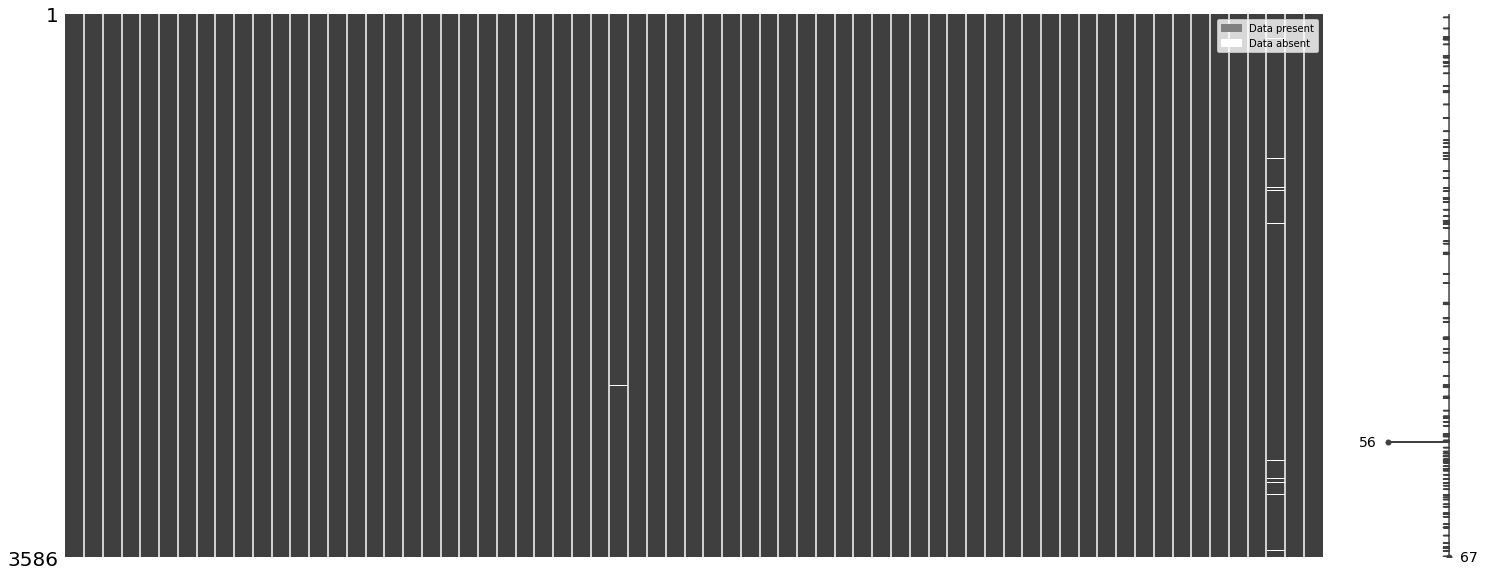

In [13]:
msno.matrix(credit_df);
gray_patch = mpatches.Patch(color='gray', label='Data present')
white_patch = mpatches.Patch(color='white', label='Data absent ')
plt.legend(handles=[gray_patch, white_patch])
plt.show()

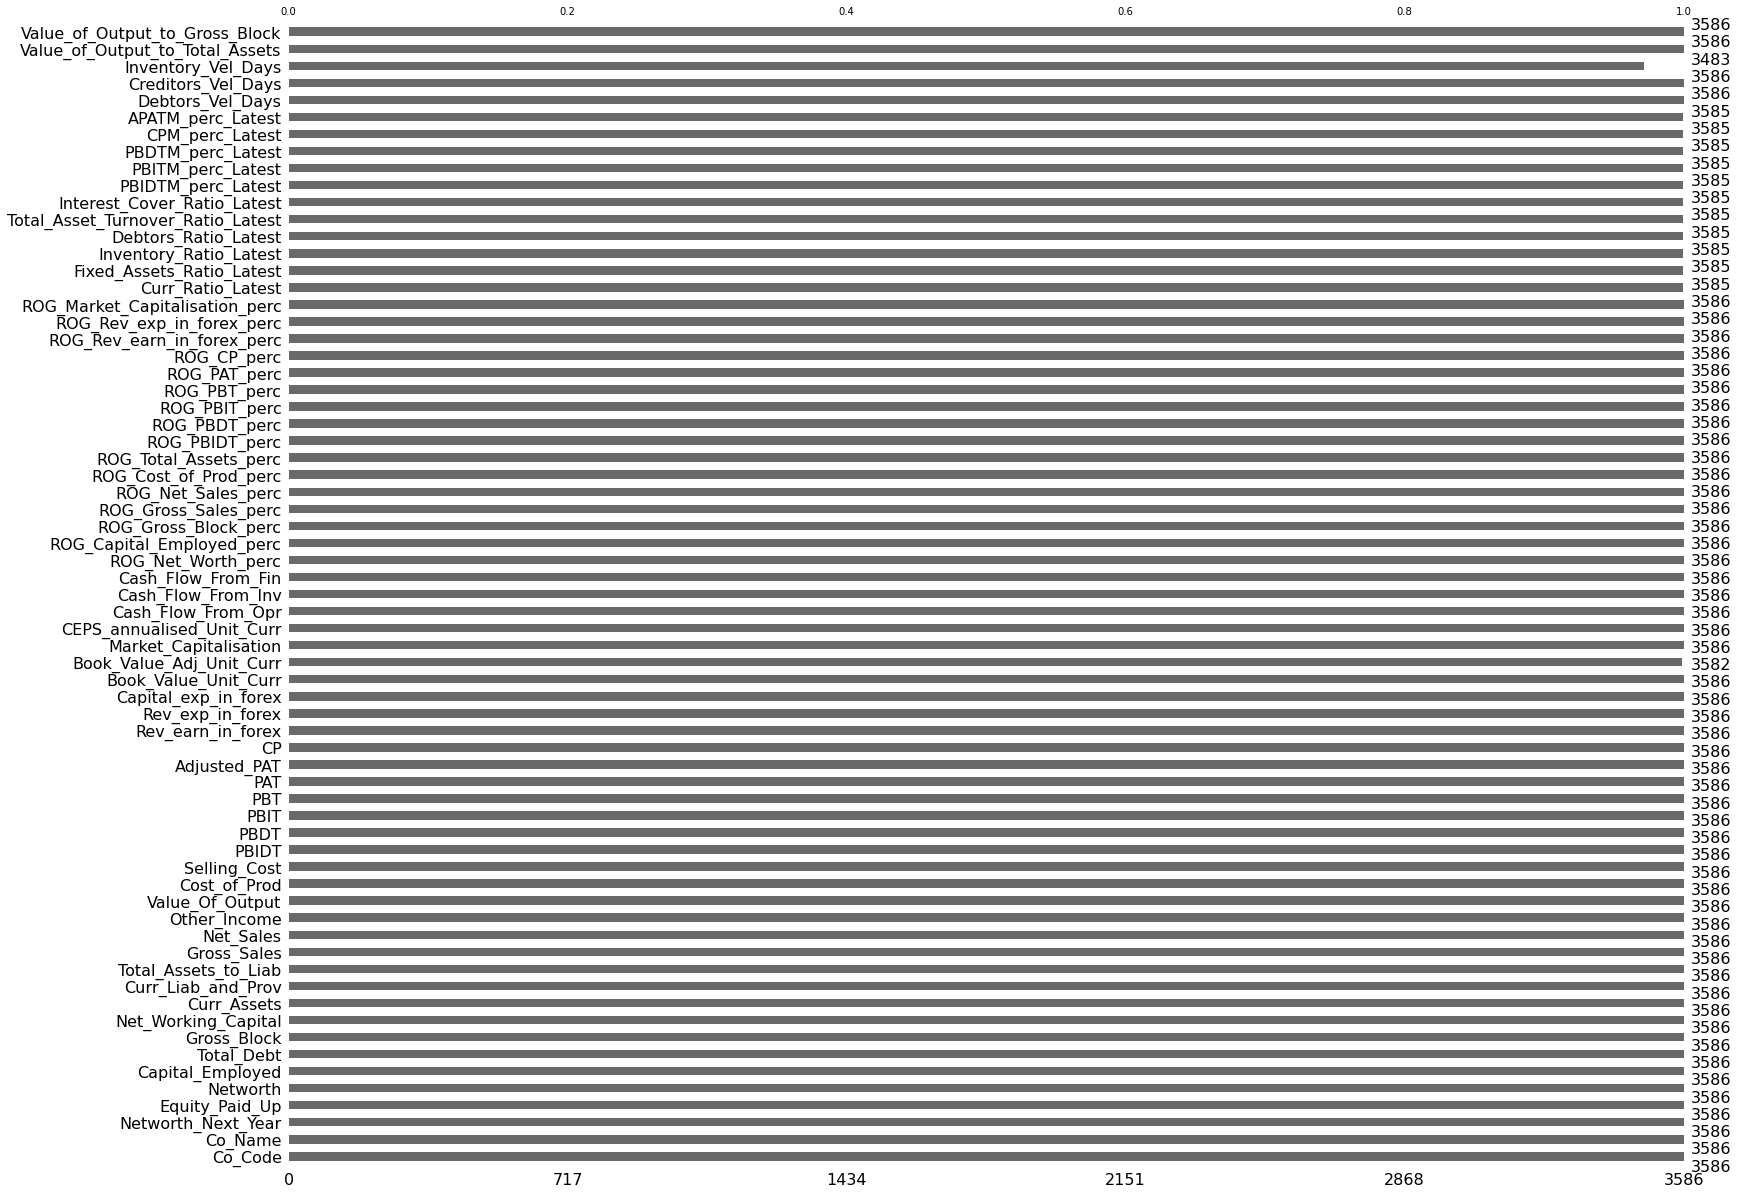

In [14]:
msno.bar(credit_df);

In [15]:
credit_df['Inventory_Vel_Days'].fillna(credit_df['Inventory_Vel_Days'].mean(), inplace = True)

In [16]:
credit_df.isna().sum().sum()

15

In [17]:
credit_df=credit_df.dropna()

In [18]:
credit_df.isna().sum().sum()

0

In [19]:
credit_df.shape

(3581, 67)

In [20]:
(credit_df==0).sum().sort_values(ascending=False)

Capital_exp_in_forex                 2887
ROG_Rev_earn_in_forex_perc           2264
Rev_earn_in_forex                    2225
ROG_Rev_exp_in_forex_perc            1966
Rev_exp_in_forex                     1904
ROG_Market_Capitalisation_perc       1420
Market_Capitalisation                1247
Inventory_Vel_Days                   1121
Inventory_Ratio_Latest               1098
Interest_Cover_Ratio_Latest           999
ROG_Gross_Block_perc                  938
Selling_Cost                          936
Total_Debt                            843
Debtors_Ratio_Latest                  744
Debtors_Vel_Days                      727
Creditors_Vel_Days                    704
Other_Income                          688
Cash_Flow_From_Fin                    655
Value_of_Output_to_Gross_Block        609
Fixed_Assets_Ratio_Latest             606
Cash_Flow_From_Inv                    509
Total_Asset_Turnover_Ratio_Latest     492
Value_of_Output_to_Total_Assets       483
ROG_Net_Sales_perc                

In [21]:
round((credit_df==0).sum()*100/credit_df.shape[0], 2).sort_values(ascending=False)

Capital_exp_in_forex                 80.62
ROG_Rev_earn_in_forex_perc           63.22
Rev_earn_in_forex                    62.13
ROG_Rev_exp_in_forex_perc            54.90
Rev_exp_in_forex                     53.17
ROG_Market_Capitalisation_perc       39.65
Market_Capitalisation                34.82
Inventory_Vel_Days                   31.30
Inventory_Ratio_Latest               30.66
Interest_Cover_Ratio_Latest          27.90
ROG_Gross_Block_perc                 26.19
Selling_Cost                         26.14
Total_Debt                           23.54
Debtors_Ratio_Latest                 20.78
Debtors_Vel_Days                     20.30
Creditors_Vel_Days                   19.66
Other_Income                         19.21
Cash_Flow_From_Fin                   18.29
Value_of_Output_to_Gross_Block       17.01
Fixed_Assets_Ratio_Latest            16.92
Cash_Flow_From_Inv                   14.21
Total_Asset_Turnover_Ratio_Latest    13.74
Value_of_Output_to_Total_Assets      13.49
ROG_Net_Sal

In [22]:
credit_df.columns

Index(['Co_Code', 'Co_Name', 'Networth_Next_Year', 'Equity_Paid_Up',
       'Networth', 'Capital_Employed', 'Total_Debt', 'Gross_Block',
       'Net_Working_Capital', 'Curr_Assets', 'Curr_Liab_and_Prov',
       'Total_Assets_to_Liab', 'Gross_Sales', 'Net_Sales', 'Other_Income',
       'Value_Of_Output', 'Cost_of_Prod', 'Selling_Cost', 'PBIDT', 'PBDT',
       'PBIT', 'PBT', 'PAT', 'Adjusted_PAT', 'CP', 'Rev_earn_in_forex',
       'Rev_exp_in_forex', 'Capital_exp_in_forex', 'Book_Value_Unit_Curr',
       'Book_Value_Adj_Unit_Curr', 'Market_Capitalisation',
       'CEPS_annualised_Unit_Curr', 'Cash_Flow_From_Opr', 'Cash_Flow_From_Inv',
       'Cash_Flow_From_Fin', 'ROG_Net_Worth_perc', 'ROG_Capital_Employed_perc',
       'ROG_Gross_Block_perc', 'ROG_Gross_Sales_perc', 'ROG_Net_Sales_perc',
       'ROG_Cost_of_Prod_perc', 'ROG_Total_Assets_perc', 'ROG_PBIDT_perc',
       'ROG_PBDT_perc', 'ROG_PBIT_perc', 'ROG_PBT_perc', 'ROG_PAT_perc',
       'ROG_CP_perc', 'ROG_Rev_earn_in_forex_perc',
  

In [23]:
credit_df = credit_df.drop(['Co_Code', 'Co_Name', 'Capital_exp_in_forex', 
                            'ROG_Rev_earn_in_forex_perc', 'Rev_earn_in_forex', 
                            'ROG_Rev_exp_in_forex_perc', 'Rev_exp_in_forex', 
                            'ROG_Market_Capitalisation_perc', 'Market_Capitalisation', 
                            'Inventory_Vel_Days', 'Inventory_Ratio_Latest'], axis = 1)
credit_df.head()

Networth_Next_Year  Equity_Paid_Up  Networth  Capital_Employed  Total_Debt  \
0            -8021.60          419.36  -7027.48          -1007.24     5936.03   
1            -3986.19         1954.93  -2968.08           4458.20     7410.18   
2            -3192.58           53.84    506.86           7714.68     6944.54   
3            -3054.51          157.30   -623.49           2353.88     2326.05   
4            -2967.36           50.30  -1070.83           4675.33     5740.90   

   Gross_Block  Net_Working_Capital  Curr_Assets  Curr_Liab_and_Prov  \
0       474.30             -1076.34        40.50             1116.85   
1      9070.86             -1098.88       486.86             1585.74   
2      1281.54              4496.25      9097.64             4601.39   
3      1033.69             -2612.42      1034.12             3646.54   
4      1084.20              1836.23      4685.81             2849.58   

   Total_Assets_to_Liab  Gross_Sales  Net_Sales  Other_Income  \
0                109.60         0.00       0.00          7.60   
1               6043.94      2892.73    2892.73         46.27   
2              12316.07       392.13     392.13          9.55   
3               6000.42      1354.39    1354.39        223.85   
4               7524.91        38.72      38.72          9.82   

   Value_Of_Output  Cost_of_Prod  Selling_Cost   PBIDT     PBDT    PBIT  \
0            -0.07        137.67          0.00 -179.06  -926.52 -185.53   
1          2900.71       2572.46         40.51  646.46    -4.32   35.53   
2           301.16        408.51         54.83 -281.92 -1086.71 -381.10   
3          1350.14       1326.99          3.34 -213.01  -677.57 -336.73   
4            38.72        186.29          1.97 -647.86  -944.42 -710.13   

       PBT     PAT  Adjusted_PAT      CP  Book_Value_Unit_Curr  \
0  -932.99 -932.99       -937.85 -926.52               -167.58   
1  -615.25 -615.25       -617.14   -4.32                -15.18   
2 -1185.89 -897.70       -873.39 -798.52                 94.14   
3  -801.29 -801.29       -770.18 -677.57                -39.64   
4 -1006.69 -864.58       -327.77 -802.31               -212.89   

   Book_Value_Adj_Unit_Curr  CEPS_annualised_Unit_Curr  Cash_Flow_From_Opr  \
0                   -167.58                     -22.09             -102.47   
1                    -15.18                      -0.02              635.91   
2                     94.14                    -148.31             -873.40   
3                    -39.64                     -43.08              324.47   
4                   -212.89                    -159.50             -191.54   

   Cash_Flow_From_Inv  Cash_Flow_From_Fin  ROG_Net_Worth_perc  \
0                1.46               92.58              -15.31   
1             -785.00              176.93              -26.15   
2             -458.27             1187.51              -61.86   
3               17.31             -412.55             -450.67   
4               61.34              143.65             -559.83   

   ROG_Capital_Employed_perc  ROG_Gross_Block_perc  ROG_Gross_Sales_perc  \
0                     -20.76                 -9.75                  0.00   
1                       6.30                  3.17                  5.92   
2                      15.66                 -2.07                -75.87   
3                     -40.84                 -1.80                  8.33   
4                     -11.76                  0.34                -80.61   

   ROG_Net_Sales_perc  ROG_Cost_of_Prod_perc  ROG_Total_Assets_perc  \
0                0.00                   1.38                 -25.75   
1                5.92                  13.16                   6.66   
2              -75.87                 -69.93                  -0.78   
3                8.33                  16.59                 -10.12   
4              -80.61                 -48.80                  -5.81   

   ROG_PBIDT_perc  ROG_PBDT_perc  ROG_PBIT_perc  ROG_PBT_perc  ROG_PAT_perc  \
0            5.23    

In [24]:
credit_df.shape

(3581, 56)

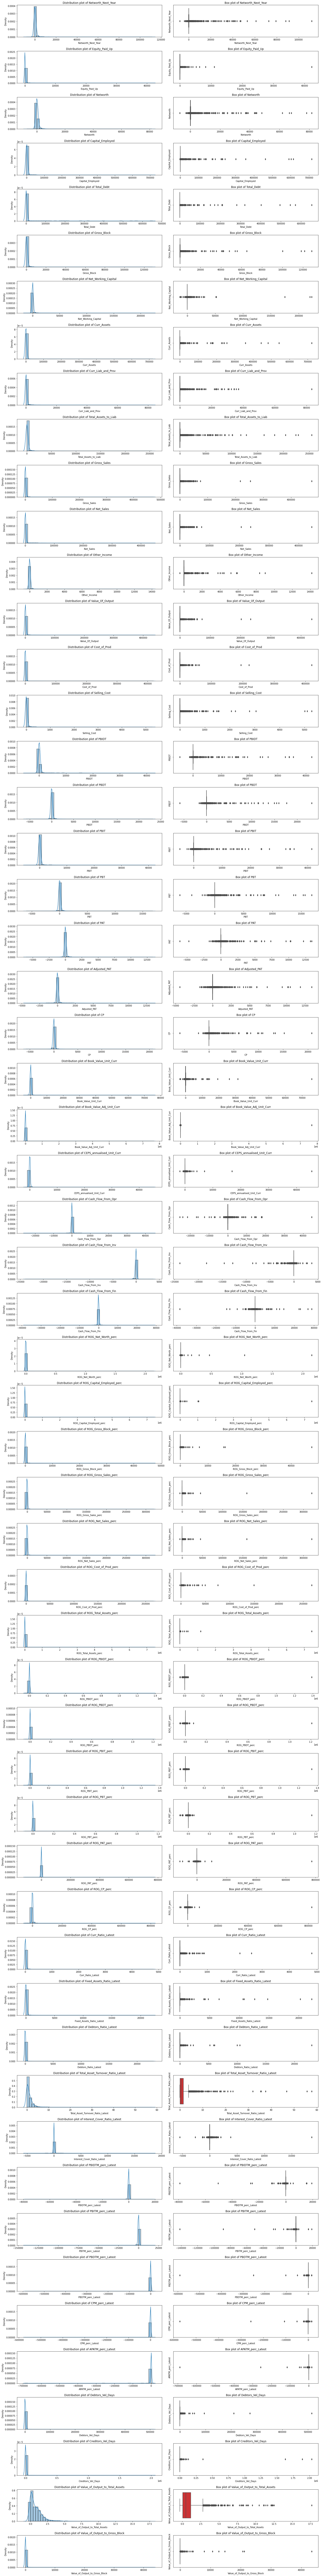

In [ ]:
# Distribution and boxplots of the variables

a = len(credit_df.select_dtypes(exclude= 'object').columns)  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig1 = plt.figure(figsize=(20,160))

for i in credit_df.select_dtypes(exclude= 'object').columns:
    plt.subplot(a, b, c)
    plt.title('Distribution plot of {}'.format(i))
    plt.xlabel(i)
    sns.distplot(credit_df[i], hist_kws=dict(edgecolor="k", linewidth=2))
    c = c + 1

    plt.subplot(a, b, c)
    plt.title('Box plot of {}'.format(i))
    plt.ylabel(i)
    sns.boxplot(x = credit_df[i], orient='h', palette='Set1')
    c = c + 1

plt.tight_layout()
plt.show()

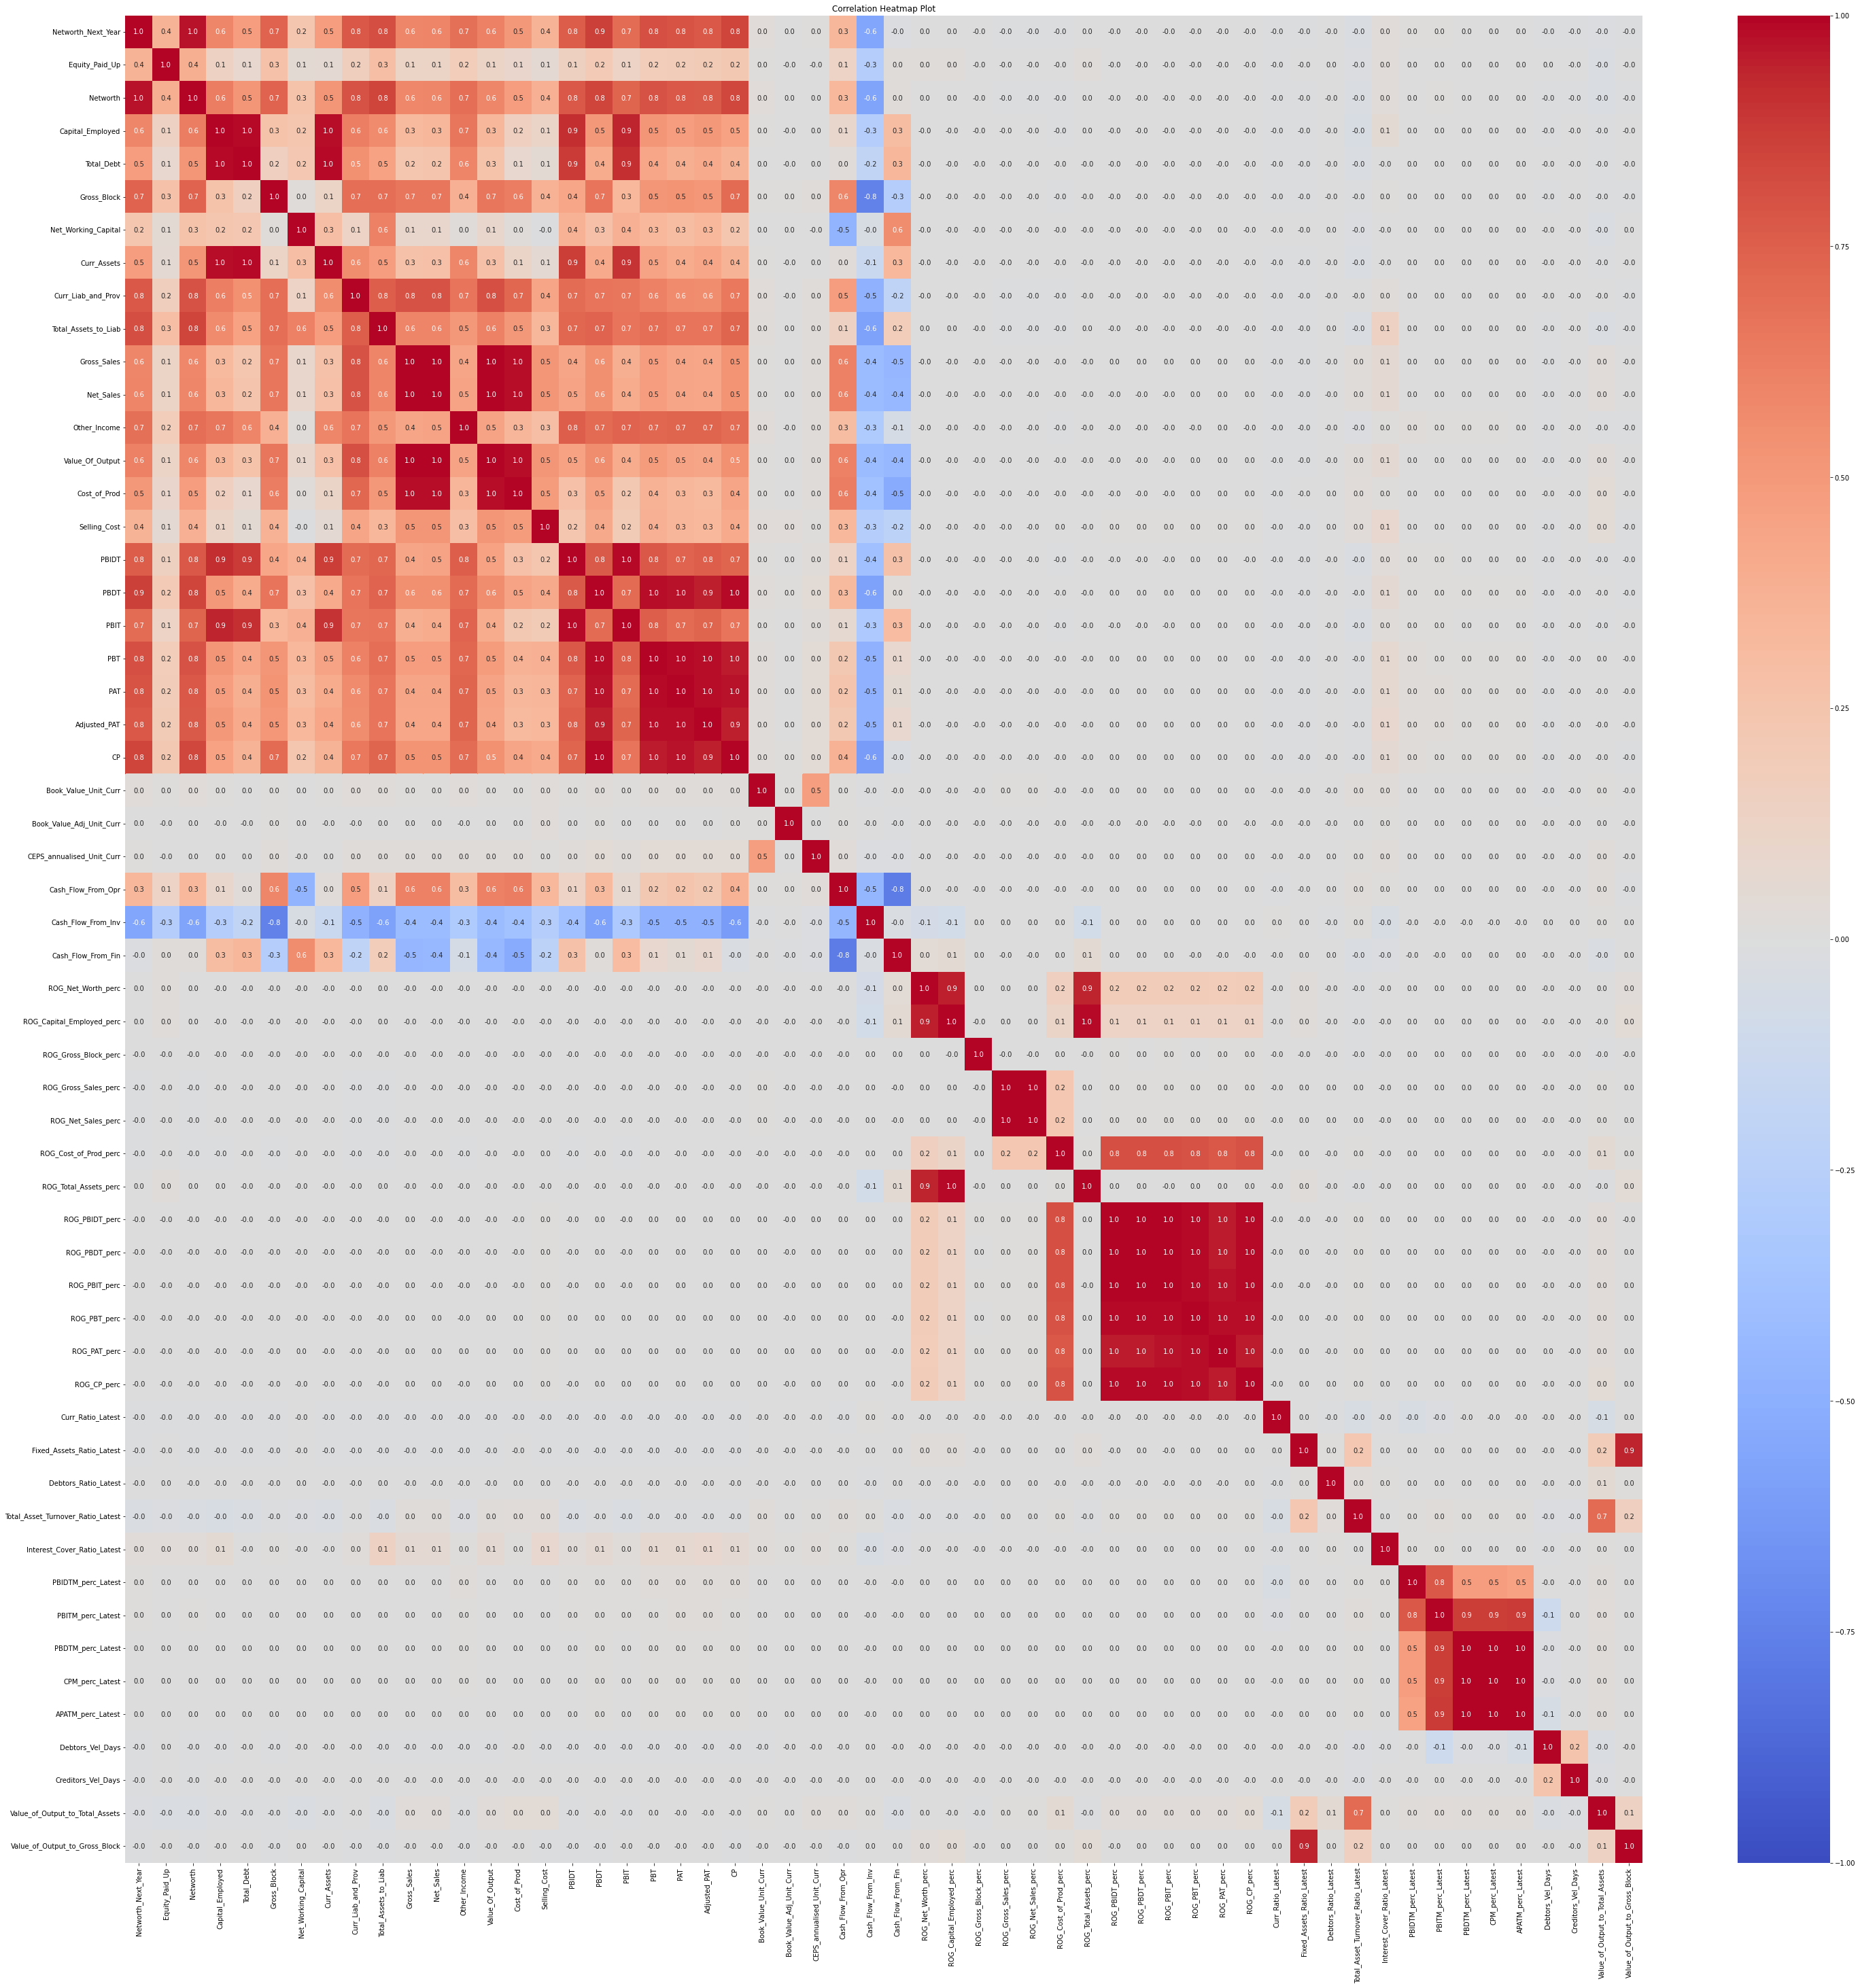

In [ ]:
fig2=plt.figure(figsize=(50,50))
sns.heatmap(round(credit_df.corr(),2),fmt='.1f',annot=True,cmap='coolwarm', vmin=-1, vmax=1,)
plt.title('Correlation Heatmap Plot')
plt.show()

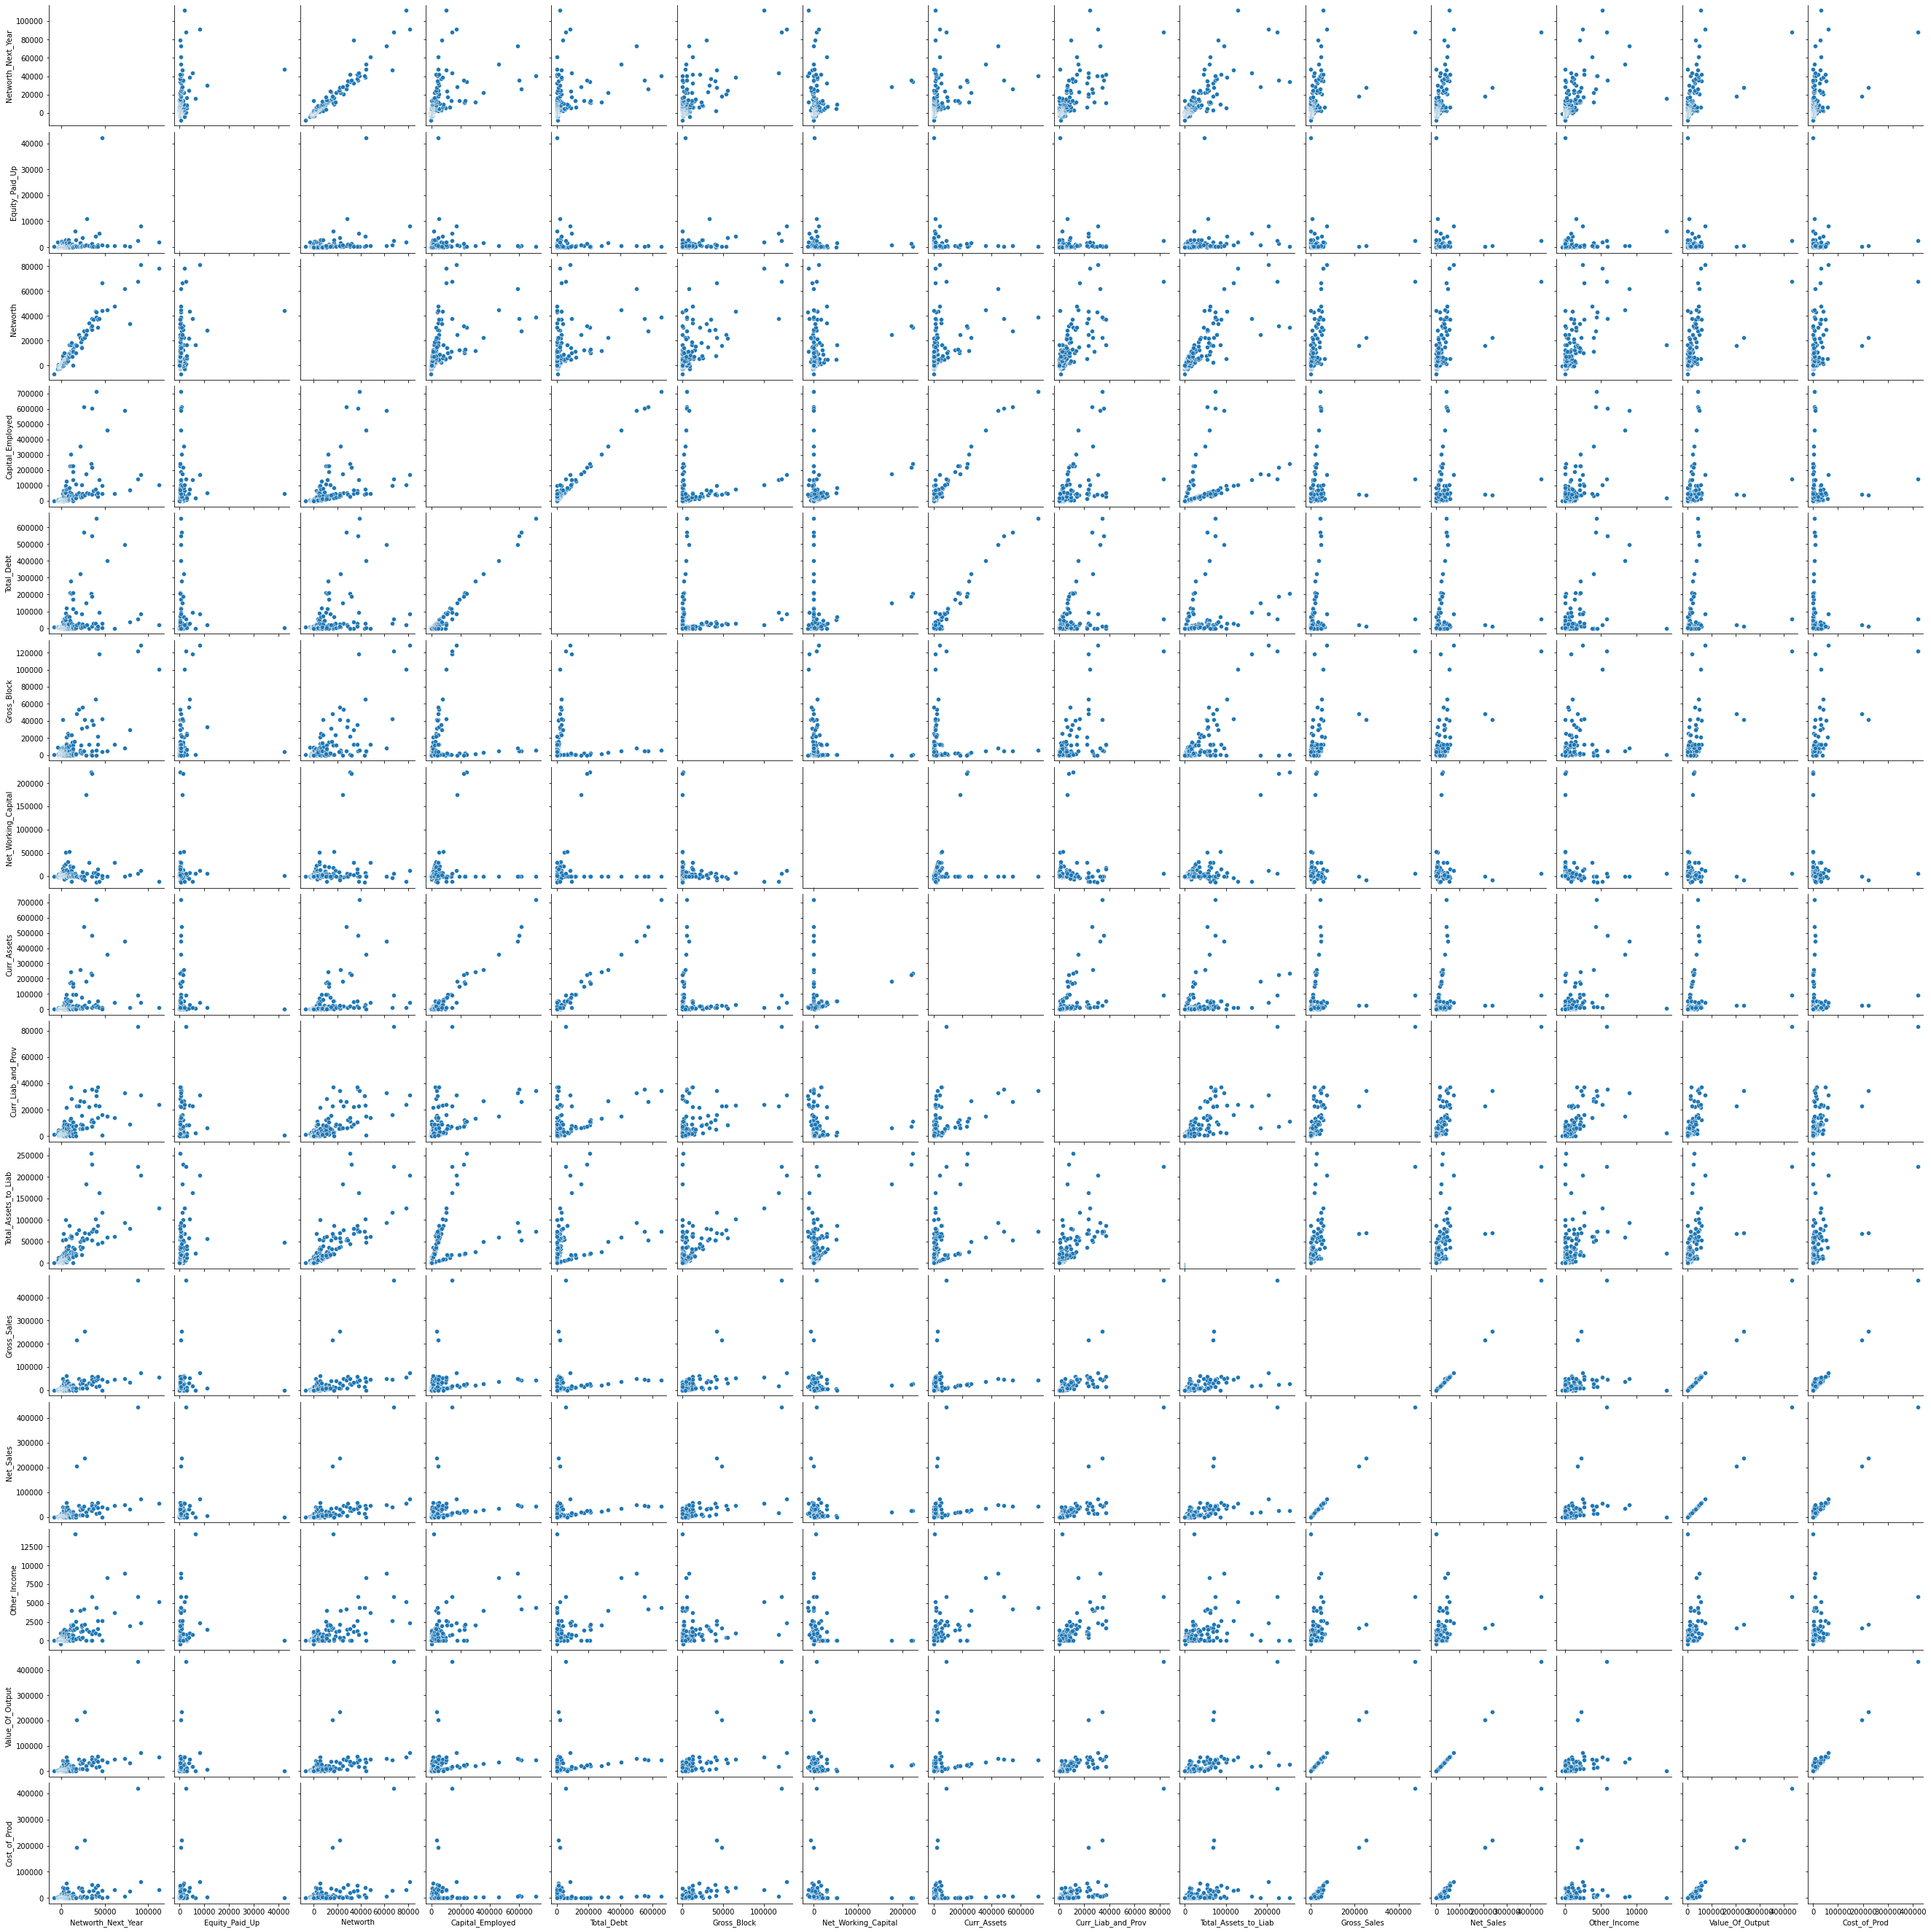

In [ ]:
#sns.pairplot(data=credit_df.iloc[:,0:15], palette='Set1');

In [ ]:
credit_df.corr()

Networth_Next_Year  Equity_Paid_Up  \
Networth_Next_Year                           1.000000        0.364373   
Equity_Paid_Up                               0.364373        1.000000   
Networth                                     0.971499        0.389488   
Capital_Employed                             0.594147        0.135471   
Total_Debt                                   0.480506        0.078233   
Gross_Block                                  0.742400        0.272820   
Net_Working_Capital                          0.240572        0.047748   
Curr_Assets                                  0.481711        0.064074   
Curr_Liab_and_Prov                           0.777573        0.173239   
Total_Assets_to_Liab                         0.821032        0.285939   
Gross_Sales                                  0.593488        0.116602   
Net_Sales                                    0.600611        0.118535   
Other_Income                                 0.678339        0.176781   
Value_Of_Output                              0.605294        0.119499   
Cost_of_Prod                                 0.497049        0.100857   
Selling_Cost                                 0.364023        0.056954   
PBIDT                                        0.760065        0.154998   
PBDT                                         0.860287        0.207800   
PBIT                                         0.704095        0.132974   
PBT                                          0.805138        0.178325   
PAT                                          0.787902        0.192652   
Adjusted_PAT                                 0.777507        0.199746   
CP                                           0.854634        0.224840   
Book_Value_Unit_Curr                         0.026336        0.006200   
Book_Value_Adj_Unit_Curr                     0.004253       -0.000439   
CEPS_annualised_Unit_Curr                    0.011141       -0.001649   
Cash_Flow_From_Opr                           0.344335        0.129331   
Cash_Flow_From_Inv                          -0.562406       -0.273432   
Cash_Flow_From_Fin                          -0.015128        0.015226   
ROG_Net_Worth_perc                           0.003455        0.018491   
ROG_Capital_Employed_perc                    0.004567        0.021201   
ROG_Gross_Block_perc                        -0.003169       -0.001779   
ROG_Gross_Sales_perc                        -0.005374       -0.002647   
ROG_Net_Sales_perc                          -0.005370       -0.002647   
ROG_Cost_of_Prod_perc                       -0.007234       -0.003526   
ROG_Total_Assets_perc                        0.004755        0.021439   
ROG_PBIDT_perc                              -0.001494       -0.001479   
ROG_PBDT_perc                               -0.001501       -0.001492   
ROG_PBIT_perc                               -0.001518       -0.001476   
ROG_PBT_perc                                -0.000716       -0.001085   
ROG_PAT_perc                                -0.000214       -0.001132   
ROG_CP_perc                                 -0.001377       -0.001502   
Curr_Ratio_Latest                           -0.014259       -0.006798   
Fixed_Assets_Ratio_Latest                   -0.009210       -0.003435   
Debtors_Ratio_Latest                        -0.002465        0.002416   
Total_Asset_Turnover_Ratio_Latest           -0.028669       -0.020489   
Interest_Cover_Ratio_Latest                  0.033612        0.026755   
PBIDTM_perc_Latest                           0.005640        0.004797   
PBITM_perc_Latest                            0.006560        0.002633   
PBDTM_perc_Latest                            0.002118        0.000317   
CPM_perc_Latest                              0.001925        0.000279   
APATM_perc_Latest                            0.002439        0.000194   
Debtors_Vel_Days                            -0.006733        0.000295   
Creditors_Vel_Days                          -0.005404       -0.002065   
Value_of_Output_to_T

In [25]:
q1 = credit_df.quantile(0.25)
q3 = credit_df.quantile(0.75)
IQR = q3 - q1
upper_limit = q3 + (1.5 * IQR)   
lower_limit = q1 - (1.5 * IQR)

In [26]:
outlier_df = pd.DataFrame()
outlier_df['% Upper Outlier'] = ((credit_df > upper_limit).sum()/len(credit_df)*100)
outlier_df['% Lower Outlier'] = ((credit_df < lower_limit).sum()/len(credit_df)*100)
outlier_df['% Total Outlier'] = outlier_df['% Upper Outlier'] + outlier_df['% Lower Outlier']
outlier_df.sort_values(by='% Total Outlier', ascending=False)

% Upper Outlier  % Lower Outlier  \
Cash_Flow_From_Fin                       10.723262        17.313600   
PAT                                      18.179280         8.545099   
Adjusted_PAT                             17.788327         8.796426   
PBT                                      18.067579         8.154147   
APATM_perc_Latest                        11.505166        14.493158   
Cash_Flow_From_Inv                        6.646188        17.816252   
ROG_Gross_Block_perc                     13.711254         9.438704   
CP                                       17.844178         4.914828   
PBDT                                     17.760402         4.942753   
Cash_Flow_From_Opr                       17.146049         5.222005   
ROG_Net_Worth_perc                       10.751187        10.053058   
Interest_Cover_Ratio_Latest              14.856185         5.333706   
PBIT                                     16.838872         3.267244   
CPM_perc_Latest                           9.522480        10.527786   
PBITM_perc_Latest                        10.695336         9.327004   
PBDTM_perc_Latest                         9.438704         9.969282   
Networth_Next_Year                       16.838872         2.038537   
ROG_Cost_of_Prod_perc                    11.756493         7.037140   
PBIDT                                    16.866797         1.870986   
ROG_Gross_Sales_perc                     10.974588         7.763195   
ROG_Net_Sales_perc                       10.918738         7.707344   
Networth                                 16.308294         1.843061   
ROG_CP_perc                               9.327004         8.433398   
ROG_PBDT_perc                             9.103602         8.405473   
Net_Working_Capital                      14.912036         2.513264   
ROG_PBIT_perc                             9.159453         8.042446   
ROG_PBIDT_perc                            9.578330         7.511868   
ROG_PBT_perc                              7.986596         9.047752   
Selling_Cost                             16.950572         0.000000   
Other_Income                             16.783022         0.027925   
CEPS_annualised_Unit_Curr                13.599553         3.183468   
ROG_PAT_perc                              8.209997         8.461324   
Capital_Employed                         16.503770         0.139626   
PBIDTM_perc_Latest                        9.494555         7.120916   
Curr_Liab_and_Prov                       16.224518         0.000000   
Total_Debt                               16.224518         0.000000   
Curr_Assets                              16.112818         0.000000   
Total_Assets_to_Liab                     15.973192         0.000000   
ROG_Capital_Employed_perc                 9.913432         6.059760   
Curr_Ratio_Latest                        15.749791         0.000000   
Value_Of_Output                          15.610165         0.000000   
Cost_of_Prod                             15.610165         0.000000   
Net_Sales                                15.526389         0.000000   
Gross_Sales                              15.414689         0.000000   
Gross_Block                              15.079587         0.000000   
Fixed_Assets_Ratio_Latest                13.795029         0.000000   
Book_Value_Adj_Unit_Curr                 11.728567         1.843061   
Book_Value_Unit_Curr                     12.035744         1.507959   
ROG_Total_Assets_perc                     8.963977         4.523876   
Value_of_Output_to_Gross_Block           13.348227         0.083775   
Equity_Paid_Up                           12.454622         0.000000   
Debtors_Vel_Days                         11.086289         0.000000   
Creditors_Vel_Days                       10.890813         0.000000   
Debtors_Ratio_Latest                     10.360235         0.000000   
Total_Asset_Turnover_Ratio_Latest         5.612957         0.000000   
Value_of_Output_to_Total_Assets           4.160849         

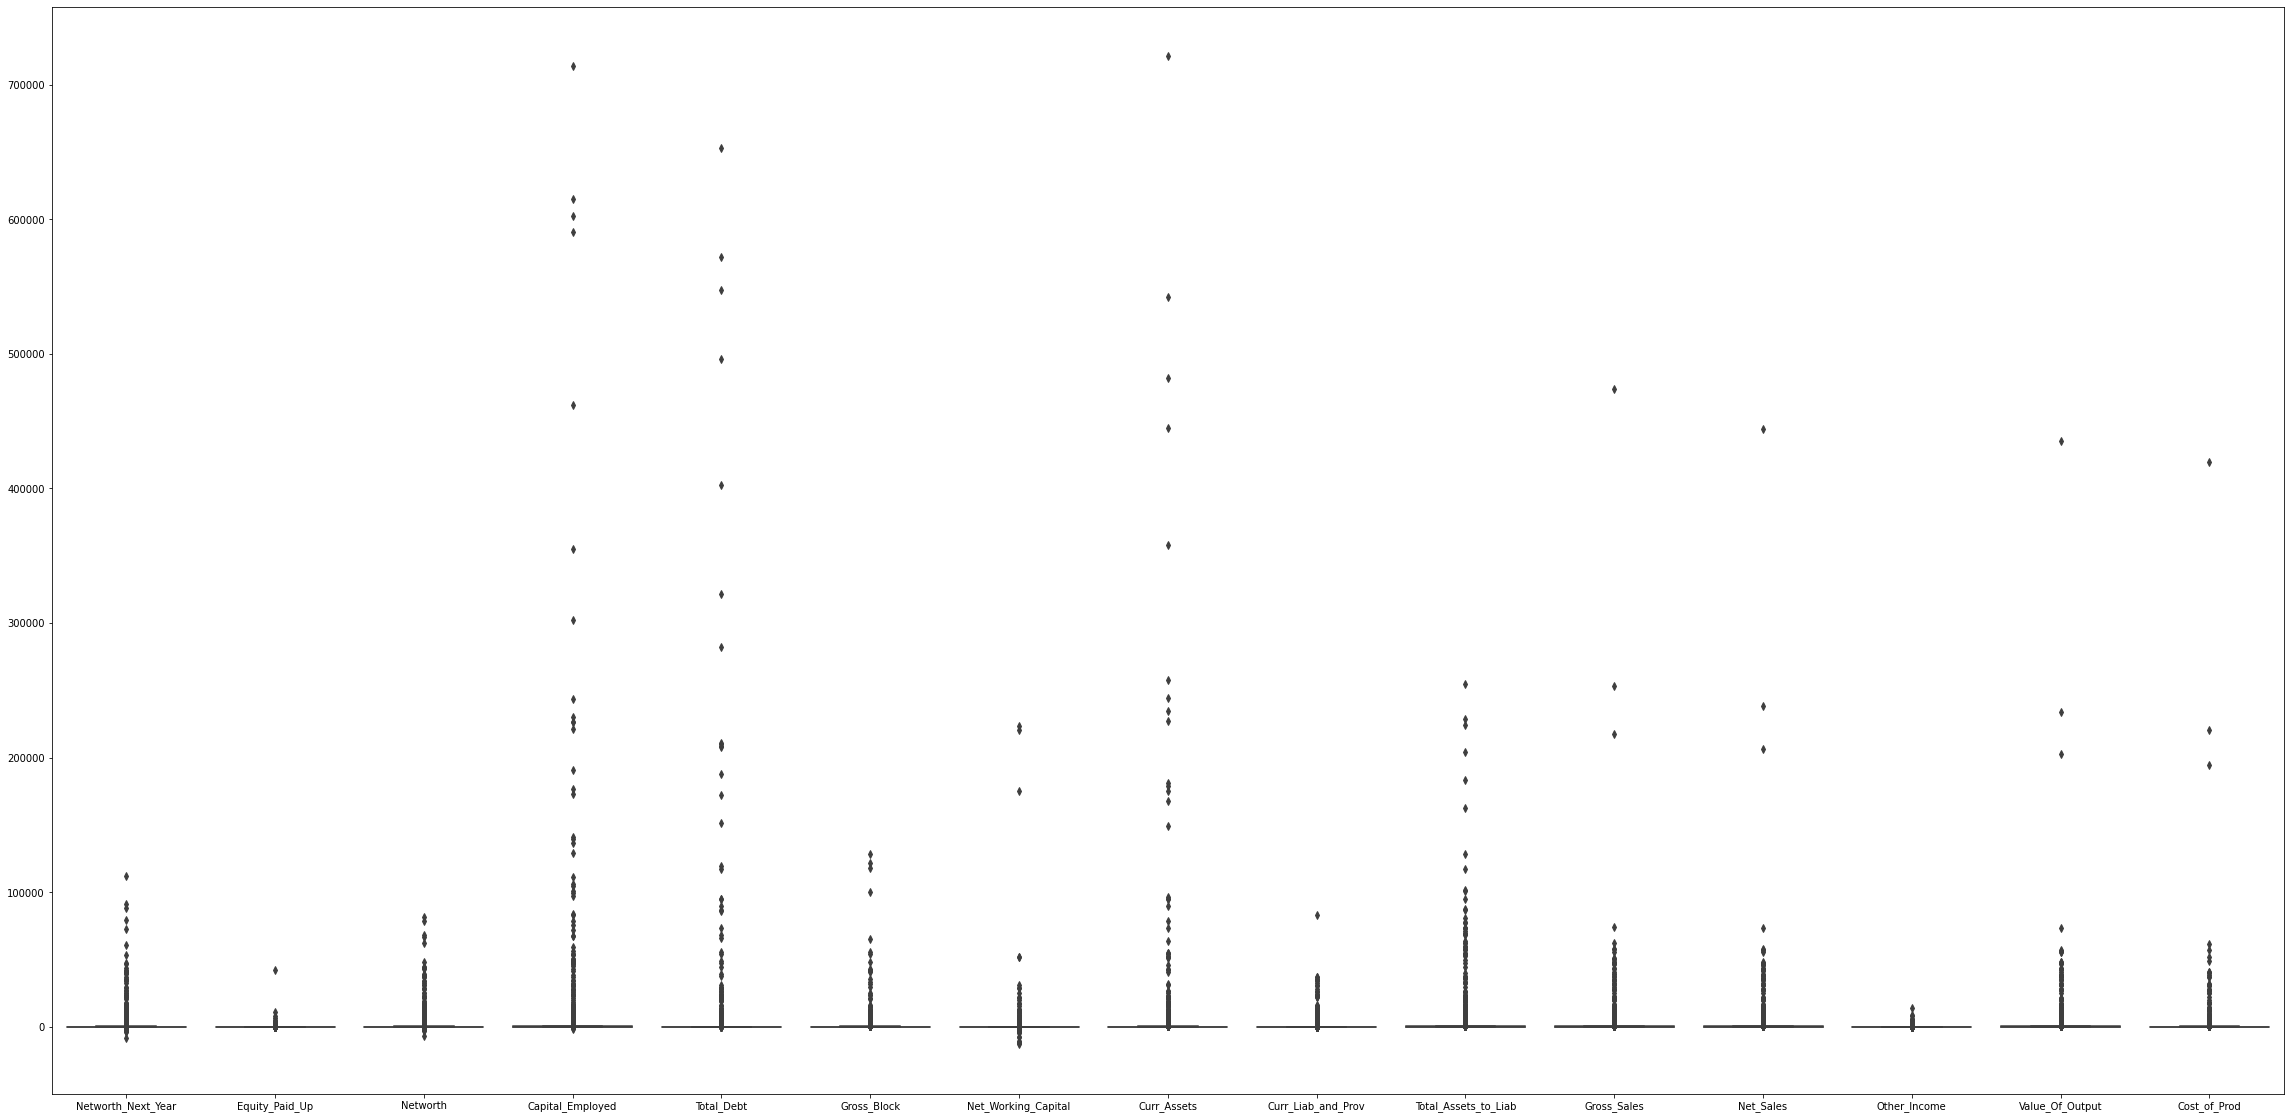

In [27]:
fig3=plt.figure(figsize=(40,20))
sns.boxplot(data=credit_df.iloc[:,0:15], palette='Set1', orient='v');
plt.show()

In [28]:
def remove_outlier(col):
    sorted(col)
    q1 = col.quantile(0.25)
    q3 = col.quantile(0.75)
    IQR = q3 - q1
    lower_range= q1-(1.5 * IQR)
    upper_range= q3+(1.5 * IQR)
    return lower_range, upper_range

In [29]:
for column in credit_df.columns:
    lr,ur=remove_outlier(credit_df[column])
    credit_df[column]=np.where(credit_df[column]>ur,ur,credit_df[column])
    credit_df[column]=np.where(credit_df[column]<lr,lr,credit_df[column])

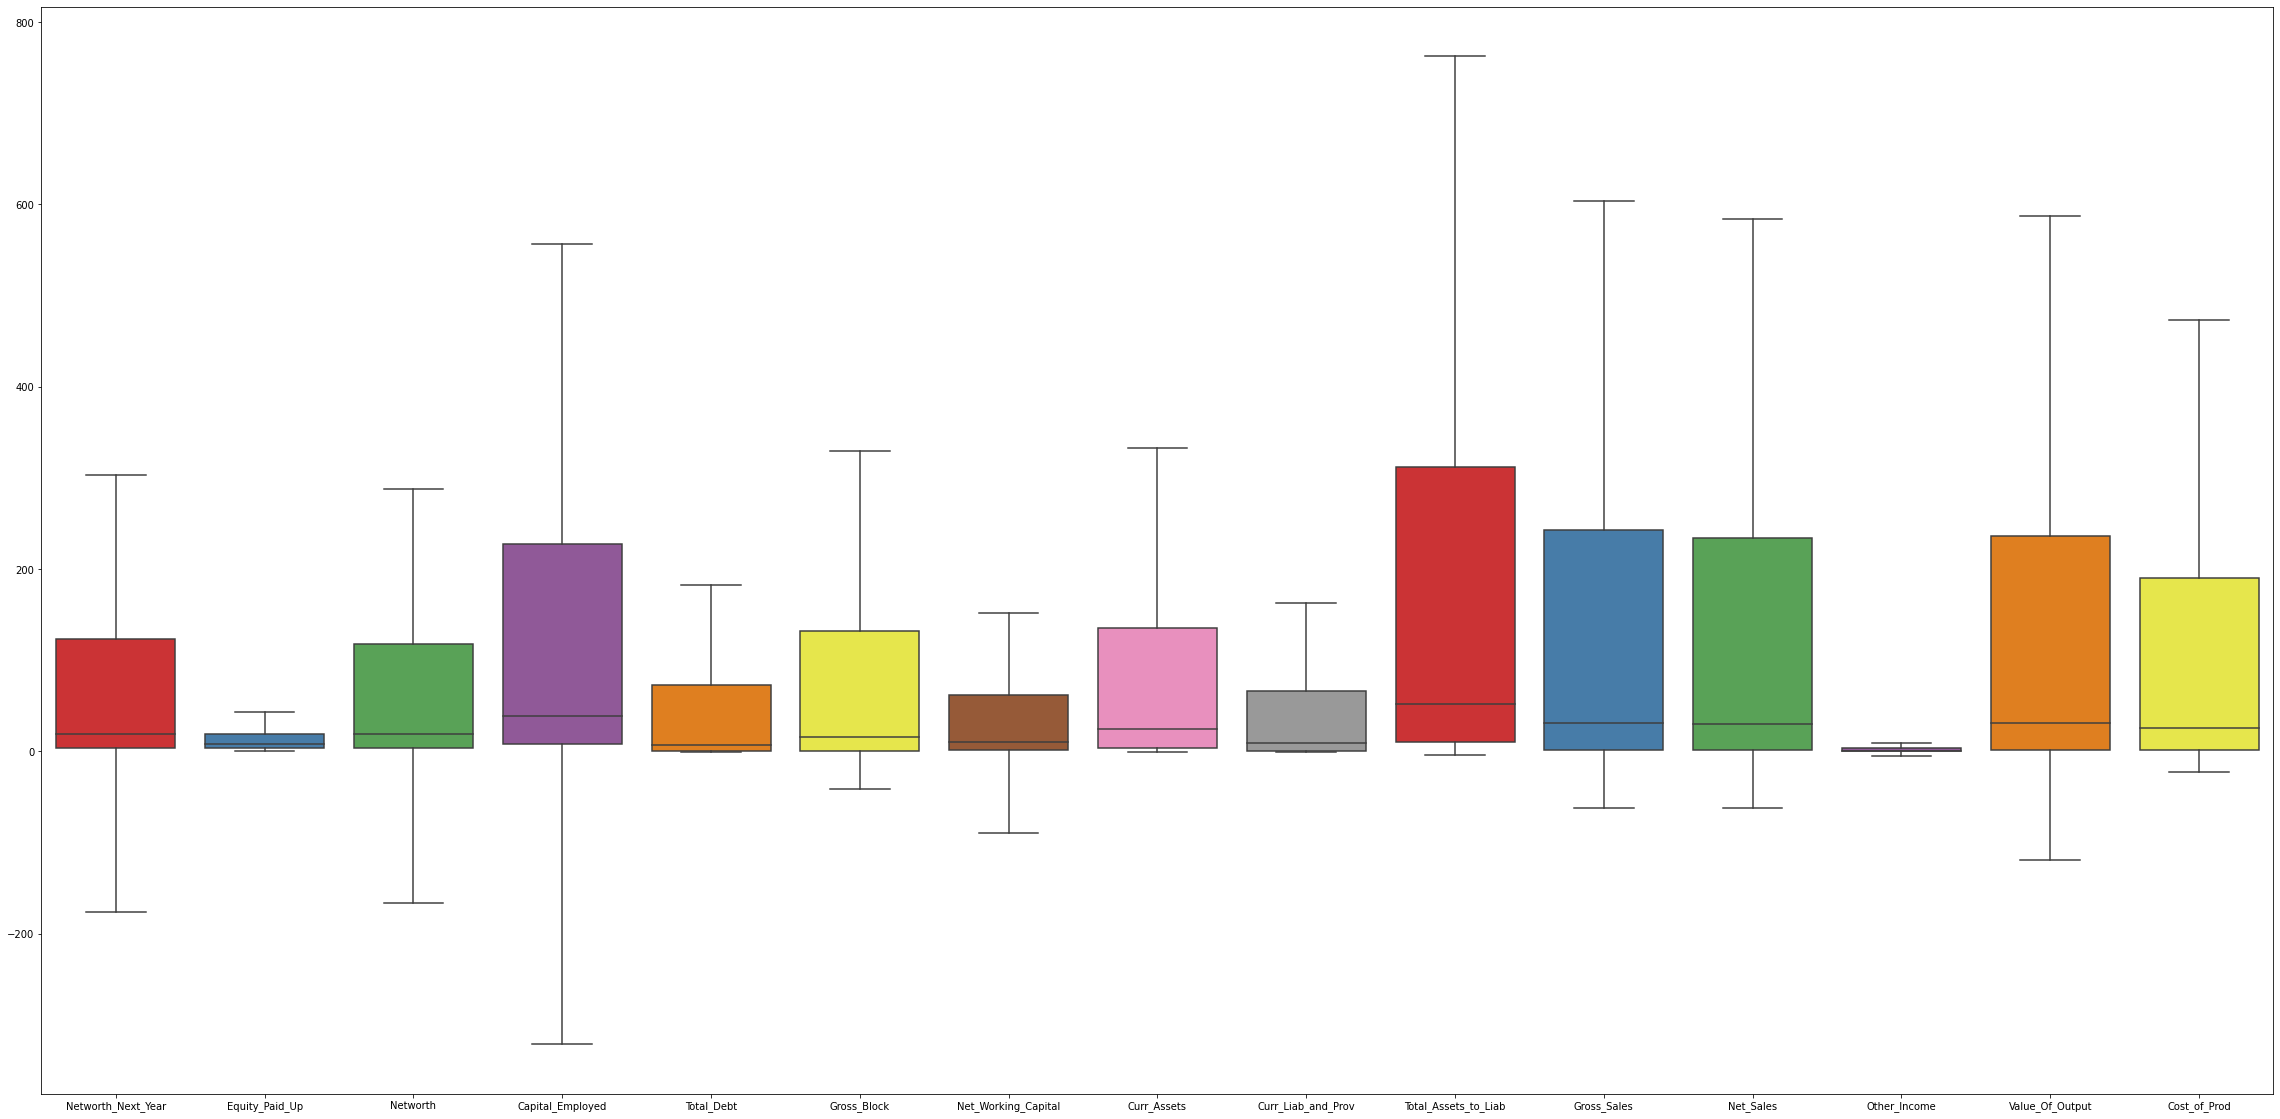

In [30]:
fig4=plt.figure(figsize=(40,20))
sns.boxplot(data=credit_df.iloc[:,0:15], palette='Set1', orient='v');
plt.show()

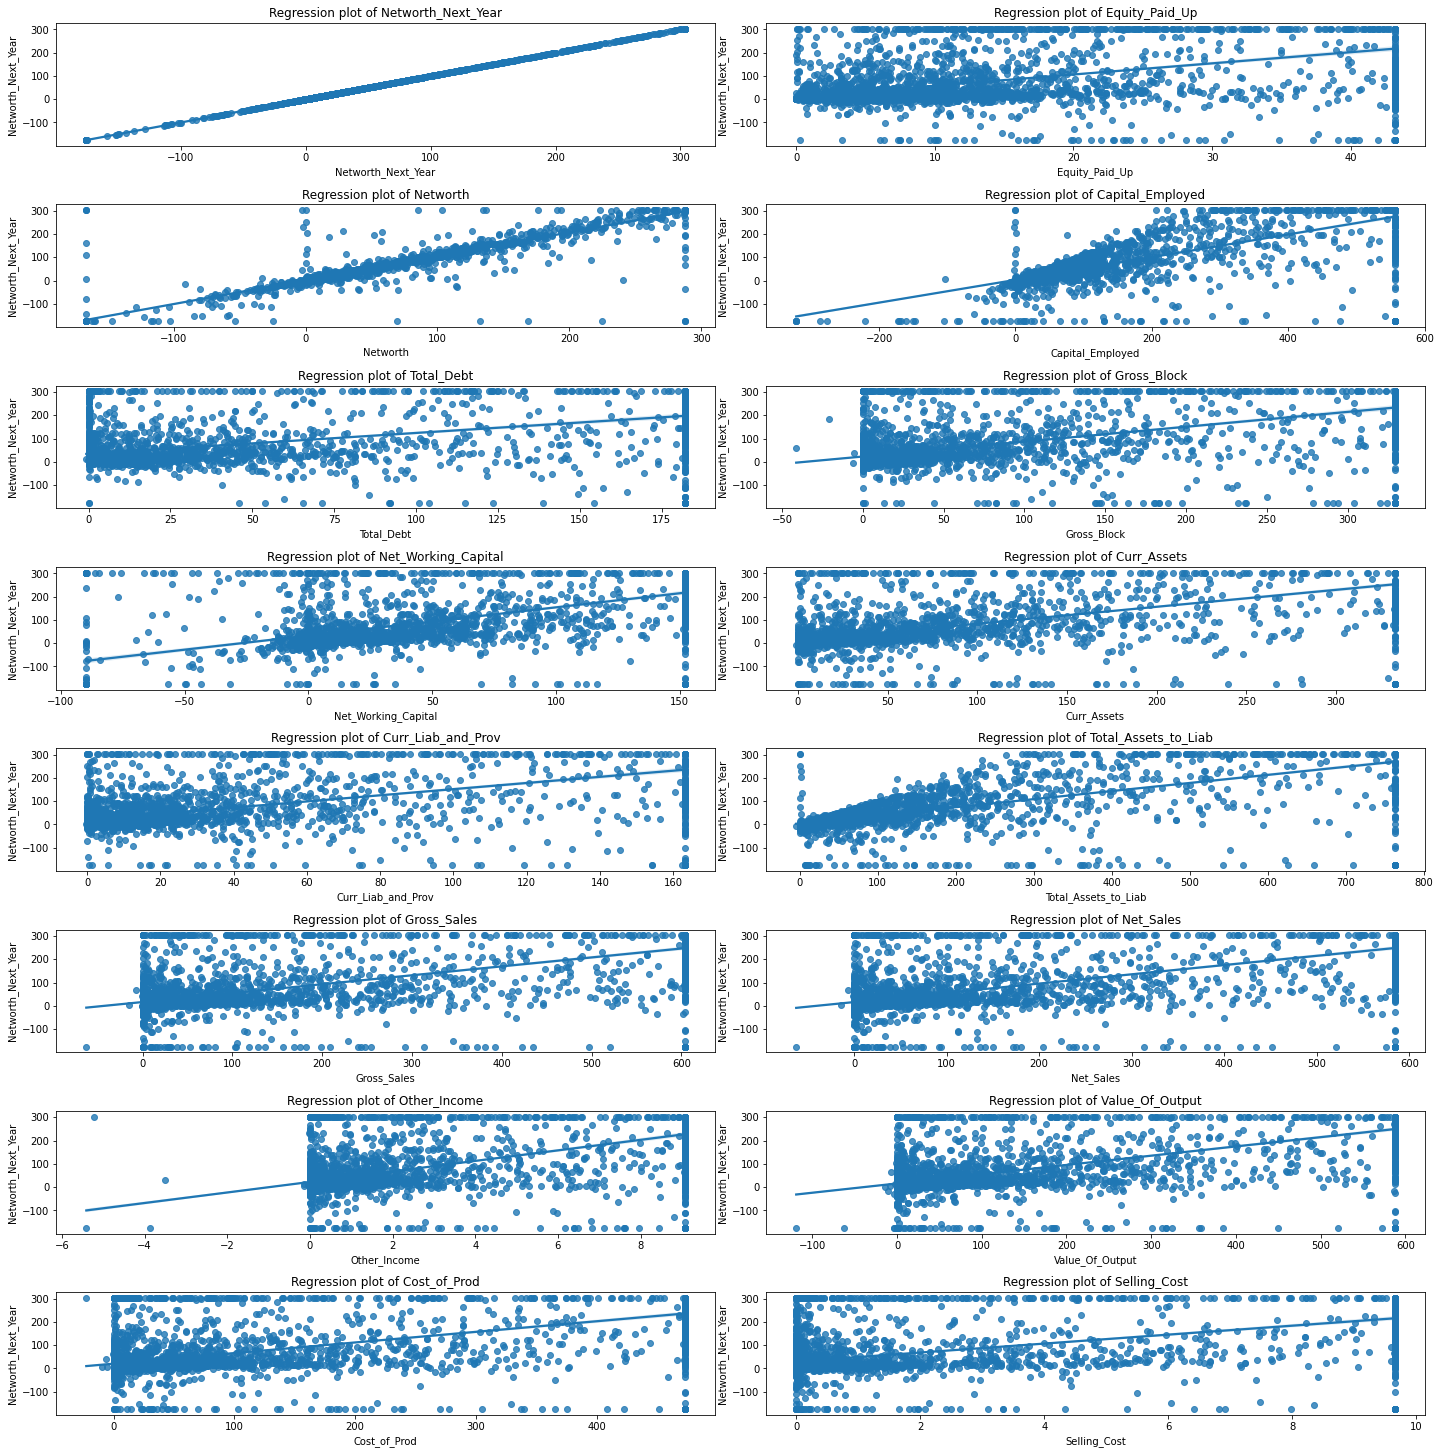

In [ ]:
# Distribution and boxplots of the variables

a = len(credit_df.iloc[:,0:16].select_dtypes(exclude= 'object').columns)  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig1 = plt.figure(figsize=(20,40))

for i in credit_df.iloc[:,0:16].select_dtypes(exclude= 'object').columns:
    plt.subplot(a, b, c)
    plt.title('Regression plot of {}'.format(i))
    plt.xlabel(i)
    sns.regplot(x=credit_df[i], y=credit_df['Networth_Next_Year'])
    c = c + 1

plt.tight_layout()
plt.show()

In [31]:
credit_df['Default']=np.where(credit_df['Networth_Next_Year']<=0,1,0)
credit_df.head()

Networth_Next_Year  Equity_Paid_Up  Networth  Capital_Employed  Total_Debt  \
0             -175.72          43.165  -166.215          -321.575     182.105   
1             -175.72          43.165  -166.215           556.225     182.105   
2             -175.72          43.165   287.425           556.225     182.105   
3             -175.72          43.165  -166.215           556.225     182.105   
4             -175.72          43.165  -166.215           556.225     182.105   

   Gross_Block  Net_Working_Capital  Curr_Assets  Curr_Liab_and_Prov  \
0       328.97               -89.74       40.500              163.13   
1       328.97               -89.74      332.625              163.13   
2       328.97               152.10      332.625              163.13   
3       328.97               -89.74      332.625              163.13   
4       328.97               152.10      332.625              163.13   

   Total_Assets_to_Liab  Gross_Sales  Net_Sales  Other_Income  \
0                 109.6         0.00      0.000          7.60   
1                 762.7       603.69    584.215          9.07   
2                 762.7       392.13    392.130          9.07   
3                 762.7       603.69    584.215          9.07   
4                 762.7        38.72     38.720          9.07   

   Value_Of_Output  Cost_of_Prod  Selling_Cost  PBIDT   PBDT    PBIT     PBT  \
0           -0.070        137.67          0.00 -35.33 -19.44 -25.005 -11.295   
1          587.485        472.89          9.65  58.99  -4.32  35.530 -11.295   
2          301.160        408.51          9.65 -35.33 -19.44 -25.005 -11.295   
3          587.485        472.89          3.34 -35.33 -19.44 -25.005 -11.295   
4           38.720        186.29          1.97 -35.33 -19.44 -25.005 -11.295   

    PAT  Adjusted_PAT      CP  Book_Value_Unit_Curr  Book_Value_Adj_Unit_Curr  \
0 -8.46         -8.25 -16.395               -87.685                    -72.32   
1 -8.46         -8.25  -4.320               -15.180                    -15.18   
2 -8.46         -8.25 -16.395                94.140                     94.14   
3 -8.46         -8.25 -16.395               -39.640                    -39.64   
4 -8.46         -8.25 -16.395               -87.685                    -72.32   

   CEPS_annualised_Unit_Curr  Cash_Flow_From_Opr  Cash_Flow_From_Inv  \
0                     -13.17             -19.735               1.460   
1                      -0.02              32.065             -12.955   
2                     -13.17             -19.735             -12.955   
3                     -13.17              32.065               7.965   
4                     -13.17             -19.735               7.965   

   Cash_Flow_From_Fin  ROG_Net_Worth_perc  ROG_Capital_Employed_perc  \
0               9.925              -15.31                     -20.76   
1               9.925              -20.80                       6.30   
2               9.925              -20.80                      15.66   
3             -15.315              -20.80                     -28.45   
4               9.925              -20.80                     -11.76   

   ROG_Gross_Block_perc  ROG_Gross_Sales_perc  ROG_Net_Sales_perc  \
0                 -9.75                 0.000               0.000   
1                  3.17                 5.920               5.920   
2                 -2.07               -52.485             -52.645   
3                 -1.80                 8.330               8.330   
4                  0.34               -52.485             -52.645   

   ROG_Cost_of_Prod_perc  ROG_Total_Assets_perc  ROG_PBIDT_perc  \
0                   1.38                 -25.75            5.23   
1                  13.16                   6.66            5.24   
2                 -52.85                  -0.78         -129.81   
3                  16.59                 -10.12         -129.81   
4                 -48.80                  -5.81          -40.07   

   ROG_PBDT_perc  ROG_PBIT_perc  ROG_PBT

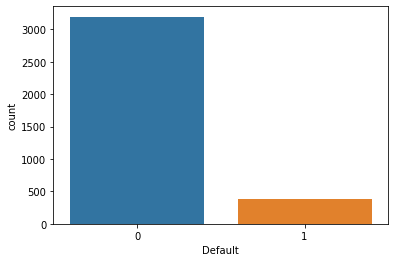

In [32]:
sns.countplot(credit_df['Default']);

In [33]:
credit_df['Default'].value_counts(normalize=True)

0    0.89193
1    0.10807
Name: Default, dtype: float64

In [34]:
credit_df = credit_df.drop('Networth_Next_Year', axis = 1)
credit_df.head()

Equity_Paid_Up  Networth  Capital_Employed  Total_Debt  Gross_Block  \
0          43.165  -166.215          -321.575     182.105       328.97   
1          43.165  -166.215           556.225     182.105       328.97   
2          43.165   287.425           556.225     182.105       328.97   
3          43.165  -166.215           556.225     182.105       328.97   
4          43.165  -166.215           556.225     182.105       328.97   

   Net_Working_Capital  Curr_Assets  Curr_Liab_and_Prov  Total_Assets_to_Liab  \
0               -89.74       40.500              163.13                 109.6   
1               -89.74      332.625              163.13                 762.7   
2               152.10      332.625              163.13                 762.7   
3               -89.74      332.625              163.13                 762.7   
4               152.10      332.625              163.13                 762.7   

   Gross_Sales  Net_Sales  Other_Income  Value_Of_Output  Cost_of_Prod  \
0         0.00      0.000          7.60           -0.070        137.67   
1       603.69    584.215          9.07          587.485        472.89   
2       392.13    392.130          9.07          301.160        408.51   
3       603.69    584.215          9.07          587.485        472.89   
4        38.72     38.720          9.07           38.720        186.29   

   Selling_Cost  PBIDT   PBDT    PBIT     PBT   PAT  Adjusted_PAT      CP  \
0          0.00 -35.33 -19.44 -25.005 -11.295 -8.46         -8.25 -16.395   
1          9.65  58.99  -4.32  35.530 -11.295 -8.46         -8.25  -4.320   
2          9.65 -35.33 -19.44 -25.005 -11.295 -8.46         -8.25 -16.395   
3          3.34 -35.33 -19.44 -25.005 -11.295 -8.46         -8.25 -16.395   
4          1.97 -35.33 -19.44 -25.005 -11.295 -8.46         -8.25 -16.395   

   Book_Value_Unit_Curr  Book_Value_Adj_Unit_Curr  CEPS_annualised_Unit_Curr  \
0               -87.685                    -72.32                     -13.17   
1               -15.180                    -15.18                      -0.02   
2                94.140                     94.14                     -13.17   
3               -39.640                    -39.64                     -13.17   
4               -87.685                    -72.32                     -13.17   

   Cash_Flow_From_Opr  Cash_Flow_From_Inv  Cash_Flow_From_Fin  \
0             -19.735               1.460               9.925   
1              32.065             -12.955               9.925   
2             -19.735             -12.955               9.925   
3              32.065               7.965             -15.315   
4             -19.735               7.965               9.925   

   ROG_Net_Worth_perc  ROG_Capital_Employed_perc  ROG_Gross_Block_perc  \
0              -15.31                     -20.76                 -9.75   
1              -20.80                       6.30                  3.17   
2              -20.80                      15.66                 -2.07   
3              -20.80                     -28.45                 -1.80   
4              -20.80                     -11.76                  0.34   

   ROG_Gross_Sales_perc  ROG_Net_Sales_perc  ROG_Cost_of_Prod_perc  \
0                 0.000               0.000                   1.38   
1                 5.920               5.920                  13.16   
2               -52.485             -52.645                 -52.85   
3                 8.330               8.330                  16.59   
4               -52.485             -52.645                 -48.80   

   ROG_Total_Assets_perc  ROG_PBIDT_perc  ROG_PBDT_perc  ROG_PBIT_perc  \
0                 -25.75            5.23         -19.29           4.43   
1                   6.66            5.24        -108.77         172.47   
2                  -0.78         -129.81        -155.84        -153.61   
3                 -10.12         -129.81        -102.72        -153.61   
4                  -5.81          -40.07           3.28

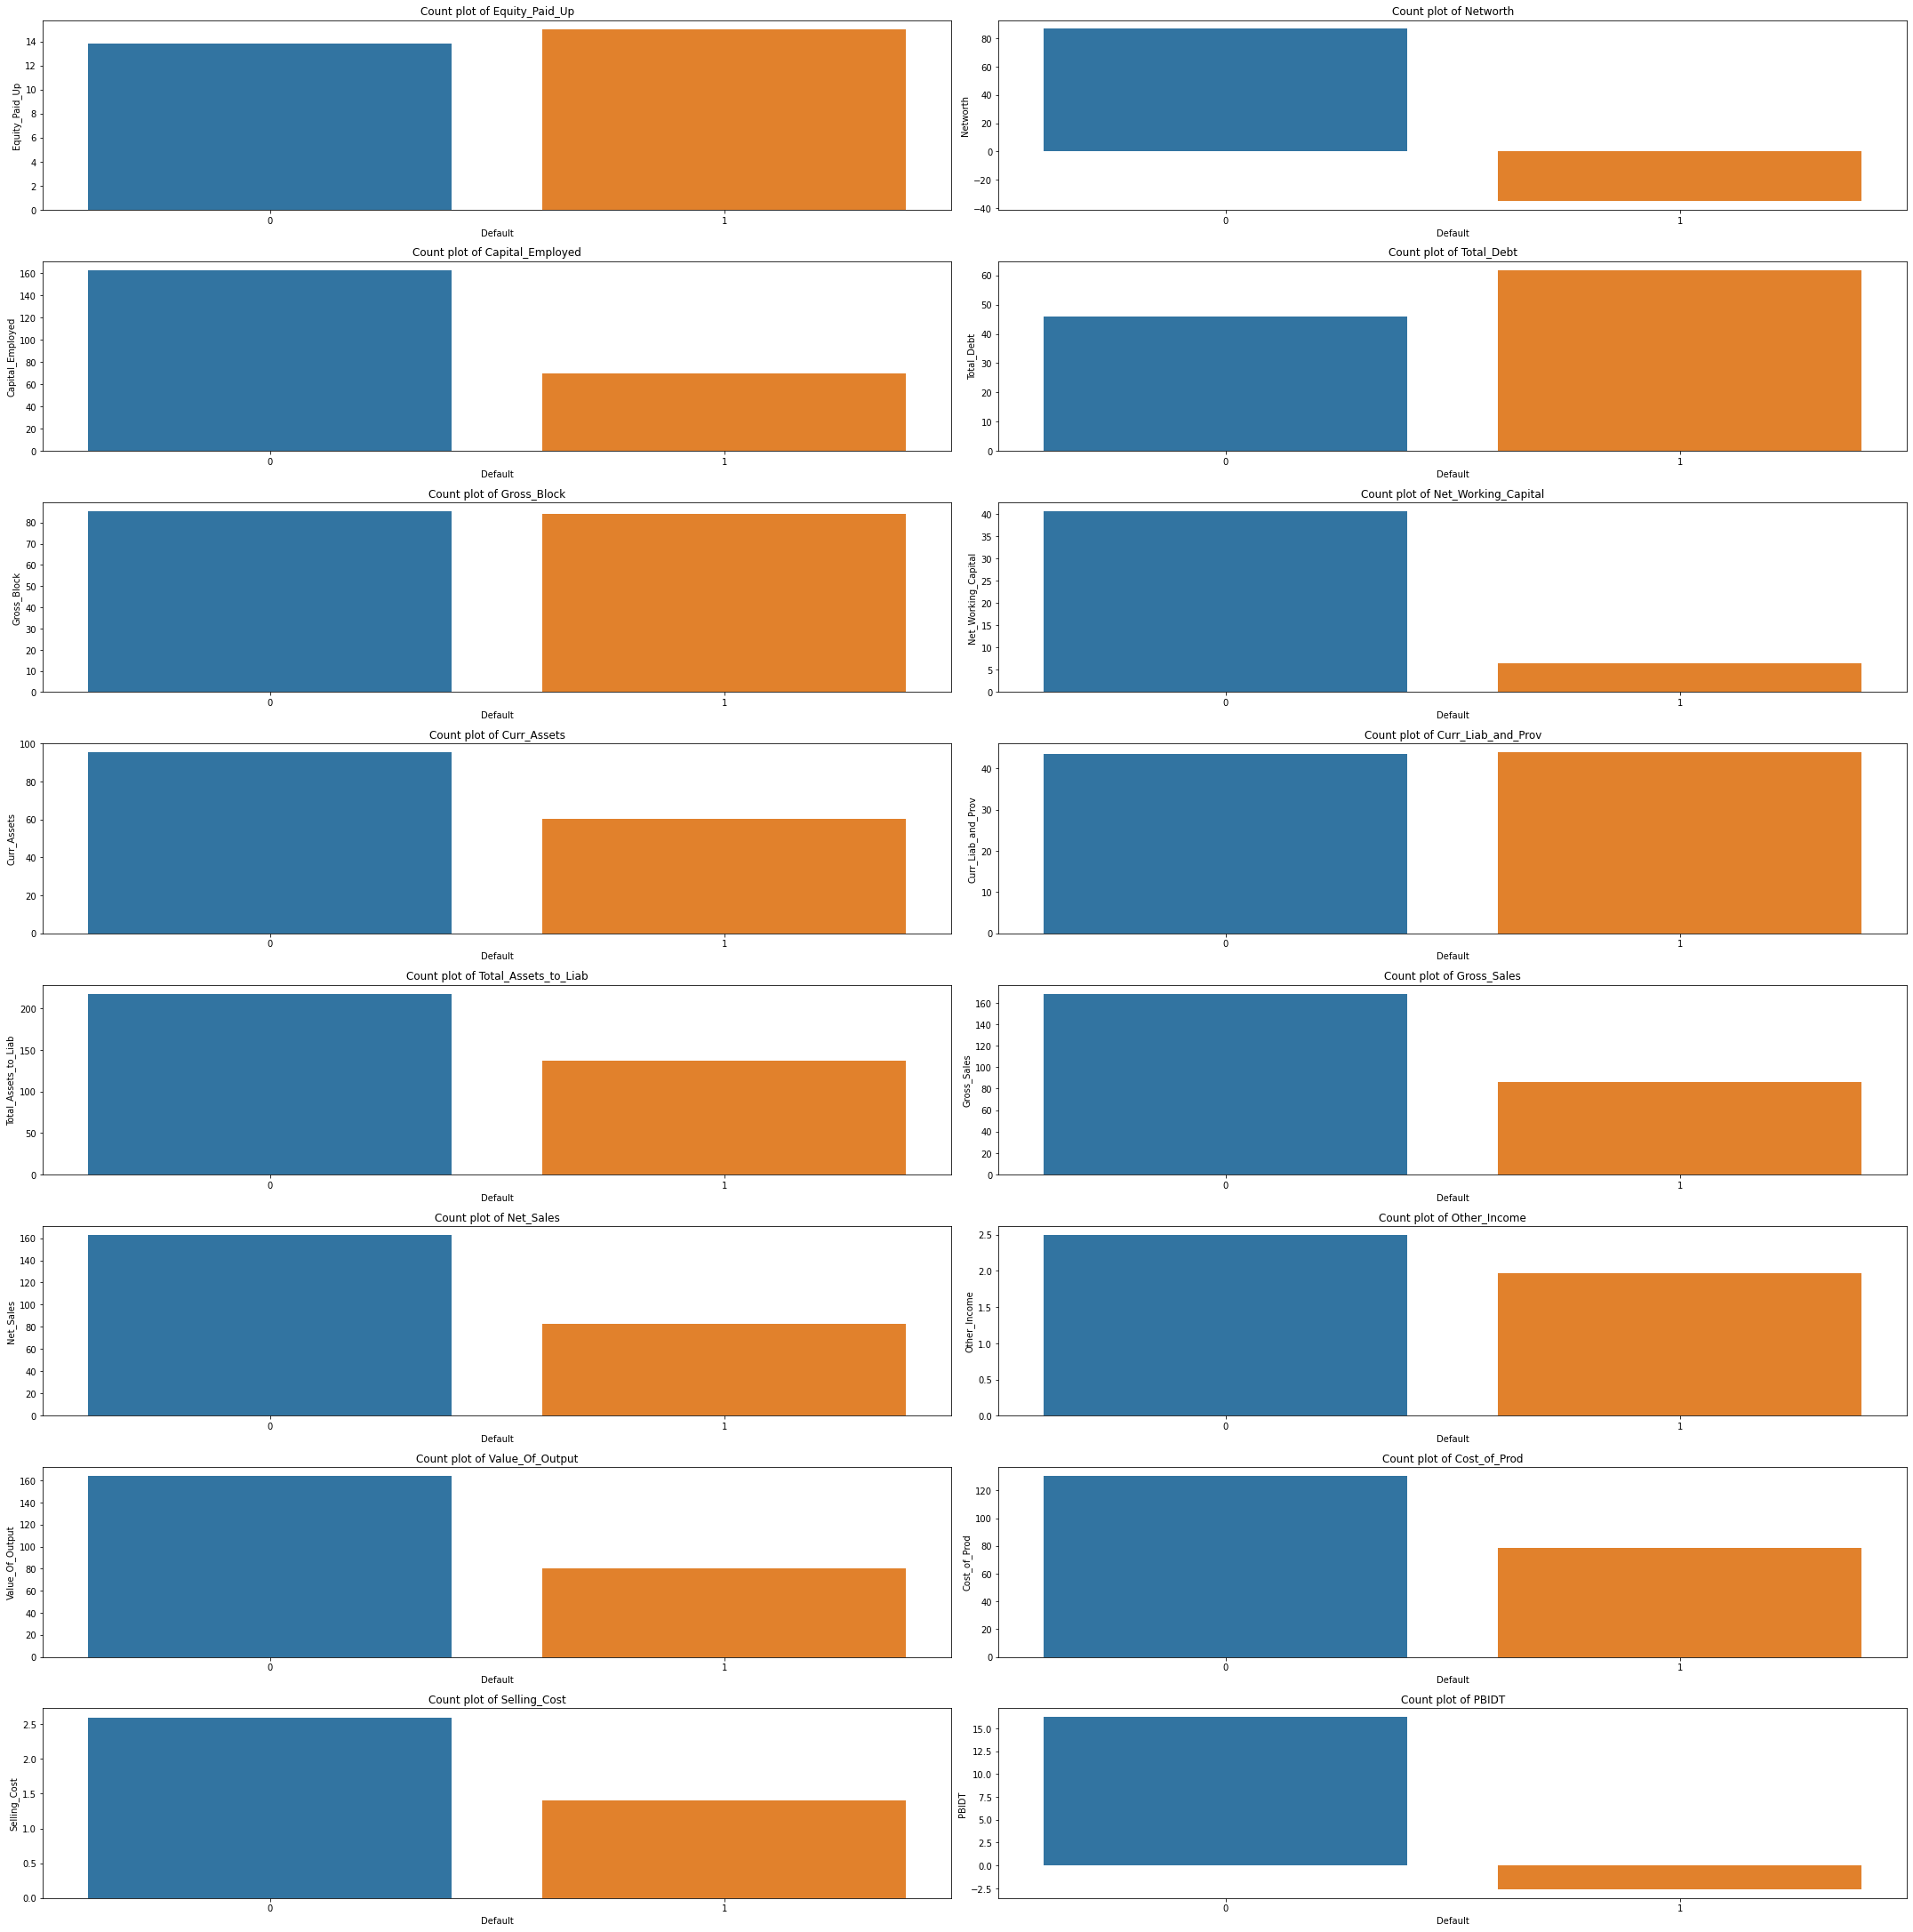

In [ ]:
# Distribution and boxplots of the variables

a = len(credit_df.iloc[:,0:16].select_dtypes(exclude= 'object').columns)  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig1 = plt.figure(figsize=(30,60))

for i in credit_df.iloc[:,0:16].select_dtypes(exclude= 'object').columns:
    plt.subplot(a, b, c)
    plt.title('Count plot of {}'.format(i))
    plt.xlabel(i)
    sns.barplot(data = credit_df, x='Default', y=credit_df[i], ci=None)
    c = c + 1

plt.tight_layout()
plt.show()

In [35]:
X = credit_df.drop('Default', axis = 1)
y = credit_df['Default']

In [36]:
X.shape

(3581, 55)

In [37]:
y.shape

(3581,)

In [38]:
sc = StandardScaler()
X_scaled = pd.DataFrame(sc.fit_transform(X), columns=X.columns)
X_scaled.shape
X_scaled.head()

Equity_Paid_Up  Networth  Capital_Employed  Total_Debt  Gross_Block  \
0        2.085946 -2.123787         -2.277322    1.958084     2.010772   
1        2.085946 -2.123787          1.936706    1.958084     2.010772   
2        2.085946  1.891284          1.936706    1.958084     2.010772   
3        2.085946 -2.123787          1.936706    1.958084     2.010772   
4        2.085946 -2.123787          1.936706    1.958084     2.010772   

   Net_Working_Capital  Curr_Assets  Curr_Liab_and_Prov  Total_Assets_to_Liab  \
0            -2.126723     -0.41727            1.962127             -0.353725   
1            -2.126723      1.97195            1.962127              1.968745   
2             1.934219      1.97195            1.962127              1.968745   
3            -2.126723      1.97195            1.962127              1.968745   
4             1.934219      1.97195            1.962127              1.968745   

   Gross_Sales  Net_Sales  Other_Income  Value_Of_Output  Cost_of_Prod  \
0    -0.711464  -0.711306      1.497724        -0.711494      0.073915   
1     1.980322   1.983689      1.924280         1.985638      1.988237   
2     1.037000   1.097597      1.924280         0.671282      1.620586   
3     1.980322   1.983689      1.924280         1.985638      1.988237   
4    -0.538816  -0.532690      1.924280        -0.533431      0.351567   

   Selling_Cost     PBIDT      PBDT      PBIT       PBT       PAT  \
0     -0.666816 -2.078102 -1.859773 -1.970437 -1.696935 -1.683475   
1      1.940207  1.878688 -0.797149  1.496727 -1.696935 -1.683475   
2      1.940207 -2.078102 -1.859773 -1.970437 -1.696935 -1.683475   
3      0.235511 -2.078102 -1.859773 -1.970437 -1.696935 -1.683475   
4     -0.134605 -2.078102 -1.859773 -1.970437 -1.696935 -1.683475   

   Adjusted_PAT        CP  Book_Value_Unit_Curr  Book_Value_Adj_Unit_Curr  \
0     -1.674665 -1.864862             -2.214664                 -2.203572   
1     -1.674665 -0.857004             -1.009071                 -1.063671   
2     -1.674665 -1.864862              0.808670                  1.117184   
3     -1.674665 -1.864862             -1.415785                 -1.551630   
4     -1.674665 -1.864862             -2.214664                 -2.203572   

   CEPS_annualised_Unit_Curr  Cash_Flow_From_Opr  Cash_Flow_From_Inv  \
0                  -1.999651           -1.820242            0.652292   
1                  -0.537970            1.785536           -1.754468   
2                  -1.999651           -1.820242           -1.754468   
3                  -1.999651            1.785536            1.738381   
4                  -1.999651           -1.820242            1.738381   

   Cash_Flow_From_Fin  ROG_Net_Worth_perc  ROG_Capital_Employed_perc  \
0            1.602894           -1.358287                  -1.485473   
1            1.602894           -1.741678                   0.114263   
2            1.602894           -1.741678                   0.667609   
3           -1.722950           -1.741678                  -1.940092   
4            1.602894           -1.741678                  -0.953410   

   ROG_Gross_Block_perc  ROG_Gross_Sales_perc  ROG_Net_Sales_perc  \
0             -1.655370             -0.208090           -0.207734   
1              0.027310             -0.023183           -0.023099   
2             -0.655139             -1.847422           -1.849637   
3             -0.619975              0.052092            0.052064   
4             -0.341265             -1.847422           -1.849637   

   ROG_Cost_of_Prod_perc  ROG_Total_Assets_perc  ROG_PBIDT_perc  \
0              -0.198056              -1.837272       -0.099131   
1               0.157513               0.144546       -0.098998   
2              -1.834943              -0.310398       -1.901440   
3               0.261045              -0.881523       -1.901440   
4              -1.712698              -0.617974       -0.703727   

   ROG_PBDT_perc  ROG_PBIT_perc  ROG_PBT_perc  ROG_PAT_perc  ROG

In [39]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["Variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

    return(vif)

In [40]:
vif = calc_vif(X).sort_values(by = 'VIF', ascending = False)
vif

Variables          VIF
10                          Net_Sales  1695.306619
9                         Gross_Sales   966.893477
12                    Value_Of_Output   690.034254
31               ROG_Gross_Sales_perc   541.765684
32                 ROG_Net_Sales_perc   541.204276
16                               PBDT   117.557310
8                Total_Assets_to_Liab   105.160725
21                                 CP   104.200271
19                                PAT    76.643734
18                                PBT    75.497107
2                    Capital_Employed    73.126864
13                       Cost_of_Prod    50.651908
6                         Curr_Assets    33.032183
49                    CPM_perc_Latest    32.856068
46                 PBIDTM_perc_Latest    32.587393
15                              PBIDT    32.575758
47                  PBITM_perc_Latest    30.210861
17                               PBIT    29.348190
48                  PBDTM_perc_Latest    27.639146
36                      ROG_PBDT_perc    25.072278
7                  Curr_Liab_and_Prov    23.275671
38                       ROG_PBT_perc    19.355058
50                  APATM_perc_Latest    19.249661
40                        ROG_CP_perc    18.303734
22               Book_Value_Unit_Curr    17.479901
20                       Adjusted_PAT    17.199963
35                     ROG_PBIDT_perc    15.114048
39                       ROG_PAT_perc    14.706775
23           Book_Value_Adj_Unit_Curr    13.829842
53    Value_of_Output_to_Total_Assets    12.653251
37                      ROG_PBIT_perc    12.435009
1                            Networth    12.431923
4                         Gross_Block    12.185575
44  Total_Asset_Turnover_Ratio_Latest    11.059343
54     Value_of_Output_to_Gross_Block     8.856660
42          Fixed_Assets_Ratio_Latest     8.639151
3                          Total_Debt     7.283525
24          CEPS_annualised_Unit_Curr     6.666628
5                 Net_Working_Capital     5.258877
0                      Equity_Paid_Up     4.539306
11                       Other_Income     4.429702
14                       Selling_Cost     4.208224
29          ROG_Capital_Employed_perc     4.015668
25                 Cash_Flow_From_Opr     3.749838
34              ROG_Total_Assets_perc     3.390302
28                 ROG_Net_Worth_perc     2.945914
27                 Cash_Flow_From_Fin     2.904408
45        Interest_Cover_Ratio_Latest     2.487099
26                 Cash_Flow_From_Inv     2.476801
43               Debtors_Ratio_Latest     2.431585
51                   Debtors_Vel_Days     2.403858
41                  Curr_Ratio_Latest     2.337853
52                 Creditors_Vel_Days     2.303897
33              ROG_Cost_of_Prod_perc     2.030196
30               ROG_Gross_Block_perc     1.572333

In [41]:
vif1 = calc_vif(X_scaled).sort_values(by = 'VIF', ascending = False)
vif1

Variables          VIF
10                          Net_Sales  1125.774014
9                         Gross_Sales   642.043068
31               ROG_Gross_Sales_perc   519.313472
32                 ROG_Net_Sales_perc   518.863982
12                    Value_Of_Output   458.354381
16                               PBDT    94.569563
21                                 CP    83.598791
8                Total_Assets_to_Liab    67.773027
19                                PAT    66.366298
18                                PBT    65.027456
2                    Capital_Employed    47.554161
13                       Cost_of_Prod    33.655946
49                    CPM_perc_Latest    27.665002
46                 PBIDTM_perc_Latest    25.012474
47                  PBITM_perc_Latest    24.708043
36                      ROG_PBDT_perc    24.655285
15                              PBIDT    24.043203
48                  PBDTM_perc_Latest    23.136674
17                               PBIT    22.762018
6                         Curr_Assets    21.210161
38                       ROG_PBT_perc    19.240368
40                        ROG_CP_perc    17.958785
50                  APATM_perc_Latest    17.444440
7                  Curr_Liab_and_Prov    15.401677
20                       Adjusted_PAT    15.040939
35                     ROG_PBIDT_perc    14.694771
39                       ROG_PAT_perc    14.609704
37                      ROG_PBIT_perc    12.268943
22               Book_Value_Unit_Curr    11.162989
23           Book_Value_Adj_Unit_Curr     8.781721
1                            Networth     8.769696
4                         Gross_Block     8.172585
53    Value_of_Output_to_Total_Assets     6.798683
44  Total_Asset_Turnover_Ratio_Latest     6.188449
54     Value_of_Output_to_Gross_Block     5.303962
24          CEPS_annualised_Unit_Curr     5.185039
42          Fixed_Assets_Ratio_Latest     5.097398
3                          Total_Debt     4.995156
5                 Net_Working_Capital     3.800800
29          ROG_Capital_Employed_perc     3.766049
34              ROG_Total_Assets_perc     3.172328
25                 Cash_Flow_From_Opr     3.126602
11                       Other_Income     2.958674
14                       Selling_Cost     2.916714
28                 ROG_Net_Worth_perc     2.725958
27                 Cash_Flow_From_Fin     2.671936
0                      Equity_Paid_Up     2.501596
26                 Cash_Flow_From_Inv     2.126039
45        Interest_Cover_Ratio_Latest     1.942799
33              ROG_Cost_of_Prod_perc     1.923088
41                  Curr_Ratio_Latest     1.459188
43               Debtors_Ratio_Latest     1.400266
52                 Creditors_Vel_Days     1.397463
51                   Debtors_Vel_Days     1.387635
30               ROG_Gross_Block_perc     1.368861

In [42]:
import time
import math
start = time.time()

for i in range(65):
    v = calc_vif(X).sort_values(by = 'VIF', ascending = False)
    if (v.iloc[0,1] > 5):
        X = X.drop(columns=v.iloc[0,0])

end = time.time()
print('Time taken =', end-start)

Time taken = 43.24667191505432


In [45]:
calc_vif(X).sort_values(by = 'VIF', ascending = False)

Variables       VIF
7           CEPS_annualised_Unit_Curr  4.529798
1                          Total_Debt  3.997247
12          ROG_Capital_Employed_perc  3.851350
0                      Equity_Paid_Up  3.565371
8                  Cash_Flow_From_Opr  3.564828
4                        Selling_Cost  3.559866
3                        Other_Income  3.419439
5                        Adjusted_PAT  3.330500
6            Book_Value_Adj_Unit_Curr  3.265210
18                        ROG_CP_perc  3.245330
16              ROG_Total_Assets_perc  3.225990
17                      ROG_PBIT_perc  3.216480
21  Total_Asset_Turnover_Ratio_Latest  2.846832
10                 Cash_Flow_From_Fin  2.830874
11                 ROG_Net_Worth_perc  2.815425
2                 Net_Working_Capital  2.743021
9                  Cash_Flow_From_Inv  2.406995
26     Value_of_Output_to_Gross_Block  2.309631
24                   Debtors_Vel_Days  2.296628
20               Debtors_Ratio_Latest  2.259477
22        Interest_Cover_Ratio_Latest  2.218297
19                  Curr_Ratio_Latest  2.165288
14                 ROG_Net_Sales_perc  2.115645
25                 Creditors_Vel_Days  2.112772
15              ROG_Cost_of_Prod_perc  1.996268
23                  PBITM_perc_Latest  1.819268
13               ROG_Gross_Block_perc  1.524563

In [44]:
start = time.time()

for i in range(65):
    v1 = calc_vif(X_scaled).sort_values(by = 'VIF', ascending = False)
    if (v1.iloc[0,1] > 5):
        X_scaled = X_scaled.drop(columns=v1.iloc[0,0])

end = time.time()
print('Time taken =', end-start)

Time taken = 48.77126359939575


In [46]:
calc_vif(X_scaled).sort_values(by = 'VIF', ascending = False)

Variables       VIF
26                  APATM_perc_Latest  4.938597
21          Fixed_Assets_Ratio_Latest  4.686416
29     Value_of_Output_to_Gross_Block  4.628876
1                            Networth  4.456814
25                  PBITM_perc_Latest  4.359916
8           CEPS_annualised_Unit_Curr  3.640054
13          ROG_Capital_Employed_perc  3.632380
6                        Adjusted_PAT  3.308366
19                        ROG_CP_perc  3.193241
18                      ROG_PBIT_perc  3.181090
17              ROG_Total_Assets_perc  3.019789
9                  Cash_Flow_From_Opr  3.014322
2                          Total_Debt  2.798949
7            Book_Value_Adj_Unit_Curr  2.624430
12                 ROG_Net_Worth_perc  2.606539
11                 Cash_Flow_From_Fin  2.606153
5                        Selling_Cost  2.472616
4                        Other_Income  2.422421
0                      Equity_Paid_Up  2.227358
3                 Net_Working_Capital  2.169251
10                 Cash_Flow_From_Inv  2.082320
15                 ROG_Net_Sales_perc  2.029947
16              ROG_Cost_of_Prod_perc  1.894378
23  Total_Asset_Turnover_Ratio_Latest  1.850178
24        Interest_Cover_Ratio_Latest  1.846215
20                  Curr_Ratio_Latest  1.421519
27                   Debtors_Vel_Days  1.349276
22               Debtors_Ratio_Latest  1.338496
14               ROG_Gross_Block_perc  1.337674
28                 Creditors_Vel_Days  1.273768

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=42)

In [48]:
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y, test_size = 0.33, random_state=42)

In [49]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2399, 27)
(2399,)
(1182, 27)
(1182,)


In [50]:
print(X_train_scaled.shape)
print(y_train_scaled.shape)
print(X_test_scaled.shape)
print(y_test_scaled.shape)

(2399, 30)
(2399,)
(1182, 30)
(1182,)


In [51]:
model_1 = sm.Logit(y_train, X_train).fit()
model_1.summary()

Optimization terminated successfully.
         Current function value: 0.118271
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2399
Model:                          Logit   Df Residuals:                     2372
Method:                           MLE   Df Model:                           26
Date:                Mon, 23 May 2022   Pseudo R-squ.:                  0.6413
Time:                        09:49:39   Log-Likelihood:                -283.73
converged:                       True   LL-Null:                       -791.02
Covariance Type:            nonrobust   LLR p-value:                3.024e-197
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Equity_Paid_Up                       -0.0261      0.011     -2.480      0.013      -0.047      -0.005
Total_Debt                            0.0112      0.004      3.006      0.003       0.004       0.018
Net_Working_Capital                  -0.0036      0.004     -0.978      0.328      -0.011       0.004
Other_Income                         -0.0116      0.058     -0.199      0.842      -0.126       0.103
Selling_Cost                          0.0650      0.062      1.053      0.292      -0.056       0.186
Adjusted_PAT                          0.0122      0.039      0.313      0.754      -0.064       0.088
Book_Value_Adj_Unit_Curr             -0.1119      0.011    -10.337      0.000      -0.133      -0.091
CEPS_annualised_Unit_Curr            -0.0930      0.035     -2.634      0.008      -0.162      -0.024
Cash_Flow_From_Opr                   -0.0039      0.019     -0.207      0.836      -0.041       0.033
Cash_Flow_From_Inv                    0.0072      0.039      0.184      0.854      -0.069       0.083
Cash_Flow_From_Fin                    0.0200      0.036      0.555      0.579      -0.051       0.091
ROG_Net_Worth_perc                   -0.0242      0.011     -2.272      0.023      -0.045      -0.003
ROG_Capital_Employed_perc             0.0255      0.010      2.587      0.010       0.006       0.045
ROG_Gross_Block_perc                 -0.0273      0.020     -1.370      0.171      -0.066       0.012
ROG_Net_Sales_perc                   -0.0014      0.004     -0.321      0.748      -0.010       0.007
ROG_Cost_of_Prod_perc                -0.0021      0.004     -0.502      0.616      -0.010       0.006
ROG_Total_Assets_perc                -0.0165      0.010     -1.683      0.092      -0.036       0.003
ROG_PBIT_perc                         0.0022      0.002      1.039      0.299      -0.002       0.006
ROG_CP_perc                          -0.0006      0.002     -0.266      0.790      -0.005       0.004
Curr_Ratio_Latest                    -0.5463      0.084     -6.498      0.000      -0.711      -0.382
Debtors_Ratio_Latest                 -0.0556      0.023     -2.398      0.016      -0.101      -0.010
Total_Asset_Turnover_Ratio_Latest     0.0171      0.125      0.137      0.891      -0.228       0.262
Interest_Cover_Ratio_Latest          -0.0591      0.044     -1.339      0.181      -0.146       0.027
PBITM_perc_Latest                    -0.0365      0.010     -3.714      0.000      -0.056      -0.017
Debtors_Vel_Days                     -0.0030      0.001     -2.103      0.035      -0.006      -0.000
Creditors_Vel_Days                    0.0007      0.001      0.500      0.617      -0.002       0.004
Value_of_Output_to_Gross_Block       -0.0629      0.047     -1.333      0.183      -0.155       0.030
=====================================================================================================

Possibly complete quasi-separation: A fraction 0.29 of observations can be
per

In [52]:
model_2 = sm.Logit(y_train_scaled.ravel(), X_train_scaled).fit()
model_2.summary()

Optimization terminated successfully.
         Current function value: 0.606631
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 2399
Model:                          Logit   Df Residuals:                     2369
Method:                           MLE   Df Model:                           29
Date:                Mon, 23 May 2022   Pseudo R-squ.:                 -0.8398
Time:                        09:49:44   Log-Likelihood:                -1455.3
converged:                       True   LL-Null:                       -791.02
Covariance Type:            nonrobust   LLR p-value:                     1.000
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Equity_Paid_Up                        0.1433      0.074      1.940      0.052      -0.001       0.288
Networth                             -0.9051      0.119     -7.598      0.000      -1.139      -0.672
Total_Debt                            0.3310      0.085      3.901      0.000       0.165       0.497
Net_Working_Capital                   0.0073      0.069      0.104      0.917      -0.129       0.143
Other_Income                          0.2878      0.076      3.768      0.000       0.138       0.438
Selling_Cost                          0.0417      0.072      0.582      0.561      -0.099       0.182
Adjusted_PAT                          0.1092      0.081      1.350      0.177      -0.049       0.268
Book_Value_Adj_Unit_Curr             -0.3592      0.072     -4.962      0.000      -0.501      -0.217
CEPS_annualised_Unit_Curr             0.0507      0.085      0.599      0.549      -0.115       0.217
Cash_Flow_From_Opr                    0.1244      0.081      1.527      0.127      -0.035       0.284
Cash_Flow_From_Inv                    0.0258      0.065      0.398      0.690      -0.101       0.153
Cash_Flow_From_Fin                    0.1212      0.076      1.604      0.109      -0.027       0.269
ROG_Net_Worth_perc                   -0.2645      0.074     -3.554      0.000      -0.410      -0.119
ROG_Capital_Employed_perc            -0.0785      0.087     -0.904      0.366      -0.249       0.092
ROG_Gross_Block_perc                  0.0269      0.051      0.532      0.595      -0.072       0.126
ROG_Net_Sales_perc                   -0.0313      0.063     -0.499      0.618      -0.154       0.092
ROG_Cost_of_Prod_perc                -0.0527      0.061     -0.864      0.387      -0.172       0.067
ROG_Total_Assets_perc                 0.0189      0.078      0.243      0.808      -0.134       0.172
ROG_PBIT_perc                         0.0837      0.080      1.045      0.296      -0.073       0.241
ROG_CP_perc                          -0.0177      0.079     -0.223      0.824      -0.173       0.138
Curr_Ratio_Latest                    -0.3298      0.053     -6.246      0.000      -0.433      -0.226
Fixed_Assets_Ratio_Latest            -0.0270      0.097     -0.280      0.779      -0.216       0.162
Debtors_Ratio_Latest                 -0.0153      0.052     -0.296      0.767      -0.117       0.086
Total_Asset_Turnover_Ratio_Latest    -0.2775      0.061     -4.562      0.000      -0.397      -0.158
Interest_Cover_Ratio_Latest           0.0202      0.060      0.338      0.735      -0.097       0.137
PBITM_perc_Latest                    -0.2722      0.102     -2.670      0.008      -0.472      -0.072
APATM_perc_Latest                     0.1677      0.109      1.541      0.123      -0.046       0.381
Debtors_Vel_Days                     -0.1068      0.053     -2.034      0.042      -0.210      -0.004
Creditors_Vel_Days                    0.0982      0.052      1.891      0.059  

In [53]:
p_val_df1 = pd.DataFrame(model_1.pvalues.sort_values(ascending=False), columns=['p-value']).reset_index()
p_val_df1

index       p-value
0   Total_Asset_Turnover_Ratio_Latest  8.909725e-01
1                  Cash_Flow_From_Inv  8.538276e-01
2                        Other_Income  8.421819e-01
3                  Cash_Flow_From_Opr  8.361698e-01
4                         ROG_CP_perc  7.898858e-01
5                        Adjusted_PAT  7.540023e-01
6                  ROG_Net_Sales_perc  7.482436e-01
7                  Creditors_Vel_Days  6.167887e-01
8               ROG_Cost_of_Prod_perc  6.156285e-01
9                  Cash_Flow_From_Fin  5.788428e-01
10                Net_Working_Capital  3.283112e-01
11                      ROG_PBIT_perc  2.987699e-01
12                       Selling_Cost  2.923887e-01
13     Value_of_Output_to_Gross_Block  1.826300e-01
14        Interest_Cover_Ratio_Latest  1.806582e-01
15               ROG_Gross_Block_perc  1.707107e-01
16              ROG_Total_Assets_perc  9.232206e-02
17                   Debtors_Vel_Days  3.549921e-02
18                 ROG_Net_Worth_perc  2.308311e-02
19               Debtors_Ratio_Latest  1.649608e-02
20                     Equity_Paid_Up  1.312630e-02
21          ROG_Capital_Employed_perc  9.684674e-03
22          CEPS_annualised_Unit_Curr  8.431159e-03
23                         Total_Debt  2.649312e-03
24                  PBITM_perc_Latest  2.041242e-04
25                  Curr_Ratio_Latest  8.129915e-11
26           Book_Value_Adj_Unit_Curr  4.777537e-25

In [54]:
p_val_df2 = pd.DataFrame(model_2.pvalues.sort_values(ascending=False), columns=['p-value']).reset_index()
p_val_df2

index       p-value
0                 Net_Working_Capital  9.168732e-01
1                         ROG_CP_perc  8.235121e-01
2               ROG_Total_Assets_perc  8.081414e-01
3           Fixed_Assets_Ratio_Latest  7.793288e-01
4                Debtors_Ratio_Latest  7.670950e-01
5         Interest_Cover_Ratio_Latest  7.350555e-01
6                  Cash_Flow_From_Inv  6.903130e-01
7                  ROG_Net_Sales_perc  6.176725e-01
8                ROG_Gross_Block_perc  5.947891e-01
9                        Selling_Cost  5.607434e-01
10          CEPS_annualised_Unit_Curr  5.494783e-01
11              ROG_Cost_of_Prod_perc  3.873828e-01
12          ROG_Capital_Employed_perc  3.659161e-01
13     Value_of_Output_to_Gross_Block  3.241847e-01
14                      ROG_PBIT_perc  2.961552e-01
15                       Adjusted_PAT  1.771471e-01
16                 Cash_Flow_From_Opr  1.268509e-01
17                  APATM_perc_Latest  1.232986e-01
18                 Cash_Flow_From_Fin  1.088025e-01
19                 Creditors_Vel_Days  5.868399e-02
20                     Equity_Paid_Up  5.232753e-02
21                   Debtors_Vel_Days  4.199144e-02
22                  PBITM_perc_Latest  7.591605e-03
23                 ROG_Net_Worth_perc  3.796711e-04
24                       Other_Income  1.647079e-04
25                         Total_Debt  9.579923e-05
26  Total_Asset_Turnover_Ratio_Latest  5.067776e-06
27           Book_Value_Adj_Unit_Curr  6.959959e-07
28                  Curr_Ratio_Latest  4.212284e-10
29                           Networth  3.005243e-14

In [55]:
ytrain_predict_model_1 = model_1.predict(X_train)
ytest_predict_model_1 = model_1.predict(X_test)

In [56]:
ytrain_predict_model_2 = model_2.predict(X_train_scaled)
ytest_predict_model_2 = model_2.predict(X_test_scaled)

In [57]:
y_class_pred_1=[]
for i in range(0,len(ytrain_predict_model_1)):
    if np.array(ytrain_predict_model_1)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred_1.append(a)

In [58]:
y_class_pred_2=[]
for i in range(0,len(ytrain_predict_model_2)):
    if np.array(ytrain_predict_model_2)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred_2.append(a)

Accuracy for the model 1 on the training set is:   0.9545644018340975


Classification report for the model 1 on the training set is: 
               precision    recall  f1-score   support

           0       0.96      0.99      0.98      2154
           1       0.86      0.67      0.75       245

    accuracy                           0.95      2399
   macro avg       0.91      0.83      0.86      2399
weighted avg       0.95      0.95      0.95      2399





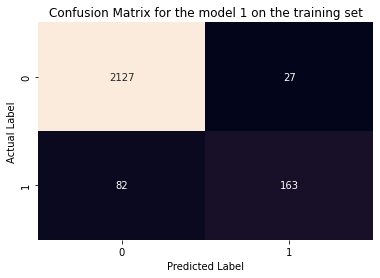

In [59]:
print('Accuracy for the model 1 on the training set is:',' ',accuracy_score(y_train,y_class_pred_1))
print('\n')
print('Classification report for the model 1 on the training set is:','\n',classification_report(y_train,y_class_pred_1))
print('\n')
sns.heatmap(confusion_matrix(y_train,y_class_pred_1),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for the model 1 on the training set')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

Accuracy for the model 2 on the scaled training set is:   0.6690287619841601


Classification report for the model 2 on the scaled training set is: 
               precision    recall  f1-score   support

           0       1.00      0.63      0.77      2154
           1       0.23      0.98      0.38       245

    accuracy                           0.67      2399
   macro avg       0.61      0.81      0.58      2399
weighted avg       0.92      0.67      0.73      2399





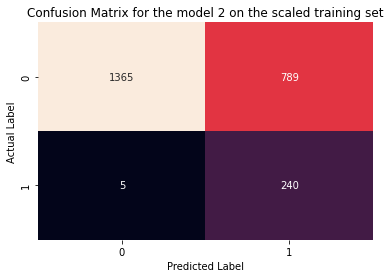

In [ ]:
print('Accuracy for the model 2 on the scaled training set is:',' ',accuracy_score(y_train_scaled.ravel(),y_class_pred_2))
print('\n')
print('Classification report for the model 2 on the scaled training set is:','\n',classification_report(y_train_scaled.ravel(),y_class_pred_2))
print('\n')
sns.heatmap(confusion_matrix(y_train_scaled.ravel(),y_class_pred_2),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for the model 2 on the scaled training set')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

Area under the curve for Model 1 for the training set is 0.9687226422602467 



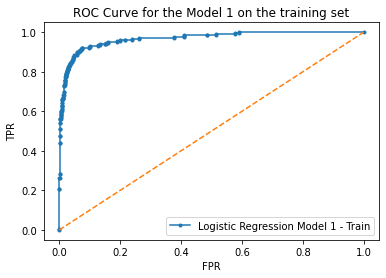

In [ ]:
print('Area under the curve for Model 1 for the training set is',roc_auc_score(y_train,ytrain_predict_model_1),'\n')

#plt.figure(figsize=(12,7))
fpr, tpr, thresholds = roc_curve(y_train,ytrain_predict_model_1)
plt.plot(fpr, tpr, marker='.')
plt.plot([0, 1], [0, 1], linestyle='--')

plt.title('ROC Curve for the Model 1 on the training set')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(['Logistic Regression Model 1 - Train'])
plt.show()

Area under the curve for Model 2 for the scaled training set is 0.946368408087469 



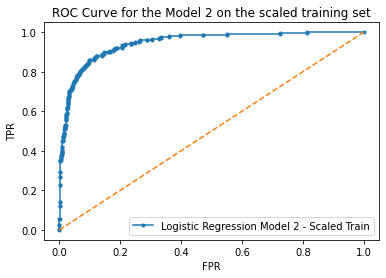

In [ ]:
print('Area under the curve for Model 2 for the scaled training set is',roc_auc_score(y_train_scaled,ytrain_predict_model_2),'\n')

#plt.figure(figsize=(12,7))
fpr, tpr, thresholds = roc_curve(y_train_scaled,ytrain_predict_model_2)
plt.plot(fpr, tpr, marker='.')
plt.plot([0, 1], [0, 1], linestyle='--')

plt.title('ROC Curve for the Model 2 on the scaled training set')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(['Logistic Regression Model 2 - Scaled Train'])
plt.show()

In [ ]:
y_class_pred_3=[]
for i in range(0,len(ytest_predict_model_1)):
    if np.array(ytest_predict_model_1)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred_3.append(a)

In [ ]:
y_class_pred_4=[]
for i in range(0,len(ytest_predict_model_2)):
    if np.array(ytest_predict_model_2)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred_4.append(a)

Accuracy for the model 1 on the testing set is:   0.9560067681895094


Classification report for the model 1 on the testing set is: 
               precision    recall  f1-score   support

           0       0.96      0.99      0.98      1040
           1       0.91      0.70      0.79       142

    accuracy                           0.96      1182
   macro avg       0.93      0.85      0.88      1182
weighted avg       0.95      0.96      0.95      1182





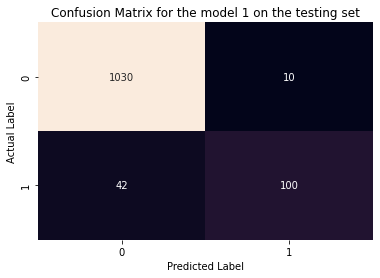

In [ ]:
print('Accuracy for the model 1 on the testing set is:',' ',accuracy_score(y_test,y_class_pred_3))
print('\n')
print('Classification report for the model 1 on the testing set is:','\n',classification_report(y_test,y_class_pred_3))
print('\n')
sns.heatmap(confusion_matrix(y_test,y_class_pred_3),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for the model 1 on the testing set')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

Accuracy for the model 2 on the scaled testing set is:   0.6649746192893401


Classification report for the model 2 on the scaled testing set is: 
               precision    recall  f1-score   support

           0       1.00      0.62      0.77      1040
           1       0.26      0.99      0.41       142

    accuracy                           0.66      1182
   macro avg       0.63      0.80      0.59      1182
weighted avg       0.91      0.66      0.72      1182





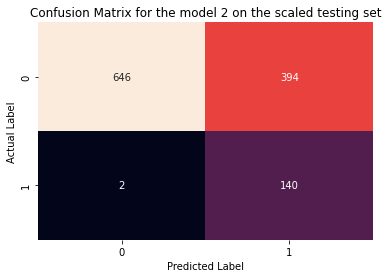

In [ ]:
print('Accuracy for the model 2 on the scaled testing set is:',' ',accuracy_score(y_test_scaled,y_class_pred_4))
print('\n')
print('Classification report for the model 2 on the scaled testing set is:','\n',classification_report(y_test_scaled,y_class_pred_4))
print('\n')
sns.heatmap(confusion_matrix(y_test_scaled,y_class_pred_4),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for the model 2 on the scaled testing set')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

Area under the curve for Model 1 for the testing set is 0.9755552546045504 



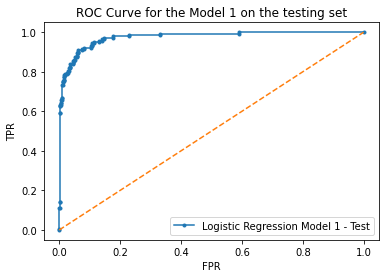

In [ ]:
print('Area under the curve for Model 1 for the testing set is',roc_auc_score(y_test,ytest_predict_model_1),'\n')

#plt.figure(figsize=(12,7))
fpr, tpr, thresholds = roc_curve(y_test,ytest_predict_model_1)
plt.plot(fpr, tpr, marker='.')
plt.plot([0, 1], [0, 1], linestyle='--')

plt.title('ROC Curve for the Model 1 on the testing set')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(['Logistic Regression Model 1 - Test'])
plt.show()

Area under the curve for Model 2 for the scaled testing set is 0.9474471830985915 



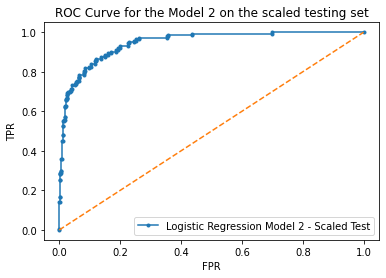

In [ ]:
print('Area under the curve for Model 2 for the scaled testing set is',roc_auc_score(y_test_scaled,ytest_predict_model_2),'\n')

#plt.figure(figsize=(12,7))
fpr, tpr, thresholds = roc_curve(y_test_scaled,ytest_predict_model_2)
plt.plot(fpr, tpr, marker='.')
plt.plot([0, 1], [0, 1], linestyle='--')

plt.title('ROC Curve for the Model 2 on the scaled testing set')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(['Logistic Regression Model 2 - Scaled Test'])
plt.show()

In [60]:
import time
start = time.time()

for i in range(25):
    model_3 = sm.Logit(y_train, X_train).fit()
    v3 = pd.DataFrame(model_3.pvalues.sort_values(ascending=False), columns=['pvalue']).reset_index()
    if (v3.iloc[0,1] > 0.05):
        X_train = X_train.drop(columns=v3.iloc[0,0])

end = time.time()
print('Time taken =', end-start)

Optimization terminated successfully.
         Current function value: 0.118271
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.118275
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.118282
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.118291
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.118310
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.118328
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.118340
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.118358
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.118420
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.

In [61]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2399
Model:                          Logit   Df Residuals:                     2389
Method:                           MLE   Df Model:                            9
Date:                Mon, 23 May 2022   Pseudo R-squ.:                  0.6314
Time:                        09:50:24   Log-Likelihood:                -291.61
converged:                       True   LL-Null:                       -791.02
Covariance Type:            nonrobust   LLR p-value:                3.092e-209
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Equity_Paid_Up               -0.0231      0.010     -2.354      0.019      -0.042      -0.004
Total_Debt                    0.0096      0.002      3.930      0.000       0.005       0.014
Book_Value_Adj_Unit_Curr     -0.1204      0.010    -11.492      0.000      -0.141      -0.100
CEPS_annualised_Unit_Curr    -0.0900      0.031     -2.934      0.003      -0.150      -0.030
ROG_Net_Worth_perc           -0.0258      0.010     -2.650      0.008      -0.045      -0.007
ROG_Capital_Employed_perc     0.0153      0.007      2.138      0.033       0.001       0.029
Curr_Ratio_Latest            -0.5760      0.082     -7.027      0.000      -0.737      -0.415
Debtors_Ratio_Latest         -0.0592      0.019     -3.088      0.002      -0.097      -0.022
PBITM_perc_Latest            -0.0467      0.009     -5.333      0.000      -0.064      -0.030
Debtors_Vel_Days             -0.0030      0.001     -2.527      0.012      -0.005      -0.001
=============================================================================================

Possibly complete quasi-separation: A fraction 0.30 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [62]:
p_val_df3 = pd.DataFrame(model_3.pvalues.sort_values(ascending=False), columns=['p-value']).reset_index()
p_val_df3

index       p-value
0  ROG_Capital_Employed_perc  3.250004e-02
1             Equity_Paid_Up  1.856884e-02
2           Debtors_Vel_Days  1.150009e-02
3         ROG_Net_Worth_perc  8.057906e-03
4  CEPS_annualised_Unit_Curr  3.350632e-03
5       Debtors_Ratio_Latest  2.016491e-03
6                 Total_Debt  8.503354e-05
7          PBITM_perc_Latest  9.656242e-08
8          Curr_Ratio_Latest  2.111583e-12
9   Book_Value_Adj_Unit_Curr  1.453139e-30

In [63]:
import time
start = time.time()

for i in range(25):
    model_4 = sm.Logit(y_train_scaled.ravel(), X_train_scaled).fit()
    v4 = pd.DataFrame(model_4.pvalues.sort_values(ascending=False), columns=['pvalue']).reset_index()
    if (v4.iloc[0,1] > 0.05):
        X_train_scaled = X_train_scaled.drop(columns=v4.iloc[0,0])

end = time.time()
print('Time taken =', end-start)

Optimization terminated successfully.
         Current function value: 0.606631
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.606633
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.606643
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.606656
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.606671
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.606695
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.606715
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.606744
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.606794
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.606855
  

In [64]:
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 2399
Model:                          Logit   Df Residuals:                     2389
Method:                           MLE   Df Model:                            9
Date:                Mon, 23 May 2022   Pseudo R-squ.:                 -0.8515
Time:                        09:50:34   Log-Likelihood:                -1464.6
converged:                       True   LL-Null:                       -791.02
Covariance Type:            nonrobust   LLR p-value:                     1.000
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Equity_Paid_Up                        0.1522      0.072      2.111      0.035       0.011       0.294
Networth                             -0.9011      0.114     -7.899      0.000      -1.125      -0.677
Total_Debt                            0.3313      0.072      4.623      0.000       0.191       0.472
Other_Income                          0.2953      0.074      4.012      0.000       0.151       0.439
Adjusted_PAT                          0.1895      0.067      2.835      0.005       0.058       0.321
Book_Value_Adj_Unit_Curr             -0.3388      0.062     -5.420      0.000      -0.461      -0.216
ROG_Net_Worth_perc                   -0.2557      0.055     -4.639      0.000      -0.364      -0.148
Curr_Ratio_Latest                    -0.3345      0.050     -6.714      0.000      -0.432      -0.237
Total_Asset_Turnover_Ratio_Latest    -0.2371      0.048     -4.908      0.000      -0.332      -0.142
PBITM_perc_Latest                    -0.1143      0.049     -2.334      0.020      -0.210      -0.018
=====================================================================================================
"""

In [65]:
p_val_df4 = pd.DataFrame(model_4.pvalues.sort_values(ascending=False), columns=['p-value']).reset_index()
p_val_df4

index       p-value
0                     Equity_Paid_Up  3.480669e-02
1                  PBITM_perc_Latest  1.957836e-02
2                       Adjusted_PAT  4.587239e-03
3                       Other_Income  6.014686e-05
4                         Total_Debt  3.785195e-06
5                 ROG_Net_Worth_perc  3.500251e-06
6  Total_Asset_Turnover_Ratio_Latest  9.207632e-07
7           Book_Value_Adj_Unit_Curr  5.950105e-08
8                  Curr_Ratio_Latest  1.892045e-11
9                           Networth  2.810064e-15

In [66]:
X_train.shape

(2399, 10)

In [67]:
X_train_scaled.shape

(2399, 10)

In [68]:
y_train.shape

(2399,)

In [69]:
X_test = X_test[X_train.columns]

In [70]:
X_test_scaled = X_test_scaled[X_train_scaled.columns]

In [71]:
X_test.shape

(1182, 10)

In [72]:
X_test_scaled.shape

(1182, 10)

In [73]:
y_test.shape

(1182,)

In [74]:
ytrain_predict_model_3 = model_3.predict(X_train)
ytest_predict_model_3 = model_3.predict(X_test)

In [ ]:
ytrain_predict_model_4 = model_4.predict(X_train_scaled)
ytest_predict_model_4 = model_4.predict(X_test_scaled)

In [ ]:
y_class_pred_5=[]
for i in range(0,len(ytrain_predict_model_3)):
    if np.array(ytrain_predict_model_3)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred_5.append(a)

In [ ]:
y_class_pred_6=[]
for i in range(0,len(ytrain_predict_model_4)):
    if np.array(ytrain_predict_model_4)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred_6.append(a)

Accuracy for the model 3 on the training set is:   0.9574822842851188


Classification report for the model 3 on the training set is: 
               precision    recall  f1-score   support

           0       0.96      0.99      0.98      2154
           1       0.89      0.67      0.76       245

    accuracy                           0.96      2399
   macro avg       0.92      0.83      0.87      2399
weighted avg       0.96      0.96      0.95      2399





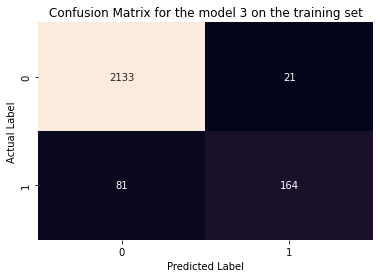

In [ ]:
print('Accuracy for the model 3 on the training set is:',' ',accuracy_score(y_train,y_class_pred_5))
print('\n')
print('Classification report for the model 3 on the training set is:','\n',classification_report(y_train,y_class_pred_5))
print('\n')
sns.heatmap(confusion_matrix(y_train,y_class_pred_5),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for the model 3 on the training set')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

Accuracy for the model 4 on the scaled training set is:   0.6627761567319717


Classification report for the model 4 on the scaled training set is: 
               precision    recall  f1-score   support

           0       1.00      0.63      0.77      2154
           1       0.23      0.98      0.37       245

    accuracy                           0.66      2399
   macro avg       0.61      0.80      0.57      2399
weighted avg       0.92      0.66      0.73      2399





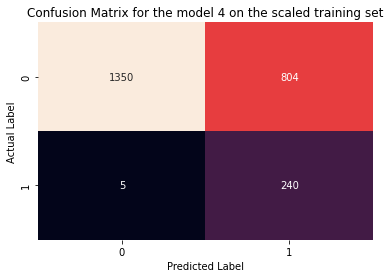

In [ ]:
print('Accuracy for the model 4 on the scaled training set is:',' ',accuracy_score(y_train_scaled,y_class_pred_6))
print('\n')
print('Classification report for the model 4 on the scaled training set is:','\n',classification_report(y_train_scaled,y_class_pred_6))
print('\n')
sns.heatmap(confusion_matrix(y_train_scaled,y_class_pred_6),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for the model 4 on the scaled training set')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

Area under the curve for Model 3 for the training set is 0.9669509029238437 



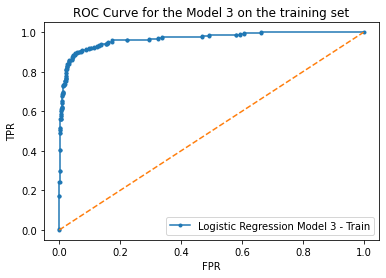

In [ ]:
print('Area under the curve for Model 3 for the training set is',roc_auc_score(y_train,ytrain_predict_model_3),'\n')

#plt.figure(figsize=(12,7))
fpr, tpr, thresholds = roc_curve(y_train,ytrain_predict_model_3)
plt.plot(fpr, tpr, marker='.')
plt.plot([0, 1], [0, 1], linestyle='--')

plt.title('ROC Curve for the Model 3 on the training set')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(['Logistic Regression Model 3 - Train'])
plt.show()

Area under the curve for Model 4 for the scaled training set is 0.948583555985068 



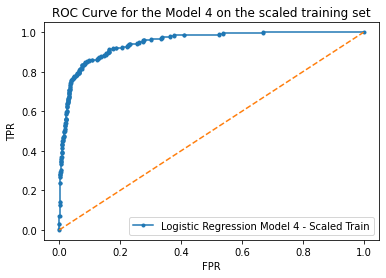

In [ ]:
print('Area under the curve for Model 4 for the scaled training set is',roc_auc_score(y_train_scaled,ytrain_predict_model_4),'\n')

#plt.figure(figsize=(12,7))
fpr, tpr, thresholds = roc_curve(y_train_scaled,ytrain_predict_model_4)
plt.plot(fpr, tpr, marker='.')
plt.plot([0, 1], [0, 1], linestyle='--')

plt.title('ROC Curve for the Model 4 on the scaled training set')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(['Logistic Regression Model 4 - Scaled Train'])
plt.show()

In [ ]:
y_class_pred_7=[]
for i in range(0,len(ytest_predict_model_3)):
    if np.array(ytest_predict_model_3)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred_7.append(a)

In [ ]:
y_class_pred_8=[]
for i in range(0,len(ytest_predict_model_4)):
    if np.array(ytest_predict_model_4)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred_8.append(a)

Accuracy for the model 3 on the testing set is:   0.961082910321489


Classification report for the model 3 on the testing set is: 
               precision    recall  f1-score   support

           0       0.96      0.99      0.98      1040
           1       0.93      0.73      0.82       142

    accuracy                           0.96      1182
   macro avg       0.95      0.86      0.90      1182
weighted avg       0.96      0.96      0.96      1182





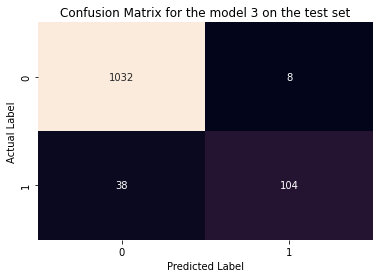

In [ ]:
print('Accuracy for the model 3 on the testing set is:',' ',accuracy_score(y_test,y_class_pred_7))
print('\n')
print('Classification report for the model 3 on the testing set is:','\n',classification_report(y_test,y_class_pred_7))
print('\n')
sns.heatmap(confusion_matrix(y_test,y_class_pred_7),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for the model 3 on the test set')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

Accuracy for the model 4 on the scaled testing set is:   0.6666666666666666


Classification report for the model 4 on the scaled testing set is: 
               precision    recall  f1-score   support

           0       1.00      0.62      0.77      1040
           1       0.26      0.99      0.42       142

    accuracy                           0.67      1182
   macro avg       0.63      0.80      0.59      1182
weighted avg       0.91      0.67      0.72      1182





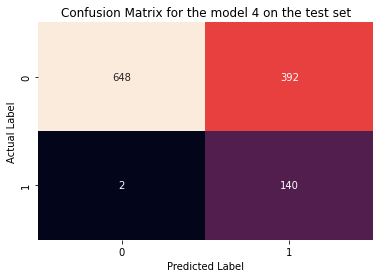

In [ ]:
print('Accuracy for the model 4 on the scaled testing set is:',' ',accuracy_score(y_test_scaled,y_class_pred_8))
print('\n')
print('Classification report for the model 4 on the scaled testing set is:','\n',classification_report(y_test_scaled,y_class_pred_8))
print('\n')
sns.heatmap(confusion_matrix(y_test_scaled,y_class_pred_8),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for the model 4 on the test set')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

Area under the curve for Model 3 for the testing set is 0.9757177681473457 



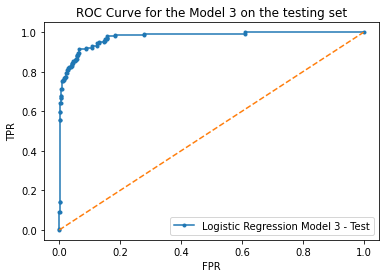

In [ ]:
print('Area under the curve for Model 3 for the testing set is',roc_auc_score(y_test,ytest_predict_model_3),'\n')

#plt.figure(figsize=(12,7))
fpr, tpr, thresholds = roc_curve(y_test,ytest_predict_model_3)
plt.plot(fpr, tpr, marker='.')
plt.plot([0, 1], [0, 1], linestyle='--')

plt.title('ROC Curve for the Model 3 on the testing set')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(['Logistic Regression Model 3 - Test'])
plt.show()

Area under the curve for Model 2 for the scaled testing set is 0.9481040086673889 



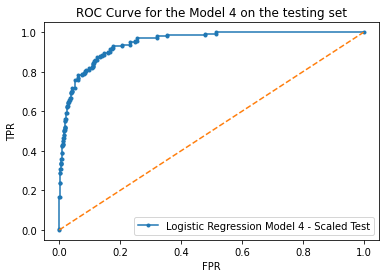

In [ ]:
print('Area under the curve for Model 2 for the scaled testing set is',roc_auc_score(y_test_scaled,ytest_predict_model_4),'\n')

#plt.figure(figsize=(12,7))
fpr, tpr, thresholds = roc_curve(y_test_scaled,ytest_predict_model_4)
plt.plot(fpr, tpr, marker='.')
plt.plot([0, 1], [0, 1], linestyle='--')

plt.title('ROC Curve for the Model 4 on the testing set')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(['Logistic Regression Model 4 - Scaled Test'])
plt.show()

In [ ]:
print('Precision Score for Model 1 - Train:', precision_score(y_train,y_class_pred_1))
print('Precision Score for Model 1 - Test:', precision_score(y_test,y_class_pred_3))
print('Precision Score for Model 2 - Train:', precision_score(y_train_scaled,y_class_pred_2))
print('Precision Score for Model 2 - Test:', precision_score(y_test_scaled,y_class_pred_4))
print('Precision Score for Model 3 - Train:', precision_score(y_train,y_class_pred_5))
print('Precision Score for Model 3 - Test:', precision_score(y_test,y_class_pred_7))
print('Precision Score for Model 4 - Train:', precision_score(y_train_scaled,y_class_pred_6))
print('Precision Score for Model 4 - Test:', precision_score(y_test_scaled,y_class_pred_8))

Precision Score for Model 1 - Train: 0.8578947368421053
Precision Score for Model 1 - Test: 0.9090909090909091
Precision Score for Model 2 - Train: 0.23323615160349853
Precision Score for Model 2 - Test: 0.26217228464419473
Precision Score for Model 3 - Train: 0.8864864864864865
Precision Score for Model 3 - Test: 0.9285714285714286
Precision Score for Model 4 - Train: 0.22988505747126436
Precision Score for Model 4 - Test: 0.2631578947368421


In [ ]:
print('Recall Score for Model 1 - Train:', recall_score(y_train,y_class_pred_1))
print('Recall Score for Model 1 - Test:', recall_score(y_test,y_class_pred_3))
print('Recall Score for Model 2 - Train:', recall_score(y_train_scaled,y_class_pred_2))
print('Recall Score for Model 2 - Test:', recall_score(y_test_scaled,y_class_pred_4))
print('Recall Score for Model 3 - Train:', recall_score(y_train,y_class_pred_5))
print('Recall Score for Model 3 - Test:', recall_score(y_test,y_class_pred_7))
print('Recall Score for Model 4 - Train:', recall_score(y_train_scaled,y_class_pred_6))
print('Recall Score for Model 4 - Test:', recall_score(y_test_scaled,y_class_pred_8))

Recall Score for Model 1 - Train: 0.6653061224489796
Recall Score for Model 1 - Test: 0.704225352112676
Recall Score for Model 2 - Train: 0.9795918367346939
Recall Score for Model 2 - Test: 0.9859154929577465
Recall Score for Model 3 - Train: 0.6693877551020408
Recall Score for Model 3 - Test: 0.7323943661971831
Recall Score for Model 4 - Train: 0.9795918367346939
Recall Score for Model 4 - Test: 0.9859154929577465


In [ ]:
print('F1 Score for Model 1 - Train:', f1_score(y_train,y_class_pred_1))
print('F1 Score for Model 1 - Test:', f1_score(y_test,y_class_pred_3))
print('F1 Score for Model 2 - Train:', f1_score(y_train_scaled,y_class_pred_2))
print('F1 Score for Model 2 - Test:', f1_score(y_test_scaled,y_class_pred_4))
print('F1 Score for Model 3 - Train:', f1_score(y_train,y_class_pred_5))
print('F1 Score for Model 3 - Test:', f1_score(y_test,y_class_pred_7))
print('F1 Score for Model 4 - Train:', f1_score(y_train_scaled,y_class_pred_6))
print('F1 Score for Model 4 - Test:', f1_score(y_test_scaled,y_class_pred_8))

F1 Score for Model 1 - Train: 0.7494252873563219
F1 Score for Model 1 - Test: 0.7936507936507936
F1 Score for Model 2 - Train: 0.3767660910518053
F1 Score for Model 2 - Test: 0.4142011834319526
F1 Score for Model 3 - Train: 0.7627906976744185
F1 Score for Model 3 - Test: 0.8188976377952756
F1 Score for Model 4 - Train: 0.3723816912335144
F1 Score for Model 4 - Test: 0.41543026706231456


In [ ]:
def model_func(model_name, model, x_train, x_test, Y_train, Y_test, cutoff):

  # Predict on both train and test set
  Y_train_predict = model.predict(x_train)
  Y_test_predict = model.predict(x_test)

  Y_class_pred_train=[]
  for i in range(0,len(Y_train_predict)):
    if np.array(Y_train_predict)[i]>cutoff:
        a=1
    else:
        a=0
    Y_class_pred_train.append(a)

  # Print classification report for the training data
  print('Classification report for the {} with cutoff {} on the training set is'.format(model_name, cutoff),'\n',classification_report(Y_train,Y_class_pred_train))

  # Display the confusion matrix for the train data
  sns.heatmap(confusion_matrix(Y_train,Y_class_pred_train),annot=True,fmt='d',cbar=False, cmap='plasma')
  plt.title('Confusion Matrix for the {} model with cutoff {} on the training set'.format(model_name, cutoff))
  plt.xlabel('Predicted Label')
  plt.ylabel('Actual Label')
  plt.show()

  # Display the ROC-AUC curve for the train data
  fpr_train, tpr_train, thresholds = roc_curve(Y_train,Y_train_predict)
  plt.plot(fpr_train, tpr_train, marker='.')
  plt.plot([0, 1], [0, 1], linestyle='--')

  plt.title('ROC Curve for the {} model with cutoff {} on the training set'.format(model_name, cutoff))
  plt.xlabel('FPR')
  plt.ylabel('TPR')
  plt.legend(['{}_train, {}_Cutoff'.format(model_name, cutoff)], loc='best')
  plt.show()

  print('\n')

  # Evaluate the performance metrics on the train set

  acc_train = accuracy_score(Y_train,Y_class_pred_train)
  roc_train = roc_auc_score(Y_train,Y_train_predict)
  precision_train = precision_score(Y_train,Y_class_pred_train)
  recall_train = recall_score(Y_train,Y_class_pred_train)
  f1_train = f1_score(Y_train,Y_class_pred_train)
  
  print('############################################Testing Set################################################', '\n')

  Y_class_pred_test=[]
  for i in range(0,len(Y_test_predict)):
    if np.array(Y_test_predict)[i]>cutoff:
        a=1
    else:
        a=0
    Y_class_pred_test.append(a)

  # Print classification report for the testing data
  print('Classification report for the {} model with cutoff {} on the testing set is'.format(model_name, cutoff),'\n',classification_report(Y_test,Y_class_pred_test))

  # Display the confusion matrix for the test data
  sns.heatmap(confusion_matrix(Y_test,Y_class_pred_test),annot=True,fmt='d',cbar=False, cmap='summer')
  plt.title('Confusion Matrix for the {} model with cutoff {} on the testing set'.format(model_name, cutoff))
  plt.xlabel('Predicted Label')
  plt.ylabel('Actual Label')
  plt.show()

  # Display the ROC-AUC curve for the test data
  fpr_test, tpr_test, thresholds = roc_curve(Y_test,Y_test_predict)
  plt.plot(fpr_test, tpr_test, marker='*')
  plt.plot([0, 1], [0, 1], linestyle='--')

  plt.title('ROC Curve for the {} model with {} cutoff on the testing set'.format(model_name, cutoff))
  plt.xlabel('FPR')
  plt.ylabel('TPR')
  plt.legend(['{}_test, {}_Cutoff'.format(model_name, cutoff)], loc='best')
  plt.show()

  print('\n')

  # Evaluate the performance metrics on the test set
  acc_test = accuracy_score(Y_test,Y_class_pred_test)
  roc_test = roc_auc_score(Y_test,Y_test_predict)
  precision_test = precision_score(Y_test,Y_class_pred_test)
  recall_test = recall_score(Y_test,Y_class_pred_test)
  f1_test = f1_score(Y_test,Y_class_pred_test)
  
  # Display the performance metrics in a dataframe
  index=['Accuracy', 'ROC-AUC', 'Precision', 'Recall', 'F1-Score']
  data = pd.DataFrame({'Train':[acc_train, roc_train, precision_train, recall_train, f1_train], 
                       'Test':[acc_test, roc_test, precision_test, recall_test, f1_test]},
                      index=index)
  round(data,3)
  print('The performance metrics for the {} model with {} cutoff'.format(model_name, cutoff))
  return data

Classification report for the Model_3 with cutoff 0.8 on the training set is 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      2154
           1       0.97      0.45      0.62       245

    accuracy                           0.94      2399
   macro avg       0.95      0.73      0.79      2399
weighted avg       0.94      0.94      0.93      2399



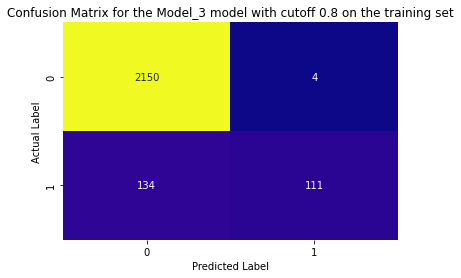

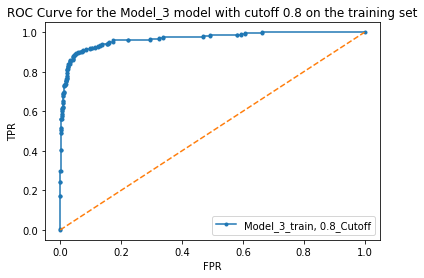



############################################Testing Set################################################ 

Classification report for the Model_3 model with cutoff 0.8 on the testing set is 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      1040
           1       0.97      0.51      0.67       142

    accuracy                           0.94      1182
   macro avg       0.96      0.76      0.82      1182
weighted avg       0.94      0.94      0.93      1182



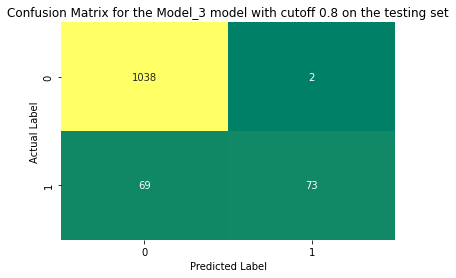

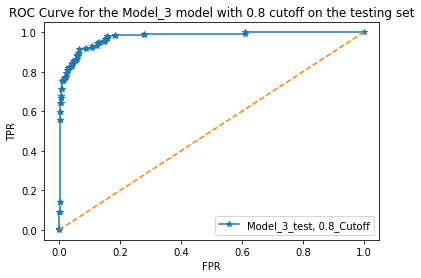



The performance metrics for the Model_3 model with 0.8 cutoff


Train      Test
Accuracy   0.942476  0.939932
ROC-AUC    0.966951  0.975718
Precision  0.965217  0.973333
Recall     0.453061  0.514085
F1-Score   0.616667  0.672811

In [ ]:
model_func('Model_3', model_3, X_train, X_test, y_train, y_test, 0.8)

Classification report for the Model_3 with cutoff 0.2 on the training set is 
               precision    recall  f1-score   support

           0       0.99      0.95      0.97      2154
           1       0.65      0.89      0.76       245

    accuracy                           0.94      2399
   macro avg       0.82      0.92      0.86      2399
weighted avg       0.95      0.94      0.94      2399



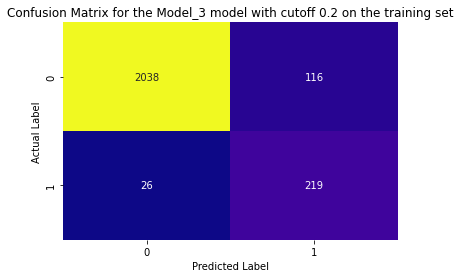

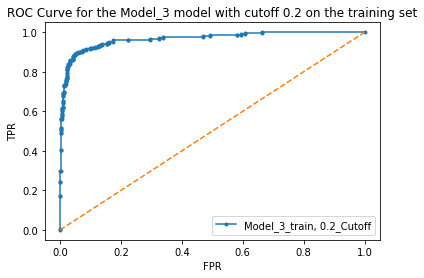



############################################Testing Set################################################ 

Classification report for the Model_3 model with cutoff 0.2 on the testing set is 
               precision    recall  f1-score   support

           0       0.98      0.94      0.96      1040
           1       0.65      0.89      0.76       142

    accuracy                           0.93      1182
   macro avg       0.82      0.91      0.86      1182
weighted avg       0.95      0.93      0.94      1182



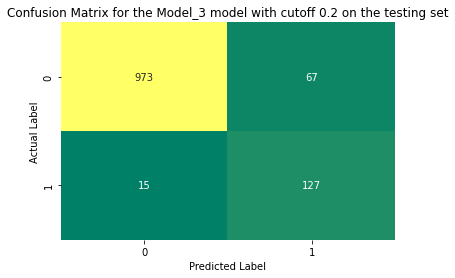

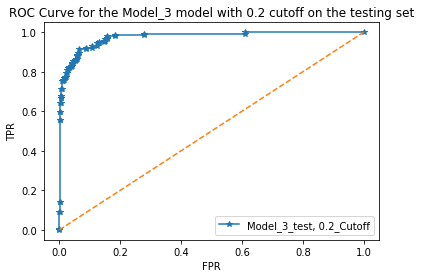



The performance metrics for the Model_3 model with 0.2 cutoff


Train      Test
Accuracy   0.940809  0.930626
ROC-AUC    0.966951  0.975718
Precision  0.653731  0.654639
Recall     0.893878  0.894366
F1-Score   0.755172  0.755952

In [ ]:
model_func('Model_3', model_3, X_train, X_test, y_train, y_test, 0.2)

Classification report for the Model_3 with cutoff 0.5 on the training set is 
               precision    recall  f1-score   support

           0       0.96      0.99      0.98      2154
           1       0.89      0.67      0.76       245

    accuracy                           0.96      2399
   macro avg       0.92      0.83      0.87      2399
weighted avg       0.96      0.96      0.95      2399



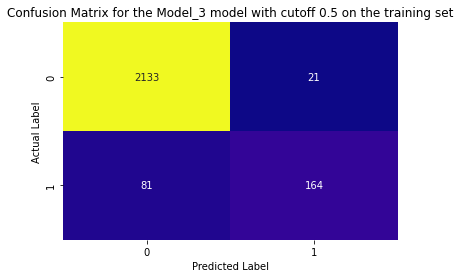

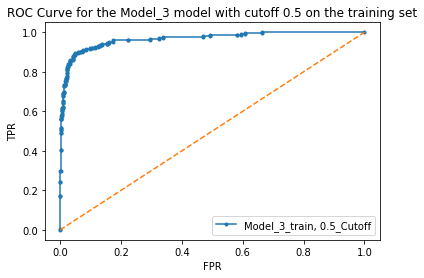



############################################Testing Set################################################ 

Classification report for the Model_3 model with cutoff 0.5 on the testing set is 
               precision    recall  f1-score   support

           0       0.96      0.99      0.98      1040
           1       0.93      0.73      0.82       142

    accuracy                           0.96      1182
   macro avg       0.95      0.86      0.90      1182
weighted avg       0.96      0.96      0.96      1182



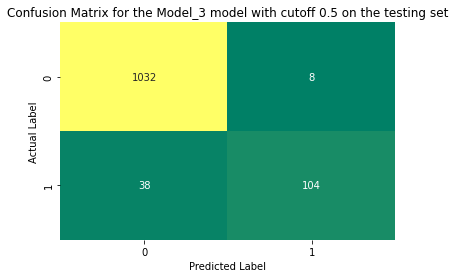

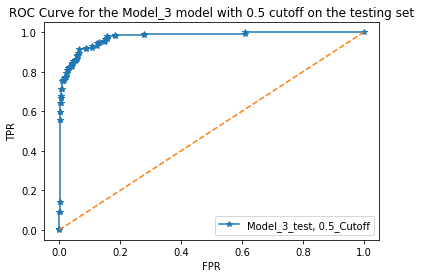



The performance metrics for the Model_3 model with 0.5 cutoff


Train      Test
Accuracy   0.957482  0.961083
ROC-AUC    0.966951  0.975718
Precision  0.886486  0.928571
Recall     0.669388  0.732394
F1-Score   0.762791  0.818898

In [ ]:
model_func('Model_3', model_3, X_train, X_test, y_train, y_test, 0.5)

Classification report for the Model_3 with cutoff 0.4 on the training set is 
               precision    recall  f1-score   support

           0       0.97      0.98      0.98      2154
           1       0.83      0.74      0.78       245

    accuracy                           0.96      2399
   macro avg       0.90      0.86      0.88      2399
weighted avg       0.96      0.96      0.96      2399



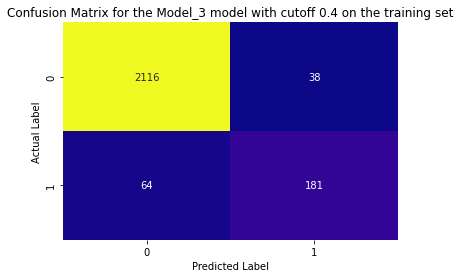

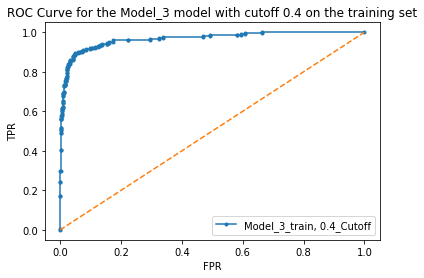



############################################Testing Set################################################ 

Classification report for the Model_3 model with cutoff 0.4 on the testing set is 
               precision    recall  f1-score   support

           0       0.97      0.98      0.98      1040
           1       0.85      0.77      0.81       142

    accuracy                           0.96      1182
   macro avg       0.91      0.88      0.89      1182
weighted avg       0.95      0.96      0.96      1182



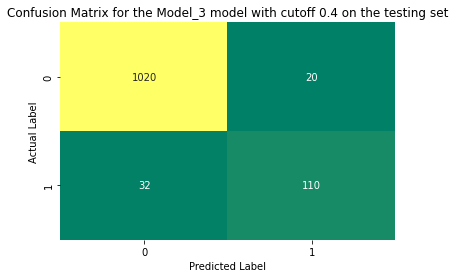

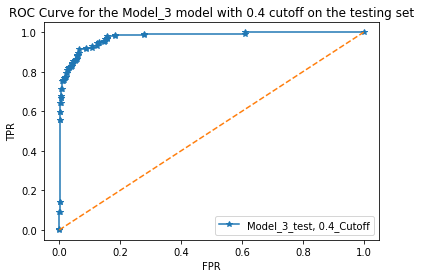



The performance metrics for the Model_3 model with 0.4 cutoff


Train      Test
Accuracy   0.957482  0.956007
ROC-AUC    0.966951  0.975718
Precision  0.826484  0.846154
Recall     0.738776  0.774648
F1-Score   0.780172  0.808824

In [ ]:
model_func('Model_3', model_3, X_train, X_test, y_train, y_test, 0.4)

Classification report for the Model_3 with cutoff 0.3 on the training set is 
               precision    recall  f1-score   support

           0       0.98      0.97      0.98      2154
           1       0.78      0.84      0.81       245

    accuracy                           0.96      2399
   macro avg       0.88      0.91      0.89      2399
weighted avg       0.96      0.96      0.96      2399



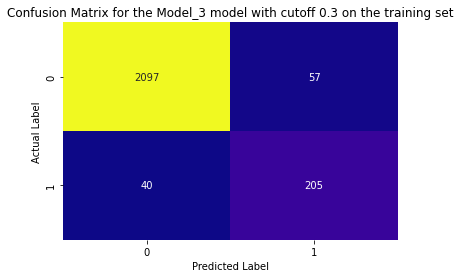

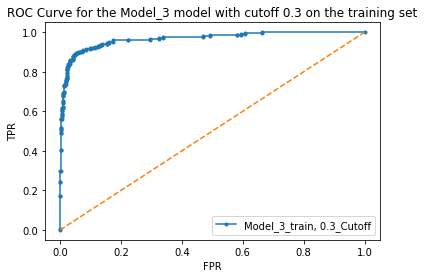



############################################Testing Set################################################ 

Classification report for the Model_3 model with cutoff 0.3 on the testing set is 
               precision    recall  f1-score   support

           0       0.98      0.96      0.97      1040
           1       0.74      0.83      0.78       142

    accuracy                           0.94      1182
   macro avg       0.86      0.90      0.87      1182
weighted avg       0.95      0.94      0.95      1182



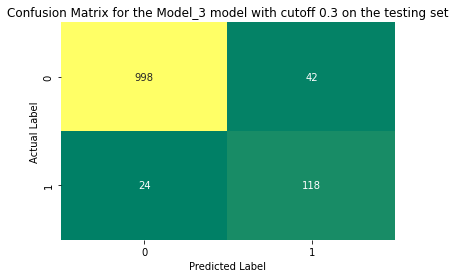

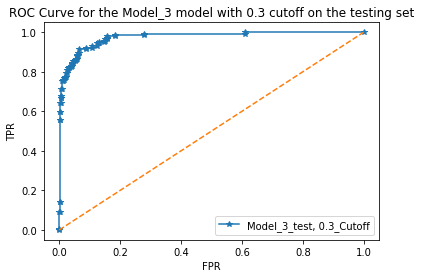



The performance metrics for the Model_3 model with 0.3 cutoff


Train      Test
Accuracy   0.959566  0.944162
ROC-AUC    0.966951  0.975718
Precision  0.782443  0.737500
Recall     0.836735  0.830986
F1-Score   0.808679  0.781457

In [ ]:
model_func('Model_3', model_3, X_train, X_test, y_train, y_test, 0.3)

Classification report for the Model_3 with cutoff 0.6 on the training set is 
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      2154
           1       0.91      0.61      0.73       245

    accuracy                           0.95      2399
   macro avg       0.93      0.80      0.85      2399
weighted avg       0.95      0.95      0.95      2399



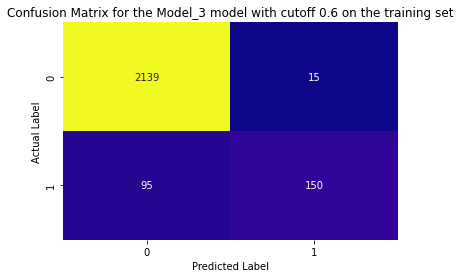

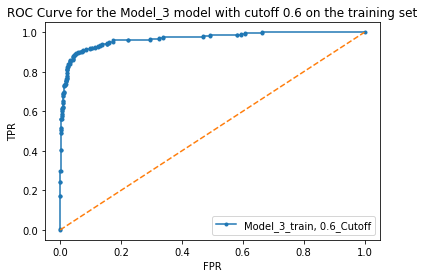



############################################Testing Set################################################ 

Classification report for the Model_3 model with cutoff 0.6 on the testing set is 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      1040
           1       0.96      0.61      0.75       142

    accuracy                           0.95      1182
   macro avg       0.95      0.80      0.86      1182
weighted avg       0.95      0.95      0.95      1182



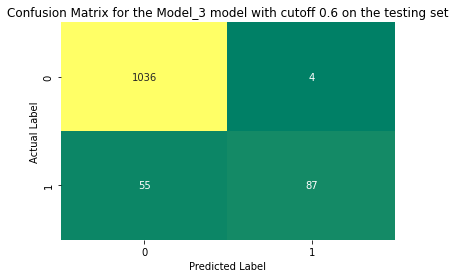

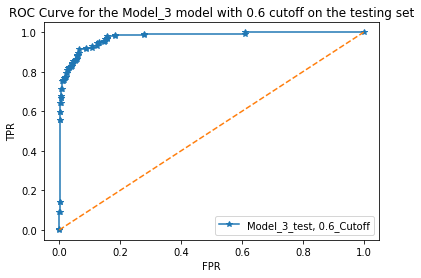



The performance metrics for the Model_3 model with 0.6 cutoff


Train      Test
Accuracy   0.954148  0.950085
ROC-AUC    0.966951  0.975718
Precision  0.909091  0.956044
Recall     0.612245  0.612676
F1-Score   0.731707  0.746781

In [ ]:
model_func('Model_3', model_3, X_train, X_test, y_train, y_test, 0.6)

Classification report for the Model_3 with cutoff 0.7 on the training set is 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      2154
           1       0.95      0.53      0.68       245

    accuracy                           0.95      2399
   macro avg       0.95      0.77      0.83      2399
weighted avg       0.95      0.95      0.94      2399



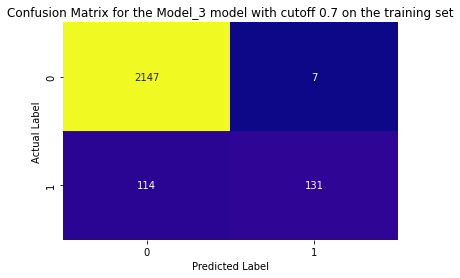

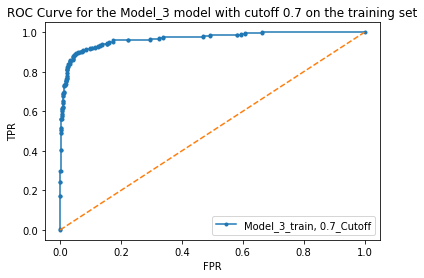



############################################Testing Set################################################ 

Classification report for the Model_3 model with cutoff 0.7 on the testing set is 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      1040
           1       0.98      0.56      0.71       142

    accuracy                           0.95      1182
   macro avg       0.96      0.78      0.84      1182
weighted avg       0.95      0.95      0.94      1182



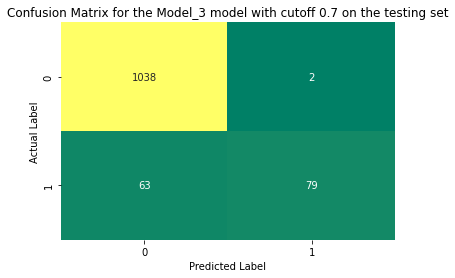

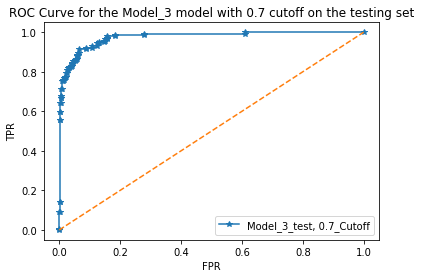



The performance metrics for the Model_3 model with 0.7 cutoff


Train      Test
Accuracy   0.949562  0.945008
ROC-AUC    0.966951  0.975718
Precision  0.949275  0.975309
Recall     0.534694  0.556338
F1-Score   0.684073  0.708520

In [ ]:
model_func('Model_3', model_3, X_train, X_test, y_train, y_test, 0.7)

In [ ]:
cut_off_list= np.arange(0.1, 1, 0.1, dtype=float)
cut_off_list

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

Classification report for the Model_3 with cutoff 0.1 on the training set is 
               precision    recall  f1-score   support

           0       0.99      0.90      0.94      2154
           1       0.50      0.92      0.65       245

    accuracy                           0.90      2399
   macro avg       0.75      0.91      0.80      2399
weighted avg       0.94      0.90      0.91      2399



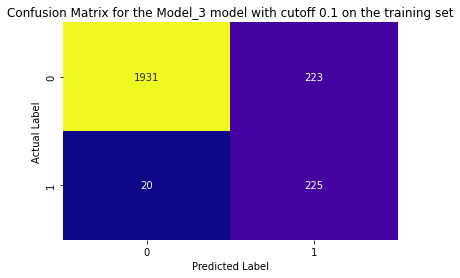

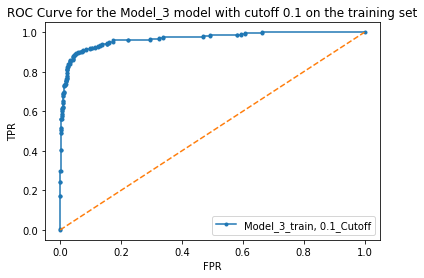



############################################Testing Set################################################ 

Classification report for the Model_3 model with cutoff 0.1 on the testing set is 
               precision    recall  f1-score   support

           0       0.99      0.88      0.93      1040
           1       0.52      0.93      0.66       142

    accuracy                           0.89      1182
   macro avg       0.75      0.91      0.80      1182
weighted avg       0.93      0.89      0.90      1182



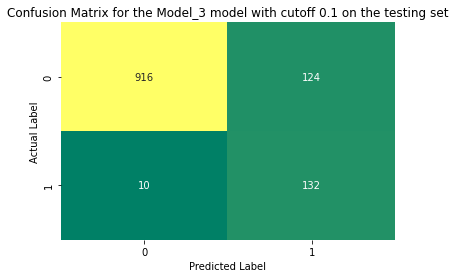

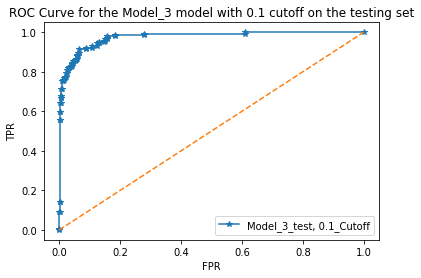



The performance metrics for the Model_3 model with 0.1 cutoff
Classification report for the Model_3 with cutoff 0.2 on the training set is 
               precision    recall  f1-score   support

           0       0.99      0.95      0.97      2154
           1       0.65      0.89      0.76       245

    accuracy                           0.94      2399
   macro avg       0.82      0.92      0.86      2399
weighted avg       0.95      0.94      0.94      2399



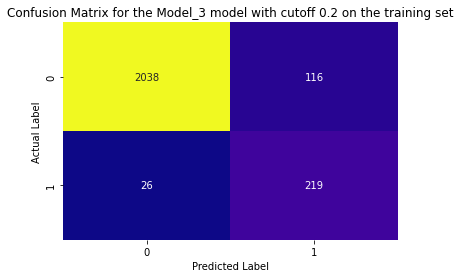

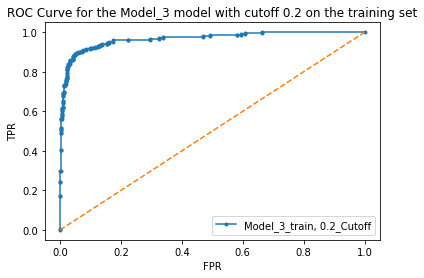



############################################Testing Set################################################ 

Classification report for the Model_3 model with cutoff 0.2 on the testing set is 
               precision    recall  f1-score   support

           0       0.98      0.94      0.96      1040
           1       0.65      0.89      0.76       142

    accuracy                           0.93      1182
   macro avg       0.82      0.91      0.86      1182
weighted avg       0.95      0.93      0.94      1182



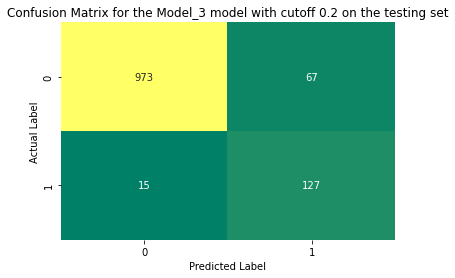

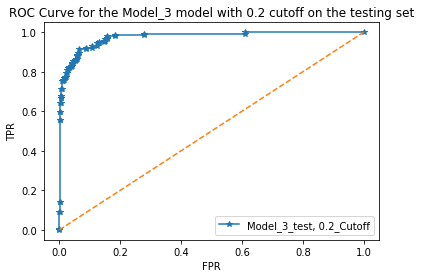



The performance metrics for the Model_3 model with 0.2 cutoff
Classification report for the Model_3 with cutoff 0.30000000000000004 on the training set is 
               precision    recall  f1-score   support

           0       0.98      0.97      0.98      2154
           1       0.78      0.84      0.81       245

    accuracy                           0.96      2399
   macro avg       0.88      0.91      0.89      2399
weighted avg       0.96      0.96      0.96      2399



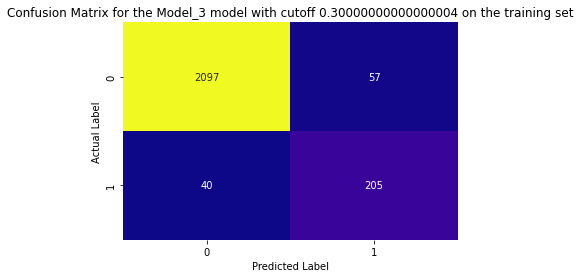

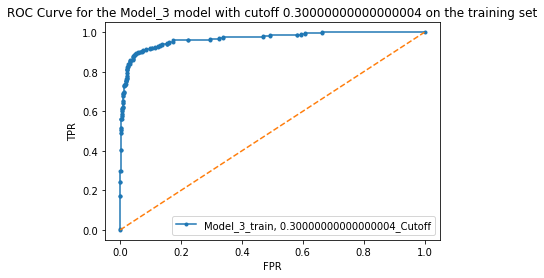



############################################Testing Set################################################ 

Classification report for the Model_3 model with cutoff 0.30000000000000004 on the testing set is 
               precision    recall  f1-score   support

           0       0.98      0.96      0.97      1040
           1       0.74      0.83      0.78       142

    accuracy                           0.94      1182
   macro avg       0.86      0.90      0.87      1182
weighted avg       0.95      0.94      0.95      1182



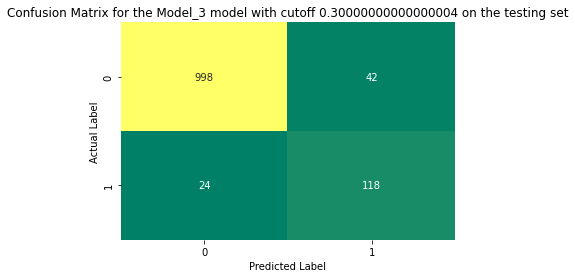

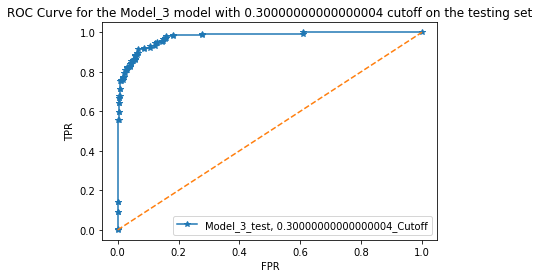



The performance metrics for the Model_3 model with 0.30000000000000004 cutoff
Classification report for the Model_3 with cutoff 0.4 on the training set is 
               precision    recall  f1-score   support

           0       0.97      0.98      0.98      2154
           1       0.83      0.74      0.78       245

    accuracy                           0.96      2399
   macro avg       0.90      0.86      0.88      2399
weighted avg       0.96      0.96      0.96      2399



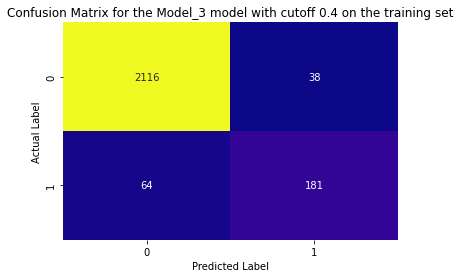

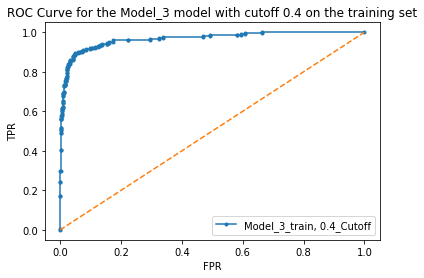



############################################Testing Set################################################ 

Classification report for the Model_3 model with cutoff 0.4 on the testing set is 
               precision    recall  f1-score   support

           0       0.97      0.98      0.98      1040
           1       0.85      0.77      0.81       142

    accuracy                           0.96      1182
   macro avg       0.91      0.88      0.89      1182
weighted avg       0.95      0.96      0.96      1182



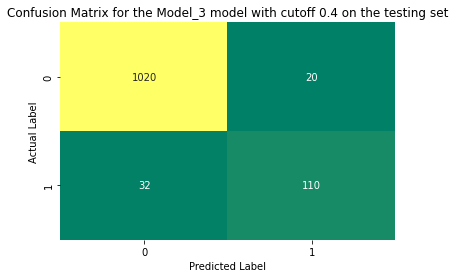

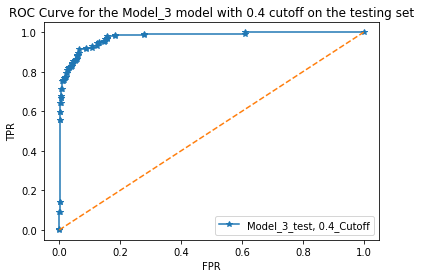



The performance metrics for the Model_3 model with 0.4 cutoff
Classification report for the Model_3 with cutoff 0.5 on the training set is 
               precision    recall  f1-score   support

           0       0.96      0.99      0.98      2154
           1       0.89      0.67      0.76       245

    accuracy                           0.96      2399
   macro avg       0.92      0.83      0.87      2399
weighted avg       0.96      0.96      0.95      2399



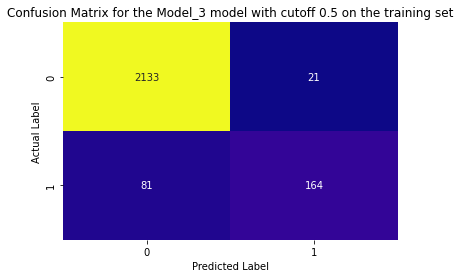

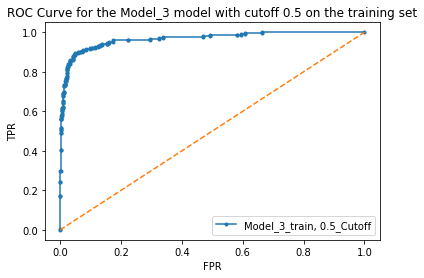



############################################Testing Set################################################ 

Classification report for the Model_3 model with cutoff 0.5 on the testing set is 
               precision    recall  f1-score   support

           0       0.96      0.99      0.98      1040
           1       0.93      0.73      0.82       142

    accuracy                           0.96      1182
   macro avg       0.95      0.86      0.90      1182
weighted avg       0.96      0.96      0.96      1182



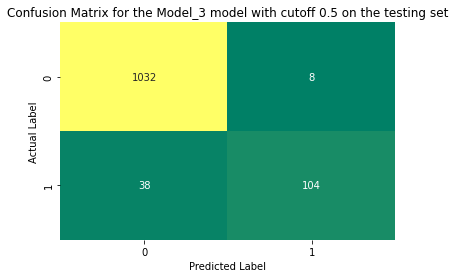

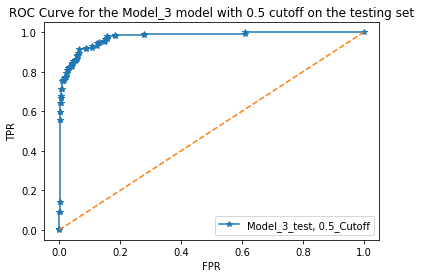



The performance metrics for the Model_3 model with 0.5 cutoff
Classification report for the Model_3 with cutoff 0.6 on the training set is 
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      2154
           1       0.91      0.61      0.73       245

    accuracy                           0.95      2399
   macro avg       0.93      0.80      0.85      2399
weighted avg       0.95      0.95      0.95      2399



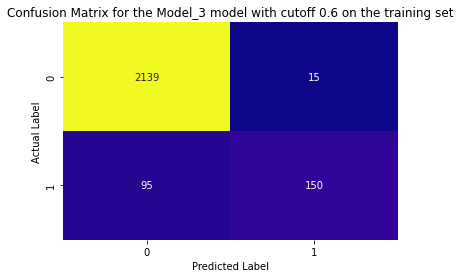

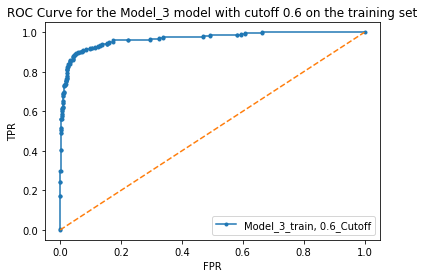



############################################Testing Set################################################ 

Classification report for the Model_3 model with cutoff 0.6 on the testing set is 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      1040
           1       0.96      0.61      0.75       142

    accuracy                           0.95      1182
   macro avg       0.95      0.80      0.86      1182
weighted avg       0.95      0.95      0.95      1182



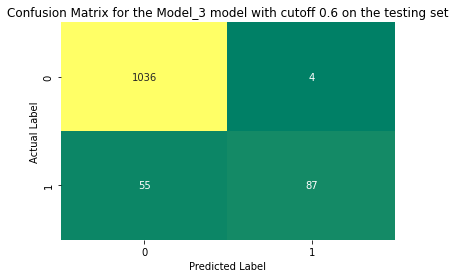

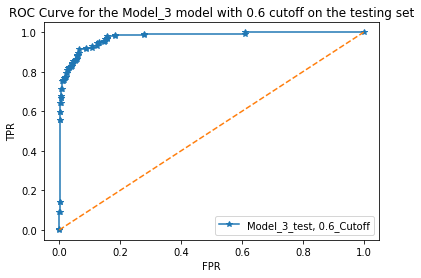



The performance metrics for the Model_3 model with 0.6 cutoff
Classification report for the Model_3 with cutoff 0.7000000000000001 on the training set is 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      2154
           1       0.95      0.53      0.68       245

    accuracy                           0.95      2399
   macro avg       0.95      0.77      0.83      2399
weighted avg       0.95      0.95      0.94      2399



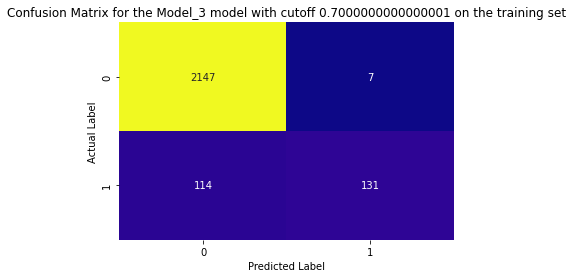

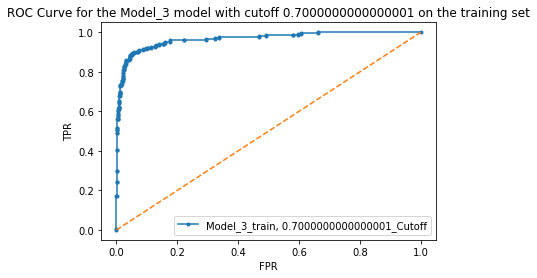



############################################Testing Set################################################ 

Classification report for the Model_3 model with cutoff 0.7000000000000001 on the testing set is 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      1040
           1       0.98      0.56      0.71       142

    accuracy                           0.95      1182
   macro avg       0.96      0.78      0.84      1182
weighted avg       0.95      0.95      0.94      1182



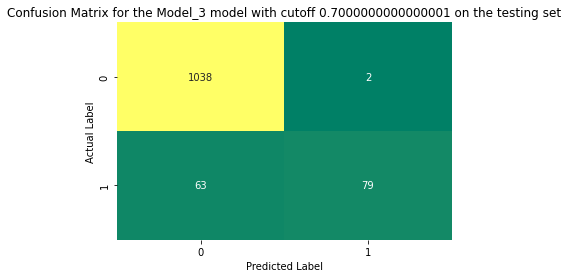

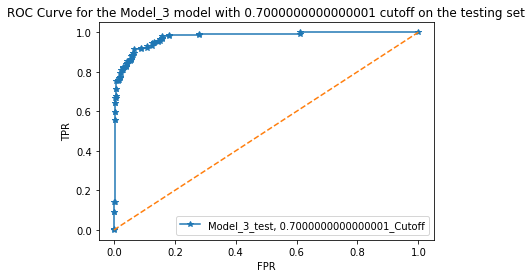



The performance metrics for the Model_3 model with 0.7000000000000001 cutoff
Classification report for the Model_3 with cutoff 0.8 on the training set is 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      2154
           1       0.97      0.45      0.62       245

    accuracy                           0.94      2399
   macro avg       0.95      0.73      0.79      2399
weighted avg       0.94      0.94      0.93      2399



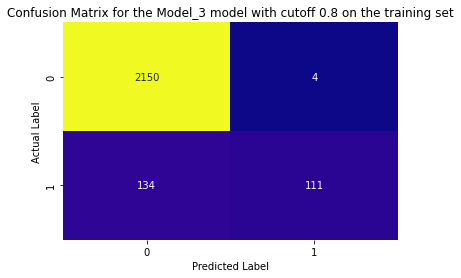

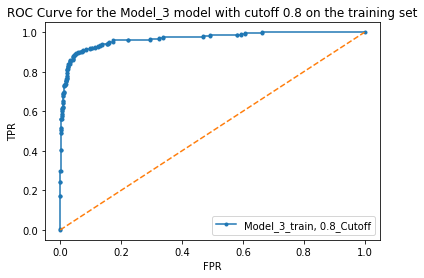



############################################Testing Set################################################ 

Classification report for the Model_3 model with cutoff 0.8 on the testing set is 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      1040
           1       0.97      0.51      0.67       142

    accuracy                           0.94      1182
   macro avg       0.96      0.76      0.82      1182
weighted avg       0.94      0.94      0.93      1182



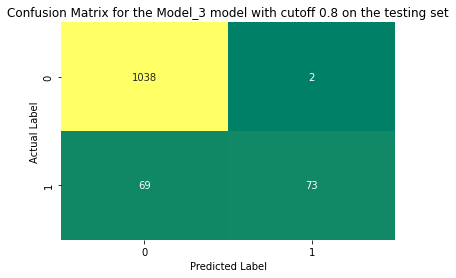

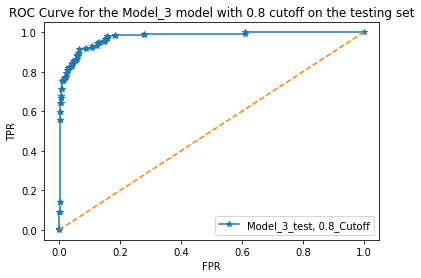



The performance metrics for the Model_3 model with 0.8 cutoff
Classification report for the Model_3 with cutoff 0.9 on the training set is 
               precision    recall  f1-score   support

           0       0.93      1.00      0.97      2154
           1       0.97      0.39      0.55       245

    accuracy                           0.94      2399
   macro avg       0.95      0.69      0.76      2399
weighted avg       0.94      0.94      0.92      2399



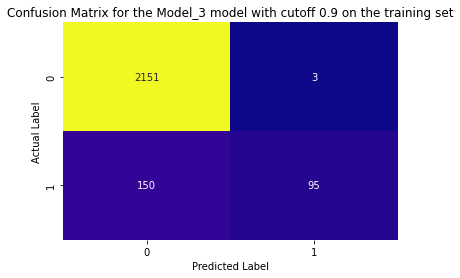

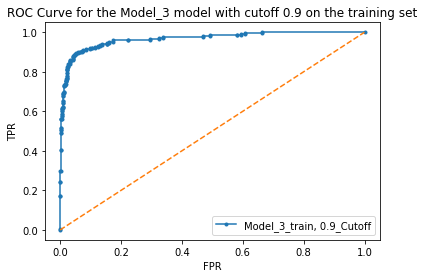



############################################Testing Set################################################ 

Classification report for the Model_3 model with cutoff 0.9 on the testing set is 
               precision    recall  f1-score   support

           0       0.93      1.00      0.96      1040
           1       0.97      0.41      0.57       142

    accuracy                           0.93      1182
   macro avg       0.95      0.70      0.77      1182
weighted avg       0.93      0.93      0.91      1182



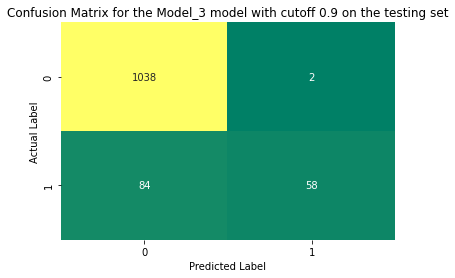

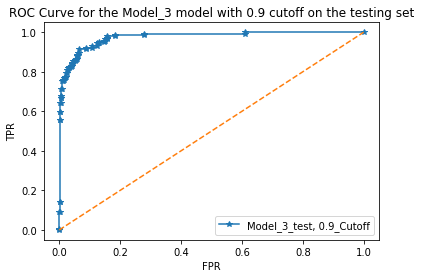



The performance metrics for the Model_3 model with 0.9 cutoff


In [ ]:
for i, val in enumerate(cut_off_list):
  model_func('Model_3', model_3, X_train, X_test, y_train, y_test, val)

In [75]:
# Instantiate the models

# Instantiate the LDA model
clfLDA = LinearDiscriminantAnalysis()

# Instantiate the Gaussian Classifier for the Ensemble Random Forest Classifier Model
clfRF=RandomForestClassifier(n_estimators=100, random_state=1)

In [77]:
model_names = {clfLDA:'Linear Discriminant Analysis', clfRF:'Ensemble Random Forest'}

In [90]:
# Custom Function after grid search

def grid_model_func(model, param_grid, x_train, x_test, Y_train, Y_test, data):

  if param_grid!=None:    
        grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = 3,n_jobs=4)
        gs=grid_search.fit(X_train,y_train)
        print("--------------------Best Parameters--------------------")
        print(gs.best_params_)
        best_grid_estimator=gs.best_estimator_
        print()
        print()
        print("--------------------Best Model Params--------------------")
        print(best_grid_estimator)
        print()
        print()
        Y_train_predict = best_grid_estimator.predict(X_train)
        Y_test_predict = best_grid_estimator.predict(X_test)
  elif param_grid == None:
        best_grid_estimator=model
        best_grid_estimator.fit(X_train,y_train)
        Y_train_predict = best_grid_estimator.predict(X_train)
        Y_test_predict = best_grid_estimator.predict(X_test)
        print("--------------------Best Model Params--------------------")
        print(best_grid_estimator.get_params())

  # Evaluate the performance metrics on the train set

  acc_train = accuracy_score(Y_train,Y_train_predict)
  roc_train = roc_auc_score(Y_train,best_grid_estimator.predict_proba(x_train)[:,1])
  precision_train = precision_score(Y_train,Y_train_predict)
  recall_train = recall_score(Y_train,Y_train_predict)
  f1_train = f1_score(Y_train,Y_train_predict)
  train_scores = cross_val_score(best_grid_estimator, x_train, Y_train, cv=10)
  mean_cv_score_train = np.mean(train_scores)
  
  # Evaluate the performance metrics on the test set

  acc_test = accuracy_score(Y_test,Y_test_predict)
  roc_test = roc_auc_score(Y_test,best_grid_estimator.predict_proba(x_test)[:,1])
  precision_test = precision_score(Y_test,Y_test_predict)
  recall_test = recall_score(Y_test,Y_test_predict)
  f1_test = f1_score(Y_test,Y_test_predict)
  test_scores = cross_val_score(best_grid_estimator, x_test, Y_test, cv=10)
  mean_cv_score_test = np.mean(test_scores)
  
  # Display the performance metrics in a dataframe
  if (param_grid==None and data == 'Unscaled' or data == 'unscaled'):
    # Print classification report for the training data
    print('Classification report for the {} model on the Unscaled training set is'.format(model_names[model]),'\n',classification_report(Y_train,Y_train_predict))

    # Display the confusion matrix for the train data
    sns.heatmap(confusion_matrix(Y_train,Y_train_predict),annot=True,fmt='d',cbar=False, cmap='plasma')
    plt.title('Confusion Matrix for the {} model on the Unscaled training set'.format(model_names[model]))
    plt.xlabel('Predicted Label')
    plt.ylabel('Actual Label')
    plt.show()

    # Display the ROC-AUC curve for the train data
    fpr_train, tpr_train, thresholds = roc_curve(Y_train,best_grid_estimator.predict_proba(x_train)[:,1])
    plt.plot(fpr_train, tpr_train, marker='.')
    plt.plot([0, 1], [0, 1], linestyle='--')

    plt.title('ROC Curve for the {} model on the Unscaled training set'.format(model_names[model]))
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.legend(['{}_Unscaled_train'.format(model_names[model])], loc='best')
    plt.show()

    print('\n')

    print('############################################Testing Set################################################', '\n')

    # Print classification report for the testing data
    print('Classification report for the {} model on the Unscaled testing set is'.format(model_names[model]),'\n',classification_report(Y_test,Y_test_predict))

    # Display the confusion matrix for the test data
    sns.heatmap(confusion_matrix(Y_test,Y_test_predict),annot=True,fmt='d',cbar=False, cmap='summer')
    plt.title('Confusion Matrix for the {} model on the unscaled testing set'.format(model_names[model]))
    plt.xlabel('Predicted Label')
    plt.ylabel('Actual Label')
    plt.show()

    # Display the ROC-AUC curve for the test data
    fpr_test, tpr_test, thresholds = roc_curve(Y_test,best_grid_estimator.predict_proba(x_test)[:,1])
    plt.plot(fpr_test, tpr_test, marker='*')
    plt.plot([0, 1], [0, 1], linestyle='--')

    plt.title('ROC Curve for the {} model on the Unscaled testing set'.format(model_names[model]))
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.legend(['{}_Unscaled_test'.format(model_names[model])], loc='best')
    plt.show()

    print('\n')

    index=['Accuracy', 'ROC-AUC', 'Precision', 'Recall', 'F1-Score', 'Mean_CV_Score']
    data = pd.DataFrame({'{}_Unscaled_Train'.format(model_names[model]):[acc_train, roc_train, precision_train, recall_train, f1_train, mean_cv_score_train], 
                       '{}_Unscaled_Test'.format(model_names[model]):[acc_test, roc_test, precision_test, recall_test, f1_test, mean_cv_score_test]},
                      index=index)
    round(data,3)
  elif (param_grid == None and data == 'Scaled' or data == 'scaled'):
    # Print classification report for the training data
    print('Classification report for the {} model on the Scaled training set is'.format(model_names[model]),'\n',classification_report(Y_train,Y_train_predict))

    # Display the confusion matrix for the train data
    sns.heatmap(confusion_matrix(Y_train,Y_train_predict),annot=True,fmt='d',cbar=False, cmap='plasma')
    plt.title('Confusion Matrix for the {} model on the Scaled training set'.format(model_names[model]))
    plt.xlabel('Predicted Label')
    plt.ylabel('Actual Label')
    plt.show()

    # Display the ROC-AUC curve for the train data
    fpr_train, tpr_train, thresholds = roc_curve(Y_train,best_grid_estimator.predict_proba(x_train)[:,1])
    plt.plot(fpr_train, tpr_train, marker='.')
    plt.plot([0, 1], [0, 1], linestyle='--')

    plt.title('ROC Curve for the {} model on the Scaled training set'.format(model_names[model]))
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.legend(['{}_Scaled_train'.format(model_names[model])], loc='best')
    plt.show()

    print('\n')

    print('############################################Testing Set################################################', '\n')

    # Print classification report for the testing data
    print('Classification report for the {} model on the Scaled testing set is'.format(model_names[model]),'\n',classification_report(Y_test,Y_test_predict))

    # Display the confusion matrix for the test data
    sns.heatmap(confusion_matrix(Y_test,Y_test_predict),annot=True,fmt='d',cbar=False, cmap='summer')
    plt.title('Confusion Matrix for the {} model on the Scaled testing set'.format(model_names[model]))
    plt.xlabel('Predicted Label')
    plt.ylabel('Actual Label')
    plt.show()

    # Display the ROC-AUC curve for the test data
    fpr_test, tpr_test, thresholds = roc_curve(Y_test,best_grid_estimator.predict_proba(x_test)[:,1])
    plt.plot(fpr_test, tpr_test, marker='*')
    plt.plot([0, 1], [0, 1], linestyle='--')

    plt.title('ROC Curve for the {} model on the Scaled testing set'.format(model_names[model]))
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.legend(['{}_Scaled_test'.format(model_names[model])], loc='best')
    plt.show()

    print('\n')

    index=['Accuracy', 'ROC-AUC', 'Precision', 'Recall', 'F1-Score', 'Mean_CV_Score']
    data = pd.DataFrame({'{}_Scaled_Train'.format(model_names[model]):[acc_train, roc_train, precision_train, recall_train, f1_train, mean_cv_score_train], 
                       '{}_Scaled_Test'.format(model_names[model]):[acc_test, roc_test, precision_test, recall_test, f1_test, mean_cv_score_test]},
                      index=index)
    round(data,3)
  elif (param_grid == None and data == 'SMOTE' or data == 'smote'):
    # Print classification report for the training data
    print('Classification report for the {} model on the SMOTE training set is'.format(model_names[model]),'\n',classification_report(Y_train,Y_train_predict))

    # Display the confusion matrix for the train data
    sns.heatmap(confusion_matrix(Y_train,Y_train_predict),annot=True,fmt='d',cbar=False, cmap='plasma')
    plt.title('Confusion Matrix for the {} model on the SMOTE training set'.format(model_names[model]))
    plt.xlabel('Predicted Label')
    plt.ylabel('Actual Label')
    plt.show()

    # Display the ROC-AUC curve for the train data
    fpr_train, tpr_train, thresholds = roc_curve(Y_train,best_grid_estimator.predict_proba(x_train)[:,1])
    plt.plot(fpr_train, tpr_train, marker='.')
    plt.plot([0, 1], [0, 1], linestyle='--')

    plt.title('ROC Curve for the {} model on the SMOTE training set'.format(model_names[model]))
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.legend(['{}_SMOTE_train'.format(model_names[model])], loc='best')
    plt.show()

    print('\n')

    print('############################################Testing Set################################################', '\n')

    # Print classification report for the testing data
    print('Classification report for the {} model on the SMOTE testing set is'.format(model_names[model]),'\n',classification_report(Y_test,Y_test_predict))

    # Display the confusion matrix for the test data
    sns.heatmap(confusion_matrix(Y_test,Y_test_predict),annot=True,fmt='d',cbar=False, cmap='summer')
    plt.title('Confusion Matrix for the {} model on the SMOTE testing set'.format(model_names[model]))
    plt.xlabel('Predicted Label')
    plt.ylabel('Actual Label')
    plt.show()

    # Display the ROC-AUC curve for the test data
    fpr_test, tpr_test, thresholds = roc_curve(Y_test,best_grid_estimator.predict_proba(x_test)[:,1])
    plt.plot(fpr_test, tpr_test, marker='*')
    plt.plot([0, 1], [0, 1], linestyle='--')

    plt.title('ROC Curve for the {} model on the Scaled testing set'.format(model_names[model]))
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.legend(['{}_SMOTE_test'.format(model_names[model])], loc='best')
    plt.show()

    print('\n')
    index=['Accuracy', 'ROC-AUC', 'Precision', 'Recall', 'F1-Score', 'Mean_CV_Score']
    data = pd.DataFrame({'{}_SMOTE_Train'.format(model_names[model]):[acc_train, roc_train, precision_train, recall_train, f1_train, mean_cv_score_train], 
                       '{}_SMOTE_Test'.format(model_names[model]):[acc_test, roc_test, precision_test, recall_test, f1_test, mean_cv_score_test]},
                      index=index)
    round(data,3)
  elif (data == 'Scaled' or data == 'scaled'):
    # Print classification report for the training data
    print('Classification report for the {} model after grid search on the Scaled training set is'.format(model_names[model]),'\n',classification_report(Y_train,Y_train_predict))

    # Display the confusion matrix for the train data
    sns.heatmap(confusion_matrix(Y_train,Y_train_predict),annot=True,fmt='d',cbar=False, cmap='plasma')
    plt.title('Confusion Matrix for the {} model after grid search on the Scaled training set'.format(model_names[model]))
    plt.xlabel('Predicted Label')
    plt.ylabel('Actual Label')
    plt.show()

    # Display the ROC-AUC curve for the train data
    fpr_train, tpr_train, thresholds = roc_curve(Y_train,best_grid_estimator.predict_proba(x_train)[:,1])
    plt.plot(fpr_train, tpr_train, marker='.')
    plt.plot([0, 1], [0, 1], linestyle='--')

    plt.title('ROC Curve for the {} model after grid search on the Scaled training set'.format(model_names[model]))
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.legend(['{}_Scaled_train_GS'.format(model_names[model])], loc='best')
    plt.show()

    print('\n')

    print('############################################Testing Set################################################', '\n')

    # Print classification report for the testing data
    print('Classification report for the {} model after grid search on the Scaled testing set is'.format(model_names[model]),'\n',classification_report(Y_test,Y_test_predict))

    # Display the confusion matrix for the test data
    sns.heatmap(confusion_matrix(Y_test,Y_test_predict),annot=True,fmt='d',cbar=False, cmap='summer')
    plt.title('Confusion Matrix for the {} model after grid search on the Scaled testing set'.format(model_names[model]))
    plt.xlabel('Predicted Label')
    plt.ylabel('Actual Label')
    plt.show()

    # Display the ROC-AUC curve for the test data
    fpr_test, tpr_test, thresholds = roc_curve(Y_test,best_grid_estimator.predict_proba(x_test)[:,1])
    plt.plot(fpr_test, tpr_test, marker='*')
    plt.plot([0, 1], [0, 1], linestyle='--')

    plt.title('ROC Curve for the {} model after grid search on the Scaled testing set'.format(model_names[model]))
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.legend(['{}_Scaled_test_GS'.format(model_names[model])], loc='best')
    plt.show()

    print('\n')

    index=['Accuracy', 'ROC-AUC', 'Precision', 'Recall', 'F1-Score', 'Mean_CV_Score']
    data = pd.DataFrame({'{}_Scaled_Train_GS'.format(model_names[model]):[acc_train, roc_train, precision_train, recall_train, f1_train, mean_cv_score_train], 
                       '{}_Scaled_Test_GS'.format(model_names[model]):[acc_test, roc_test, precision_test, recall_test, f1_test, mean_cv_score_test]},
                      index=index)
    round(data,3)
  
  elif (data == 'SMOTE' or data == 'smote'):
    # Print classification report for the training data
    print('Classification report for the {} model after grid search on the SMOTE training set is'.format(model_names[model]),'\n',classification_report(Y_train,Y_train_predict))

    # Display the confusion matrix for the train data
    sns.heatmap(confusion_matrix(Y_train,Y_train_predict),annot=True,fmt='d',cbar=False, cmap='plasma')
    plt.title('Confusion Matrix for the {} model after grid search on the SMOTE training set'.format(model_names[model]))
    plt.xlabel('Predicted Label')
    plt.ylabel('Actual Label')
    plt.show()

    # Display the ROC-AUC curve for the train data
    fpr_train, tpr_train, thresholds = roc_curve(Y_train,best_grid_estimator.predict_proba(x_train)[:,1])
    plt.plot(fpr_train, tpr_train, marker='.')
    plt.plot([0, 1], [0, 1], linestyle='--')

    plt.title('ROC Curve for the {} model after grid search on the SMOTE training set'.format(model_names[model]))
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.legend(['{}_SMOTE_train_GS'.format(model_names[model])], loc='best')
    plt.show()

    print('\n')

    print('############################################Testing Set################################################', '\n')

    # Print classification report for the testing data
    print('Classification report for the {} model after grid search on the SMOTE testing set is'.format(model_names[model]),'\n',classification_report(Y_test,Y_test_predict))

    # Display the confusion matrix for the test data
    sns.heatmap(confusion_matrix(Y_test,Y_test_predict),annot=True,fmt='d',cbar=False, cmap='summer')
    plt.title('Confusion Matrix for the {} model after grid search on the SMOTE testing set'.format(model_names[model]))
    plt.xlabel('Predicted Label')
    plt.ylabel('Actual Label')
    plt.show()

    # Display the ROC-AUC curve for the test data
    fpr_test, tpr_test, thresholds = roc_curve(Y_test,best_grid_estimator.predict_proba(x_test)[:,1])
    plt.plot(fpr_test, tpr_test, marker='*')
    plt.plot([0, 1], [0, 1], linestyle='--')

    plt.title('ROC Curve for the {} model after grid search on the Scaled testing set'.format(model_names[model]))
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.legend(['{}_SMOTE_test_GS'.format(model_names[model])], loc='best')
    plt.show()

    print('\n')
    index=['Accuracy', 'ROC-AUC', 'Precision', 'Recall', 'F1-Score', 'Mean_CV_Score']
    data = pd.DataFrame({'{}_SMOTE_Train_GS'.format(model_names[model]):[acc_train, roc_train, precision_train, recall_train, f1_train, mean_cv_score_train], 
                       '{}_SMOTE_Test_GS'.format(model_names[model]):[acc_test, roc_test, precision_test, recall_test, f1_test, mean_cv_score_test]},
                      index=index)
    round(data,3)
  else:
    # Print classification report for the training data
    print('Classification report for the {} model after grid search on the Unscaled training set is'.format(model_names[model]),'\n',classification_report(Y_train,Y_train_predict))

    # Display the confusion matrix for the train data
    sns.heatmap(confusion_matrix(Y_train,Y_train_predict),annot=True,fmt='d',cbar=False, cmap='plasma')
    plt.title('Confusion Matrix for the {} model after grid search on the Unscaled training set'.format(model_names[model]))
    plt.xlabel('Predicted Label')
    plt.ylabel('Actual Label')
    plt.show()

    # Display the ROC-AUC curve for the train data
    fpr_train, tpr_train, thresholds = roc_curve(Y_train,best_grid_estimator.predict_proba(x_train)[:,1])
    plt.plot(fpr_train, tpr_train, marker='.')
    plt.plot([0, 1], [0, 1], linestyle='--')

    plt.title('ROC Curve for the {} model after grid search on the Unscaled training set'.format(model_names[model]))
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.legend(['{}_Unscaled_train_GS'.format(model_names[model])], loc='best')
    plt.show()

    print('\n')

    print('############################################Testing Set################################################', '\n')

    # Print classification report for the testing data
    print('Classification report for the {} model after grid search on the Unscaled testing set is'.format(model_names[model]),'\n',classification_report(Y_test,Y_test_predict))

    # Display the confusion matrix for the test data
    sns.heatmap(confusion_matrix(Y_test,Y_test_predict),annot=True,fmt='d',cbar=False, cmap='summer')
    plt.title('Confusion Matrix for the {} model after grid search on the Unscaled testing set'.format(model_names[model]))
    plt.xlabel('Predicted Label')
    plt.ylabel('Actual Label')
    plt.show()

    # Display the ROC-AUC curve for the test data
    fpr_test, tpr_test, thresholds = roc_curve(Y_test,best_grid_estimator.predict_proba(x_test)[:,1])
    plt.plot(fpr_test, tpr_test, marker='*')
    plt.plot([0, 1], [0, 1], linestyle='--')

    plt.title('ROC Curve for the {} model after grid search on the Unscaled testing set'.format(model_names[model]))
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.legend(['{}_Unscaled_test_GS'.format(model_names[model])], loc='best')
    plt.show()

    print('\n')

    index=['Accuracy', 'ROC-AUC', 'Precision', 'Recall', 'F1-Score', 'Mean_CV_Score']
    data = pd.DataFrame({'{}_Unscaled_Train_GS'.format(model_names[model]):[acc_train, roc_train, precision_train, recall_train, f1_train, mean_cv_score_train], 
                       '{}_Unscaled_Test_GS'.format(model_names[model]):[acc_test, roc_test, precision_test, recall_test, f1_test, mean_cv_score_test]},
                      index=index)
    round(data,3)
  return data.T, best_grid_estimator

--------------------Best Model Params--------------------
{'covariance_estimator': None, 'n_components': None, 'priors': None, 'shrinkage': None, 'solver': 'svd', 'store_covariance': False, 'tol': 0.0001}
Classification report for the Linear Discriminant Analysis model on the Unscaled training set is 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      2154
           1       0.82      0.51      0.63       245

    accuracy                           0.94      2399
   macro avg       0.88      0.75      0.80      2399
weighted avg       0.93      0.94      0.93      2399



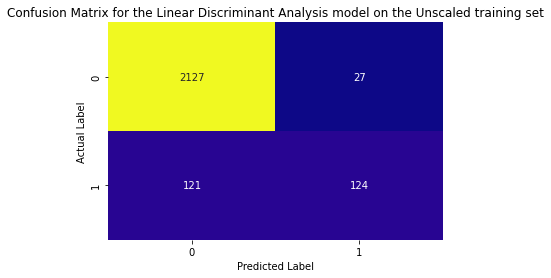

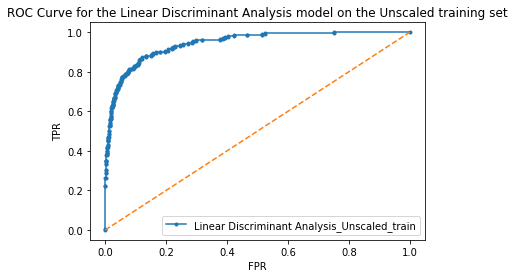



############################################Testing Set################################################ 

Classification report for the Linear Discriminant Analysis model on the Unscaled testing set is 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      1040
           1       0.90      0.61      0.73       142

    accuracy                           0.95      1182
   macro avg       0.92      0.80      0.85      1182
weighted avg       0.94      0.95      0.94      1182



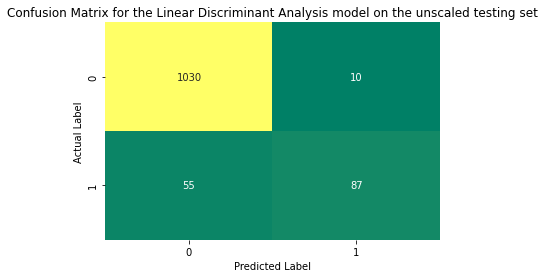

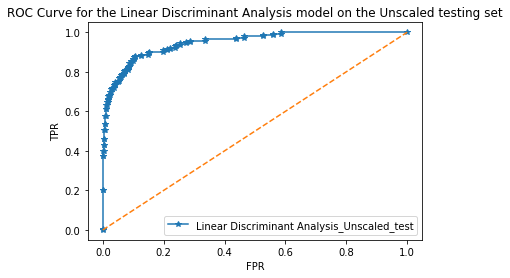

In [91]:
perf_met_df_lda_nogs, best_model_lda_nogs = grid_model_func(clfLDA, None, X_train, X_test, y_train, y_test, 'Unscaled')

--------------------Best Model Params--------------------
{'covariance_estimator': None, 'n_components': None, 'priors': None, 'shrinkage': None, 'solver': 'svd', 'store_covariance': False, 'tol': 0.0001}
Classification report for the Linear Discriminant Analysis model on the Scaled training set is 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      2154
           1       0.82      0.51      0.63       245

    accuracy                           0.94      2399
   macro avg       0.88      0.75      0.80      2399
weighted avg       0.93      0.94      0.93      2399



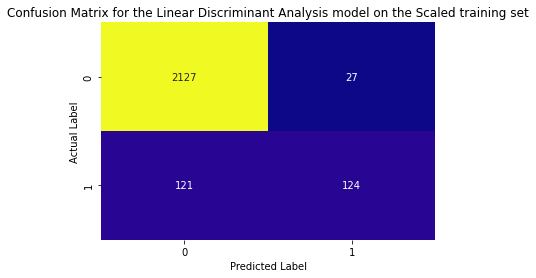

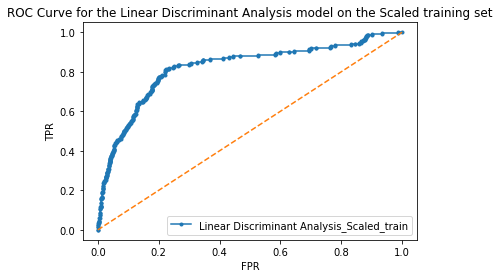



############################################Testing Set################################################ 

Classification report for the Linear Discriminant Analysis model on the Scaled testing set is 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      1040
           1       0.90      0.61      0.73       142

    accuracy                           0.95      1182
   macro avg       0.92      0.80      0.85      1182
weighted avg       0.94      0.95      0.94      1182



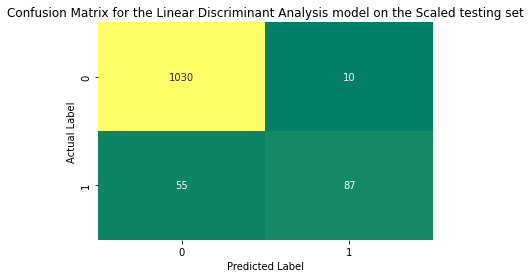

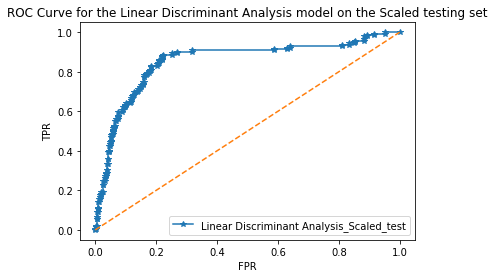

In [92]:
perf_met_df_lda_scaled_nogs, best_model_lda_scaled_nogs = grid_model_func(clfLDA, None, X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled, 'Scaled')

In [93]:
param_grid_lda = {'solver': ['svd', 'lsqr', 'eigen'],
              'shrinkage': ['auto', 'none', 'default'],
              'tol': [0.000001, 0.0000001, 0.000000001]}

--------------------Best Parameters--------------------
{'shrinkage': 'auto', 'solver': 'lsqr', 'tol': 1e-06}


--------------------Best Model Params--------------------
LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr', tol=1e-06)


Classification report for the Linear Discriminant Analysis model after grid search on the Unscaled training set is 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      2154
           1       0.82      0.51      0.63       245

    accuracy                           0.94      2399
   macro avg       0.88      0.75      0.80      2399
weighted avg       0.93      0.94      0.93      2399



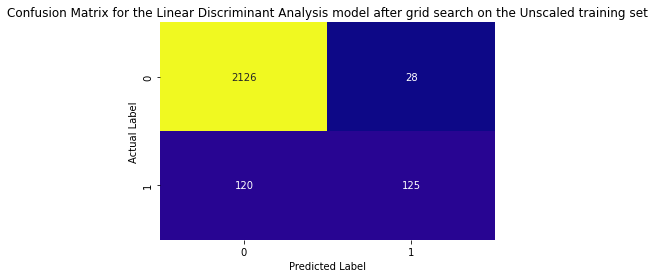

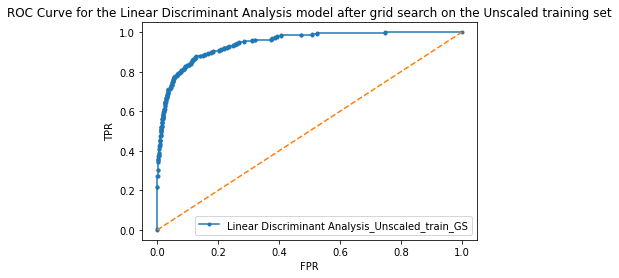



############################################Testing Set################################################ 

Classification report for the Linear Discriminant Analysis model after grid search on the Unscaled testing set is 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      1040
           1       0.88      0.58      0.70       142

    accuracy                           0.94      1182
   macro avg       0.91      0.79      0.84      1182
weighted avg       0.94      0.94      0.94      1182



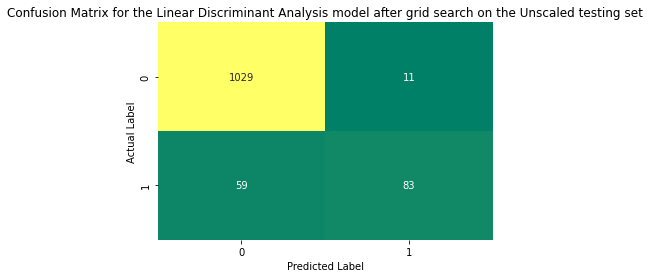

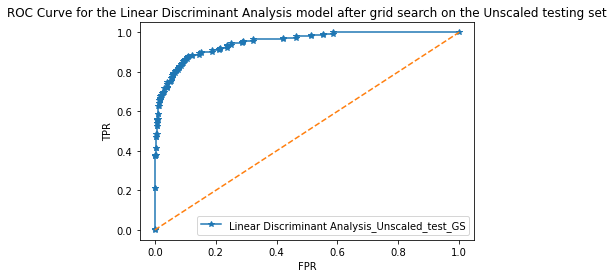

In [94]:
perf_met_df_lda, best_model_lda = grid_model_func(clfLDA, param_grid_lda, X_train, X_test, y_train, y_test, 'Unscaled')

--------------------Best Parameters--------------------
{'shrinkage': 'auto', 'solver': 'lsqr', 'tol': 1e-06}


--------------------Best Model Params--------------------
LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr', tol=1e-06)


Classification report for the Linear Discriminant Analysis model after grid search on the Scaled training set is 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      2154
           1       0.82      0.51      0.63       245

    accuracy                           0.94      2399
   macro avg       0.88      0.75      0.80      2399
weighted avg       0.93      0.94      0.93      2399



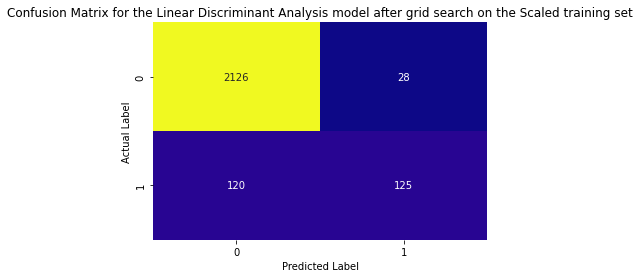

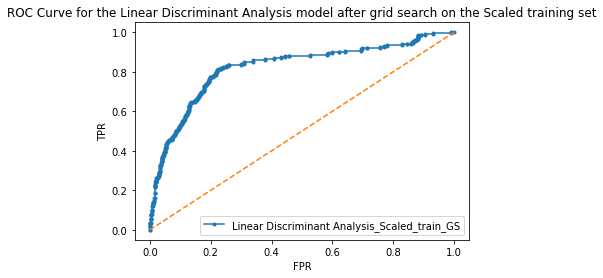



############################################Testing Set################################################ 

Classification report for the Linear Discriminant Analysis model after grid search on the Scaled testing set is 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      1040
           1       0.88      0.58      0.70       142

    accuracy                           0.94      1182
   macro avg       0.91      0.79      0.84      1182
weighted avg       0.94      0.94      0.94      1182



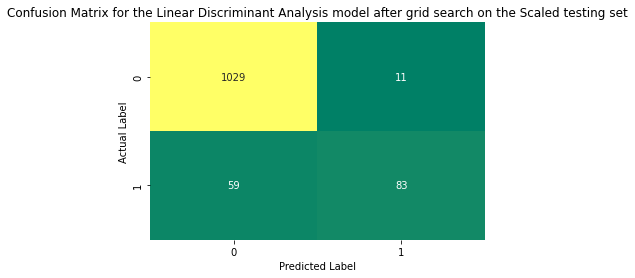

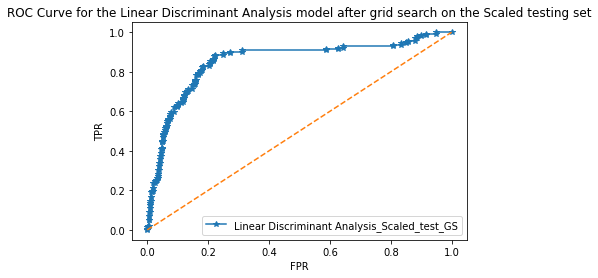

In [95]:
perf_met_df_scaled_lda, best_model_scaled_lda = grid_model_func(clfLDA, param_grid_lda, X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled, 'Scaled')

In [96]:
perf_met_df = pd.concat([perf_met_df_lda_nogs,perf_met_df_lda_scaled_nogs, perf_met_df_lda,perf_met_df_scaled_lda,])
perf_met_df

Accuracy   ROC-AUC  Precision  \
Linear Discriminant Analysis_Unscaled_Train     0.938308  0.945021   0.821192   
Linear Discriminant Analysis_Unscaled_Test      0.945008  0.948090   0.896907   
Linear Discriminant Analysis_Scaled_Train       0.938308  0.821689   0.821192   
Linear Discriminant Analysis_Scaled_Test        0.945008  0.854117   0.896907   
Linear Discriminant Analysis_Unscaled_Train_GS  0.938308  0.945059   0.816993   
Linear Discriminant Analysis_Unscaled_Test_GS   0.940778  0.948571   0.882979   
Linear Discriminant Analysis_Scaled_Train_GS    0.938308  0.822426   0.816993   
Linear Discriminant Analysis_Scaled_Test_GS     0.940778  0.855153   0.882979   

                                                  Recall  F1-Score  \
Linear Discriminant Analysis_Unscaled_Train     0.506122  0.626263   
Linear Discriminant Analysis_Unscaled_Test      0.612676  0.728033   
Linear Discriminant Analysis_Scaled_Train       0.506122  0.626263   
Linear Discriminant Analysis_Scaled_Test        0.612676  0.728033   
Linear Discriminant Analysis_Unscaled_Train_GS  0.510204  0.628141   
Linear Discriminant Analysis_Unscaled_Test_GS   0.584507  0.703390   
Linear Discriminant Analysis_Scaled_Train_GS    0.510204  0.628141   
Linear Discriminant Analysis_Scaled_Test_GS     0.584507  0.703390   

                                                Mean_CV_Score  
Linear Discriminant Analysis_Unscaled_Train          0.937059  
Linear Discriminant Analysis_Unscaled_Test           0.941632  
Linear Discriminant Analysis_Scaled_Train            0.936219  
Linear Discriminant Analysis_Scaled_Test             0.933158  
Linear Discriminant Analysis_Unscaled_Train_GS       0.937476  
Linear Discriminant Analysis_Unscaled_Test_GS        0.943327  
Linear Discriminant Analysis_Scaled_Train_GS         0.935802  
Linear Discriminant Analysis_Scaled_Test_GS          0.932317

In [ ]:
param_grid_rf = {
    'max_depth': [10,20,30],
    'max_features': [2,3,4,5,6,7,8],
    'min_samples_leaf': [25,50,75,100],
    'min_samples_split': [25,50,75,100],
    'n_estimators': [50,100,150]
}

--------------------Best Parameters--------------------
{'max_depth': 10, 'max_features': 6, 'min_samples_leaf': 50, 'min_samples_split': 25, 'n_estimators': 50}


--------------------Best Model Params--------------------
RandomForestClassifier(max_depth=10, max_features=6, min_samples_leaf=50,
                       min_samples_split=25, n_estimators=50, random_state=1)


Classification report for the Ensemble Random Forest model after grid search on the training set is 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2154
           1       0.90      0.87      0.89       245

    accuracy                           0.98      2399
   macro avg       0.94      0.93      0.94      2399
weighted avg       0.98      0.98      0.98      2399



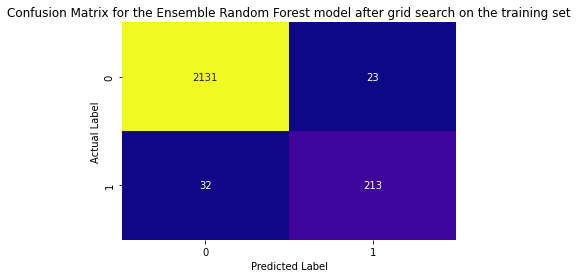

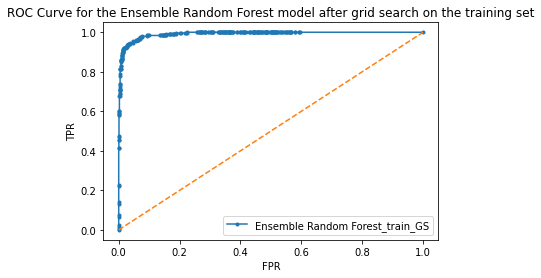



############################################Testing Set################################################ 

Classification report for the Ensemble Random Forest model after grid search on the testing set is 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1040
           1       0.95      0.89      0.92       142

    accuracy                           0.98      1182
   macro avg       0.97      0.94      0.95      1182
weighted avg       0.98      0.98      0.98      1182



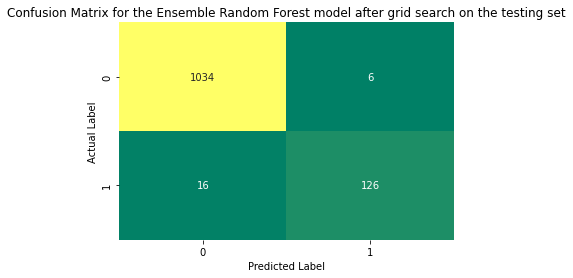

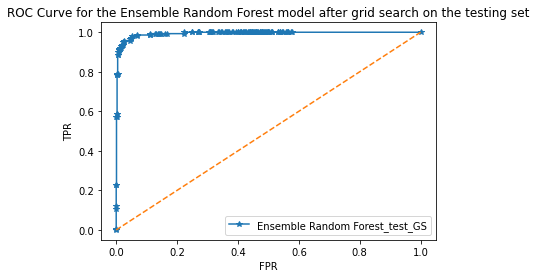

In [ ]:
perf_met_df_rf, best_model_rf = grid_model_func(clfRF, param_grid_rf, X_train, X_test, y_train, y_test, 'Unscaled')

--------------------Best Parameters--------------------
{'max_depth': 10, 'max_features': 6, 'min_samples_leaf': 50, 'min_samples_split': 25, 'n_estimators': 50}


--------------------Best Model Params--------------------
RandomForestClassifier(max_depth=10, max_features=6, min_samples_leaf=50,
                       min_samples_split=25, n_estimators=50, random_state=1)


Classification report for the Ensemble Random Forest model after grid search on the Scaled training set is 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2154
           1       0.90      0.87      0.89       245

    accuracy                           0.98      2399
   macro avg       0.94      0.93      0.94      2399
weighted avg       0.98      0.98      0.98      2399



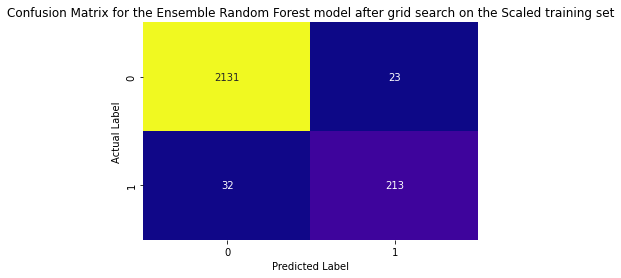

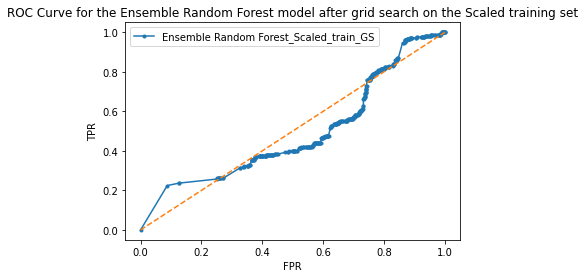



############################################Testing Set################################################ 

Classification report for the Ensemble Random Forest model after grid search on the Scaled testing set is 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1040
           1       0.95      0.89      0.92       142

    accuracy                           0.98      1182
   macro avg       0.97      0.94      0.95      1182
weighted avg       0.98      0.98      0.98      1182



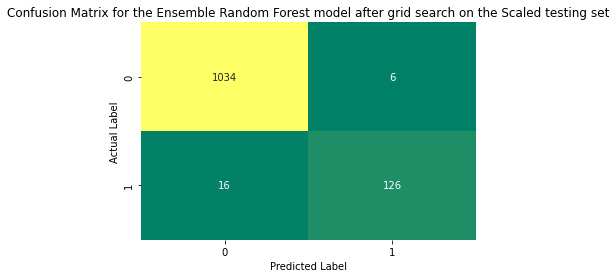

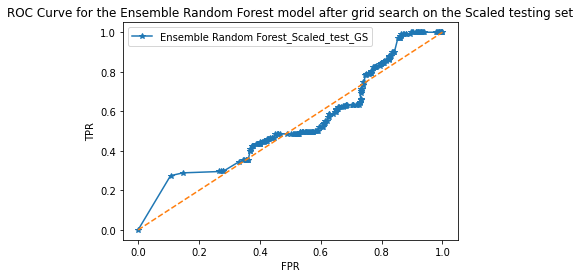

In [ ]:
perf_met_df_scaled_rf, best_model_scaled_rf = grid_model_func(clfRF, param_grid_rf, X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled, 'scaled')

In [ ]:
perf_met_df = pd.concat([perf_met_df_lda,perf_met_df_scaled_lda, perf_met_df_rf,perf_met_df_scaled_rf])
perf_met_df

Accuracy   ROC-AUC  Precision  \
Linear Discriminant Analysis_Unscaled_Train  0.938308  0.945059   0.816993   
Linear Discriminant Analysis_Unscaled_Test   0.940778  0.948571   0.882979   
Linear Discriminant Analysis_Scaled_Train    0.938308  0.822426   0.816993   
Linear Discriminant Analysis_Scaled_Test     0.940778  0.855153   0.882979   
Ensemble Random Forest_Unscaled_Train        0.977074  0.991903   0.902542   
Ensemble Random Forest_Unscaled_Test         0.981387  0.993665   0.954545   
Ensemble Random Forest_Scaled_Train          0.977074  0.489874   0.902542   
Ensemble Random Forest_Scaled_Test           0.981387  0.531876   0.954545   

                                               Recall  F1-Score  Mean_CV_Score  
Linear Discriminant Analysis_Unscaled_Train  0.510204  0.628141       0.937476  
Linear Discriminant Analysis_Unscaled_Test   0.584507  0.703390       0.943327  
Linear Discriminant Analysis_Scaled_Train    0.510204  0.628141       0.935802  
Linear Discriminant Analysis_Scaled_Test     0.584507  0.703390       0.932317  
Ensemble Random Forest_Unscaled_Train        0.869388  0.885655       0.975818  
Ensemble Random Forest_Unscaled_Test         0.887324  0.919708       0.981413  
Ensemble Random Forest_Scaled_Train          0.869388  0.885655       0.977068  
Ensemble Random Forest_Scaled_Test           0.887324  0.919708       0.980573

# Part 2

In [ ]:
risk_df = pd.read_csv('/content/drive/MyDrive/PGP-DSBA/Financial and Risk Analytics/Market+Risk+Dataset.csv')
risk_df.head()

Date  Infosys  Indian Hotel  Mahindra & Mahindra  Axis Bank  SAIL  \
0  31-03-2014      264            69                  455        263    68   
1  07-04-2014      257            68                  458        276    70   
2  14-04-2014      254            68                  454        270    68   
3  21-04-2014      253            68                  488        283    68   
4  28-04-2014      256            65                  482        282    63   

   Shree Cement  Sun Pharma  Jindal Steel  Idea Vodafone  Jet Airways  
0          5543         555           298             83          278  
1          5728         610           279             84          303  
2          5649         607           279             83          280  
3          5692         604           274             83          282  
4          5582         611           238             79          243

In [ ]:
risk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Date                 314 non-null    object
 1   Infosys              314 non-null    int64 
 2   Indian Hotel         314 non-null    int64 
 3   Mahindra & Mahindra  314 non-null    int64 
 4   Axis Bank            314 non-null    int64 
 5   SAIL                 314 non-null    int64 
 6   Shree Cement         314 non-null    int64 
 7   Sun Pharma           314 non-null    int64 
 8   Jindal Steel         314 non-null    int64 
 9   Idea Vodafone        314 non-null    int64 
 10  Jet Airways          314 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 27.1+ KB


In [ ]:
risk_df['Date'] = pd.to_datetime(risk_df['Date'], format='%d-%m-%Y')
risk_df.head()

Date  Infosys  Indian Hotel  Mahindra & Mahindra  Axis Bank  SAIL  \
0 2014-03-31      264            69                  455        263    68   
1 2014-04-07      257            68                  458        276    70   
2 2014-04-14      254            68                  454        270    68   
3 2014-04-21      253            68                  488        283    68   
4 2014-04-28      256            65                  482        282    63   

   Shree Cement  Sun Pharma  Jindal Steel  Idea Vodafone  Jet Airways  
0          5543         555           298             83          278  
1          5728         610           279             84          303  
2          5649         607           279             83          280  
3          5692         604           274             83          282  
4          5582         611           238             79          243

## 2.1 Draw Stock Price Graph(Stock Price vs Time) for any 2 given stocks with inference

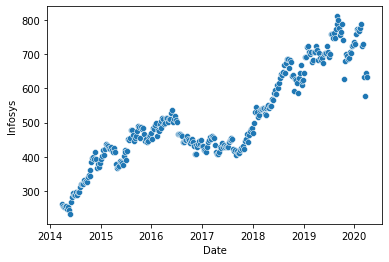

In [ ]:
sns.scatterplot(data=risk_df, x='Date', y='Infosys');

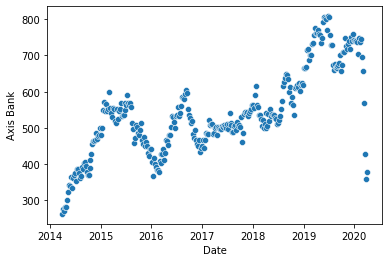

In [ ]:
sns.scatterplot(data=risk_df, x='Date', y='Axis Bank');

## 2.2 Calculate Returns for all stocks with inference

In [ ]:
return_df = risk_df.pivot_table(index=['Date'])
return_df.head()

Axis Bank  Idea Vodafone  Indian Hotel  Infosys  Jet Airways  \
Date                                                                       
2014-03-31        263             83            69      264          278   
2014-04-07        276             84            68      257          303   
2014-04-14        270             83            68      254          280   
2014-04-21        283             83            68      253          282   
2014-04-28        282             79            65      256          243   

            Jindal Steel  Mahindra & Mahindra  SAIL  Shree Cement  Sun Pharma  
Date                                                                           
2014-03-31           298                  455    68          5543         555  
2014-04-07           279                  458    70          5728         610  
2014-04-14           279                  454    68          5649         607  
2014-04-21           274                  488    68          5692         604  
2014-04-28           238                  482    63          5582         611

In [ ]:
daily_return = return_df.pct_change().fillna(0)
daily_return.head()

Axis Bank  Idea Vodafone  Indian Hotel   Infosys  Jet Airways  \
Date                                                                        
2014-03-31   0.000000       0.000000      0.000000  0.000000     0.000000   
2014-04-07   0.049430       0.012048     -0.014493 -0.026515     0.089928   
2014-04-14  -0.021739      -0.011905      0.000000 -0.011673    -0.075908   
2014-04-21   0.048148       0.000000      0.000000 -0.003937     0.007143   
2014-04-28  -0.003534      -0.048193     -0.044118  0.011858    -0.138298   

            Jindal Steel  Mahindra & Mahindra      SAIL  Shree Cement  \
Date                                                                    
2014-03-31      0.000000             0.000000  0.000000      0.000000   
2014-04-07     -0.063758             0.006593  0.029412      0.033375   
2014-04-14      0.000000            -0.008734 -0.028571     -0.013792   
2014-04-21     -0.017921             0.074890  0.000000      0.007612   
2014-04-28     -0.131387            -0.012295 -0.073529     -0.019325   

            Sun Pharma  
Date                    
2014-03-31    0.000000  
2014-04-07    0.099099  
2014-04-14   -0.004918  
2014-04-21   -0.004942  
2014-04-28    0.011589

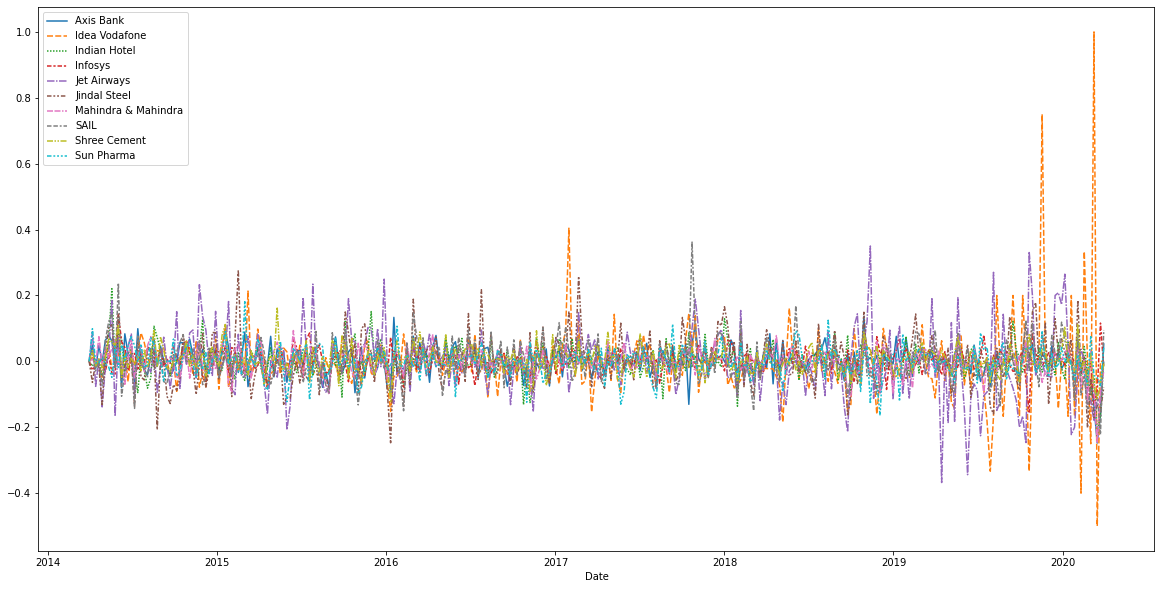

In [ ]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=daily_return);
plt.show()

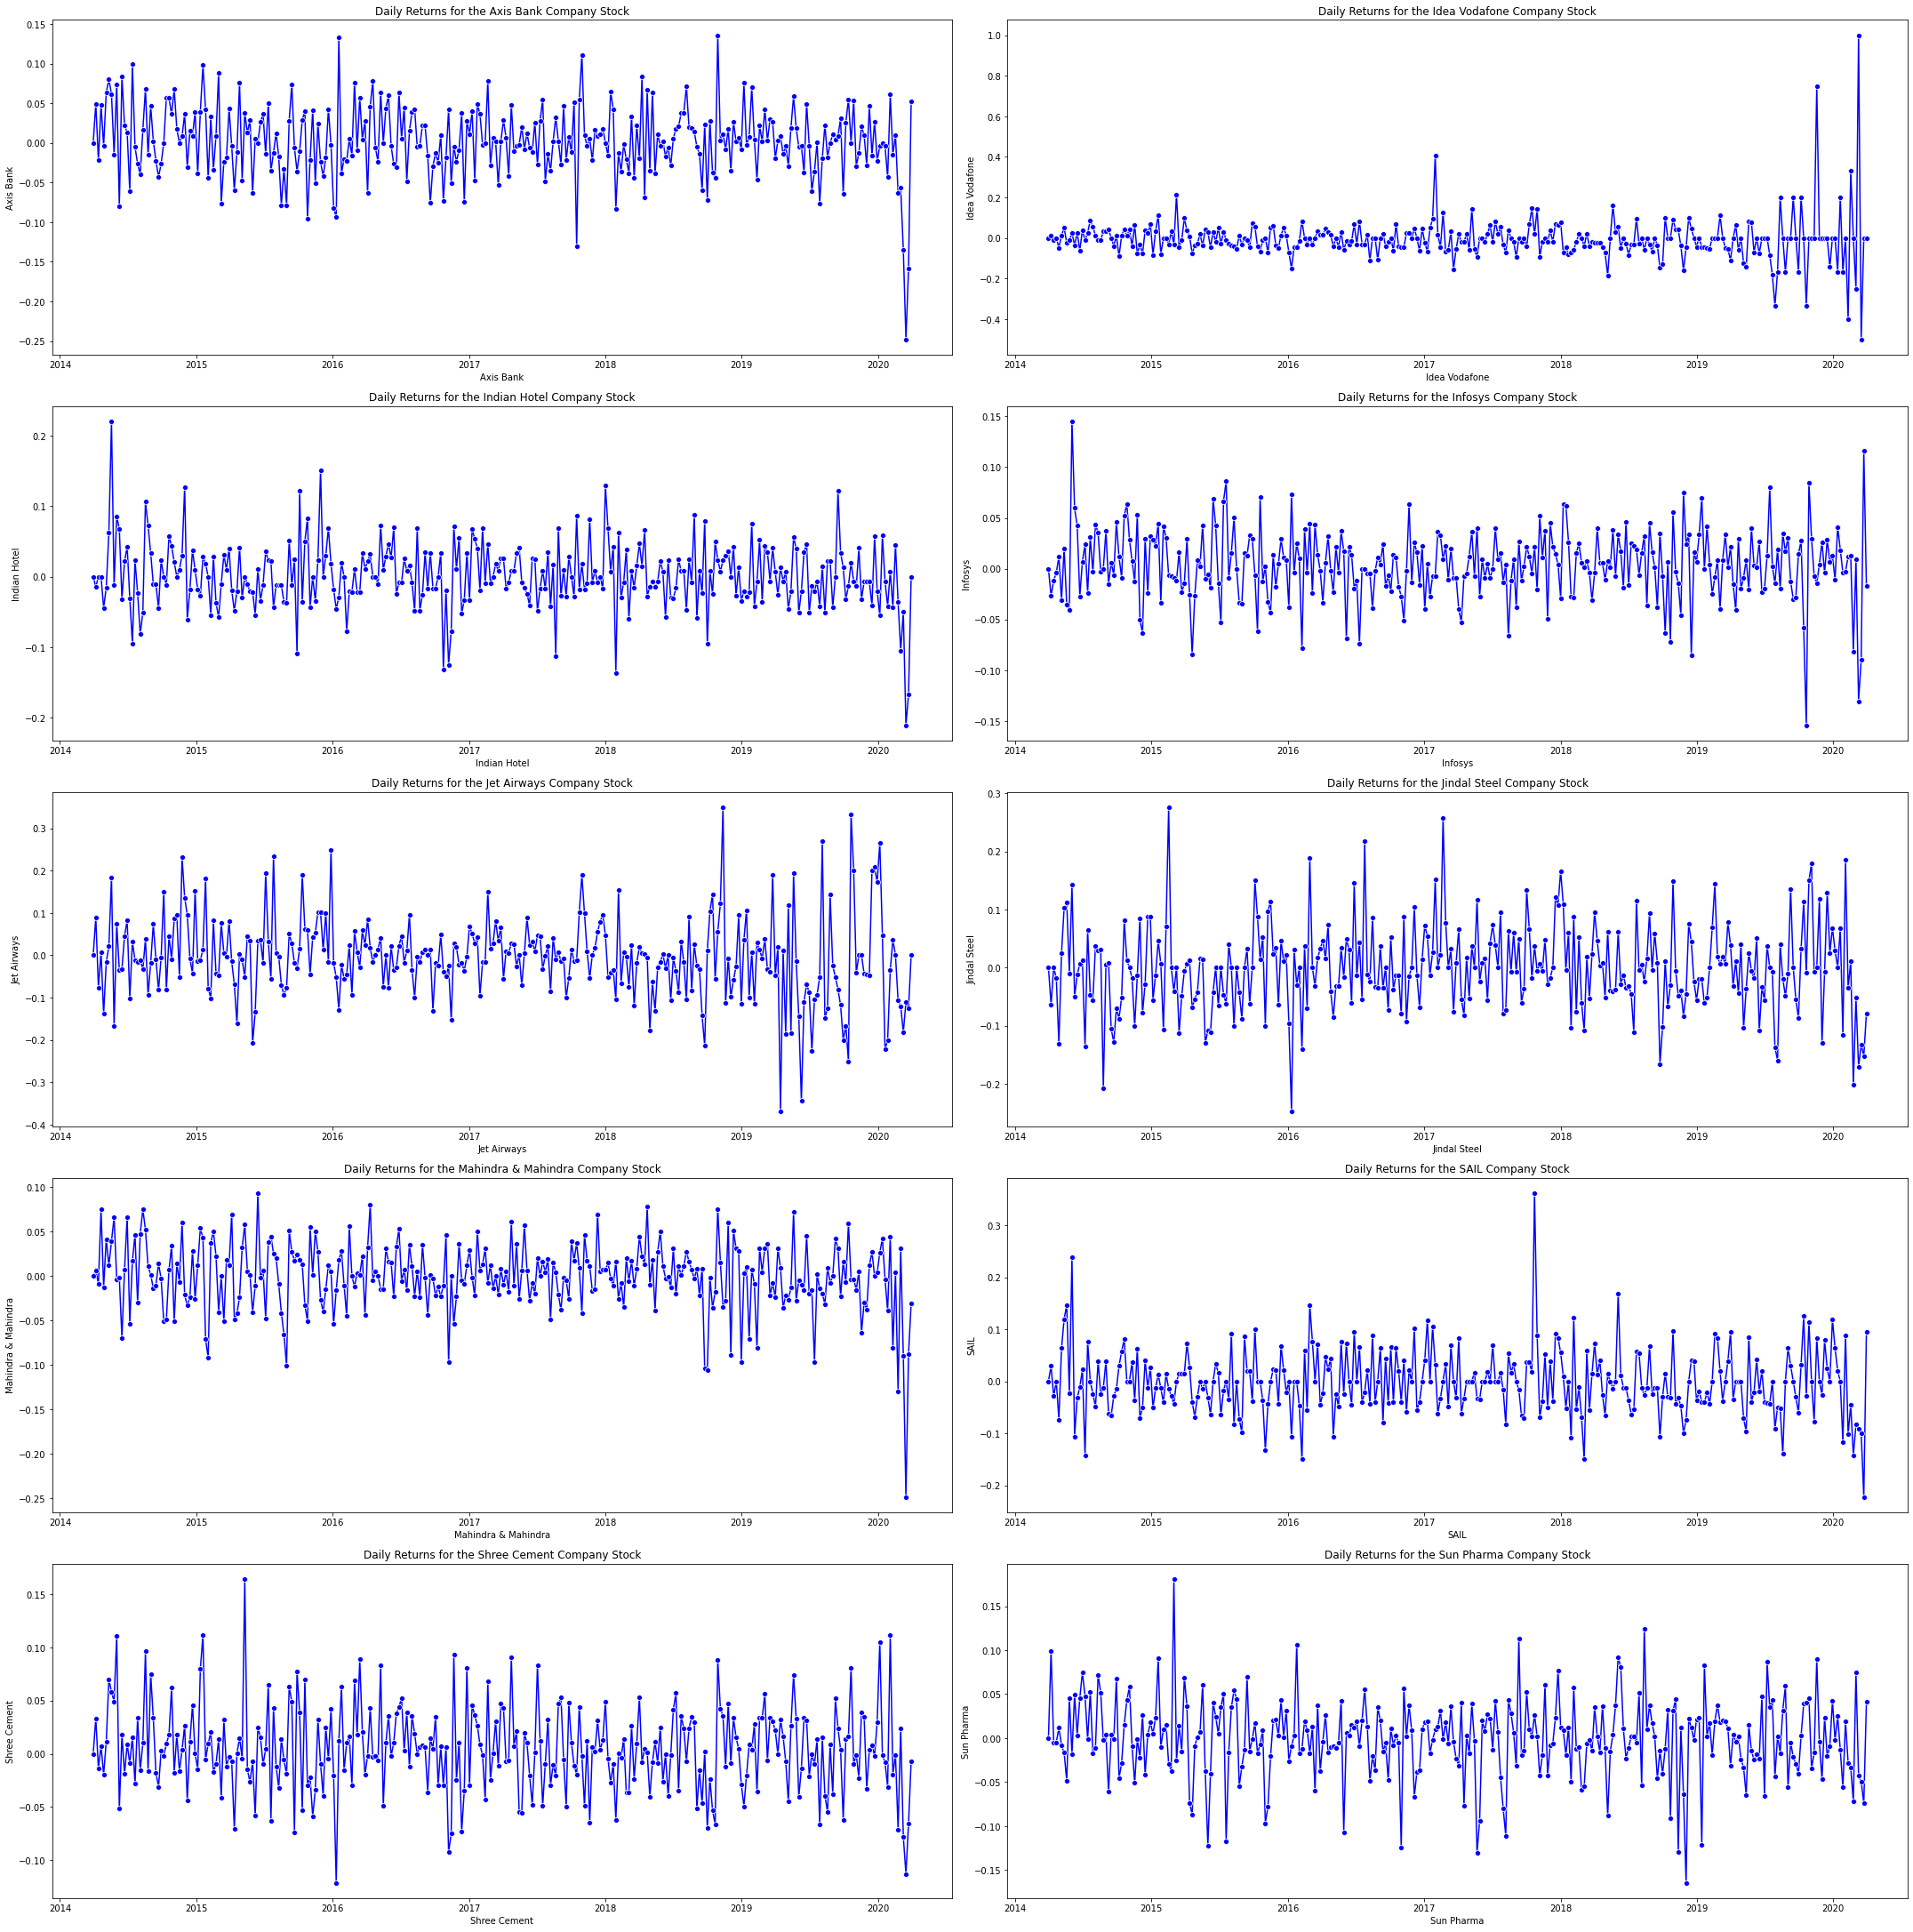

In [ ]:
# Distribution and boxplots of the variables

a = len(daily_return.columns)  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig1 = plt.figure(figsize=(30,60))

for i in daily_return.columns:
    plt.subplot(a, b, c)
    plt.title('Daily Returns for the {} Company Stock'.format(i))
    plt.xlabel(i)
    sns.lineplot(data = daily_return[i], marker='o', color='blue')
    c = c + 1

plt.tight_layout()
plt.show()

In [ ]:
monthly_return = return_df.resample('M').ffill().pct_change().fillna(0)
monthly_return.head()

Axis Bank  Idea Vodafone  Indian Hotel   Infosys  Jet Airways  \
Date                                                                        
2014-03-31   0.000000       0.000000      0.000000  0.000000     0.000000   
2014-04-30   0.072243      -0.048193     -0.057971 -0.030303    -0.125899   
2014-05-31   0.202128       0.025316      0.261538 -0.085938    -0.008230   
2014-06-30   0.109145      -0.012346      0.195122  0.239316     0.136929   
2014-07-31   0.000000       0.162500     -0.122449  0.027586    -0.098540   

            Jindal Steel  Mahindra & Mahindra      SAIL  Shree Cement  \
Date                                                                    
2014-03-31      0.000000             0.000000  0.000000      0.000000   
2014-04-30     -0.201342             0.059341 -0.073529      0.007036   
2014-05-31      0.243697             0.168050  0.333333      0.201899   
2014-06-30      0.091216            -0.005329  0.083333      0.061857   
2014-07-31     -0.173375            -0.023214 -0.098901      0.011651   

            Sun Pharma  
Date                    
2014-03-31    0.000000  
2014-04-30    0.100901  
2014-05-31   -0.029460  
2014-06-30    0.161889  
2014-07-31    0.082729

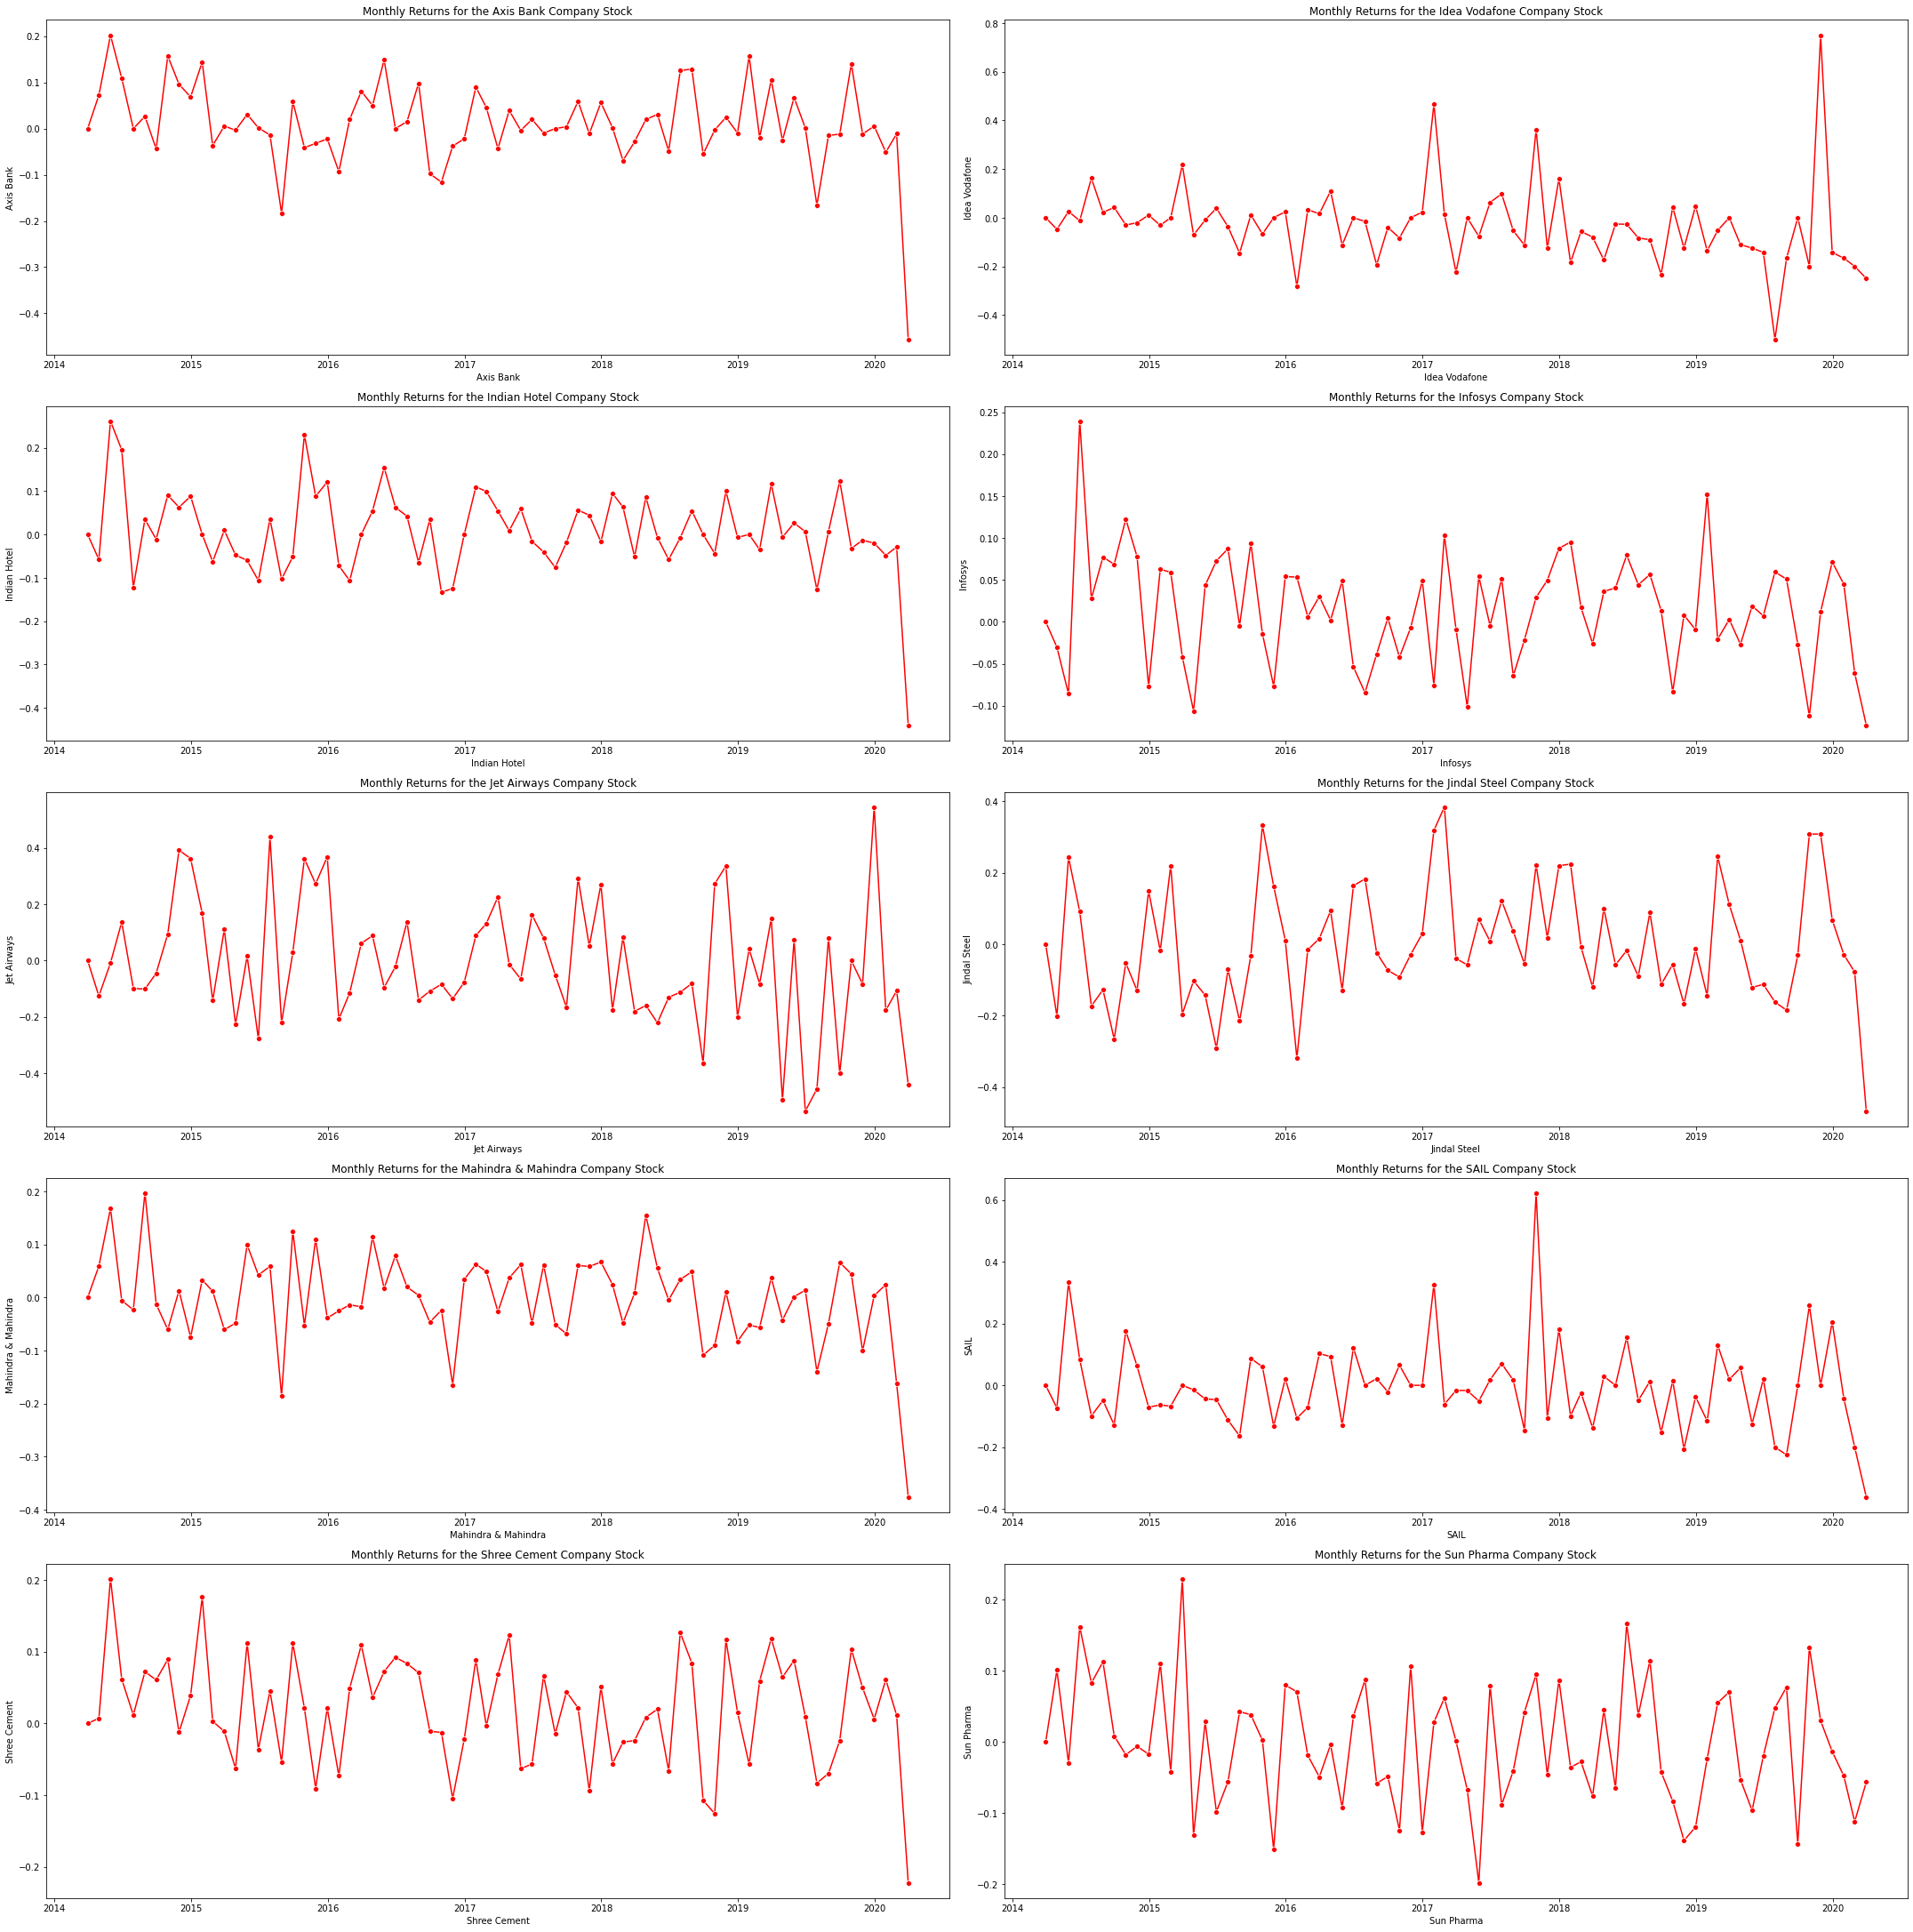

In [ ]:
# Distribution and boxplots of the variables

a = len(monthly_return.columns)  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig1 = plt.figure(figsize=(30,60))

for i in monthly_return.columns:
    plt.subplot(a, b, c)
    plt.title('Monthly Returns for the {} Company Stock'.format(i))
    plt.xlabel(i)
    sns.lineplot(data = monthly_return[i], marker= 'o',color='red')
    c = c + 1

plt.tight_layout()
plt.show()

In [ ]:
yearly_return = return_df.resample('Y').ffill().pct_change().fillna(0)
yearly_return.head()

Axis Bank  Idea Vodafone  Indian Hotel   Infosys  Jet Airways  \
Date                                                                        
2014-12-31   0.000000       0.000000      0.000000  0.000000     0.000000   
2015-12-31  -0.118000      -0.105263      0.000000  0.224543     0.729545   
2016-12-31   0.009070      -0.470588     -0.180180 -0.042644    -0.542707   
2017-12-31   0.265169       0.444444      0.274725  0.077951     1.390805   
2018-12-31   0.099467      -0.661538      0.224138  0.291322    -0.705529   

            Jindal Steel  Mahindra & Mahindra      SAIL  Shree Cement  \
Date                                                                    
2014-12-31      0.000000             0.000000  0.000000      0.000000   
2015-12-31     -0.419753             0.052632 -0.405063      0.221992   
2016-12-31     -0.265957            -0.046667  0.042553      0.298365   
2017-12-31      1.971014             0.279720  0.857143      0.228355   
2018-12-31     -0.258537            -0.025956 -0.428571     -0.069588   

            Sun Pharma  
Date                    
2014-12-31    0.000000  
2015-12-31   -0.008717  
2016-12-31   -0.227387  
2017-12-31   -0.086179  
2018-12-31   -0.238434

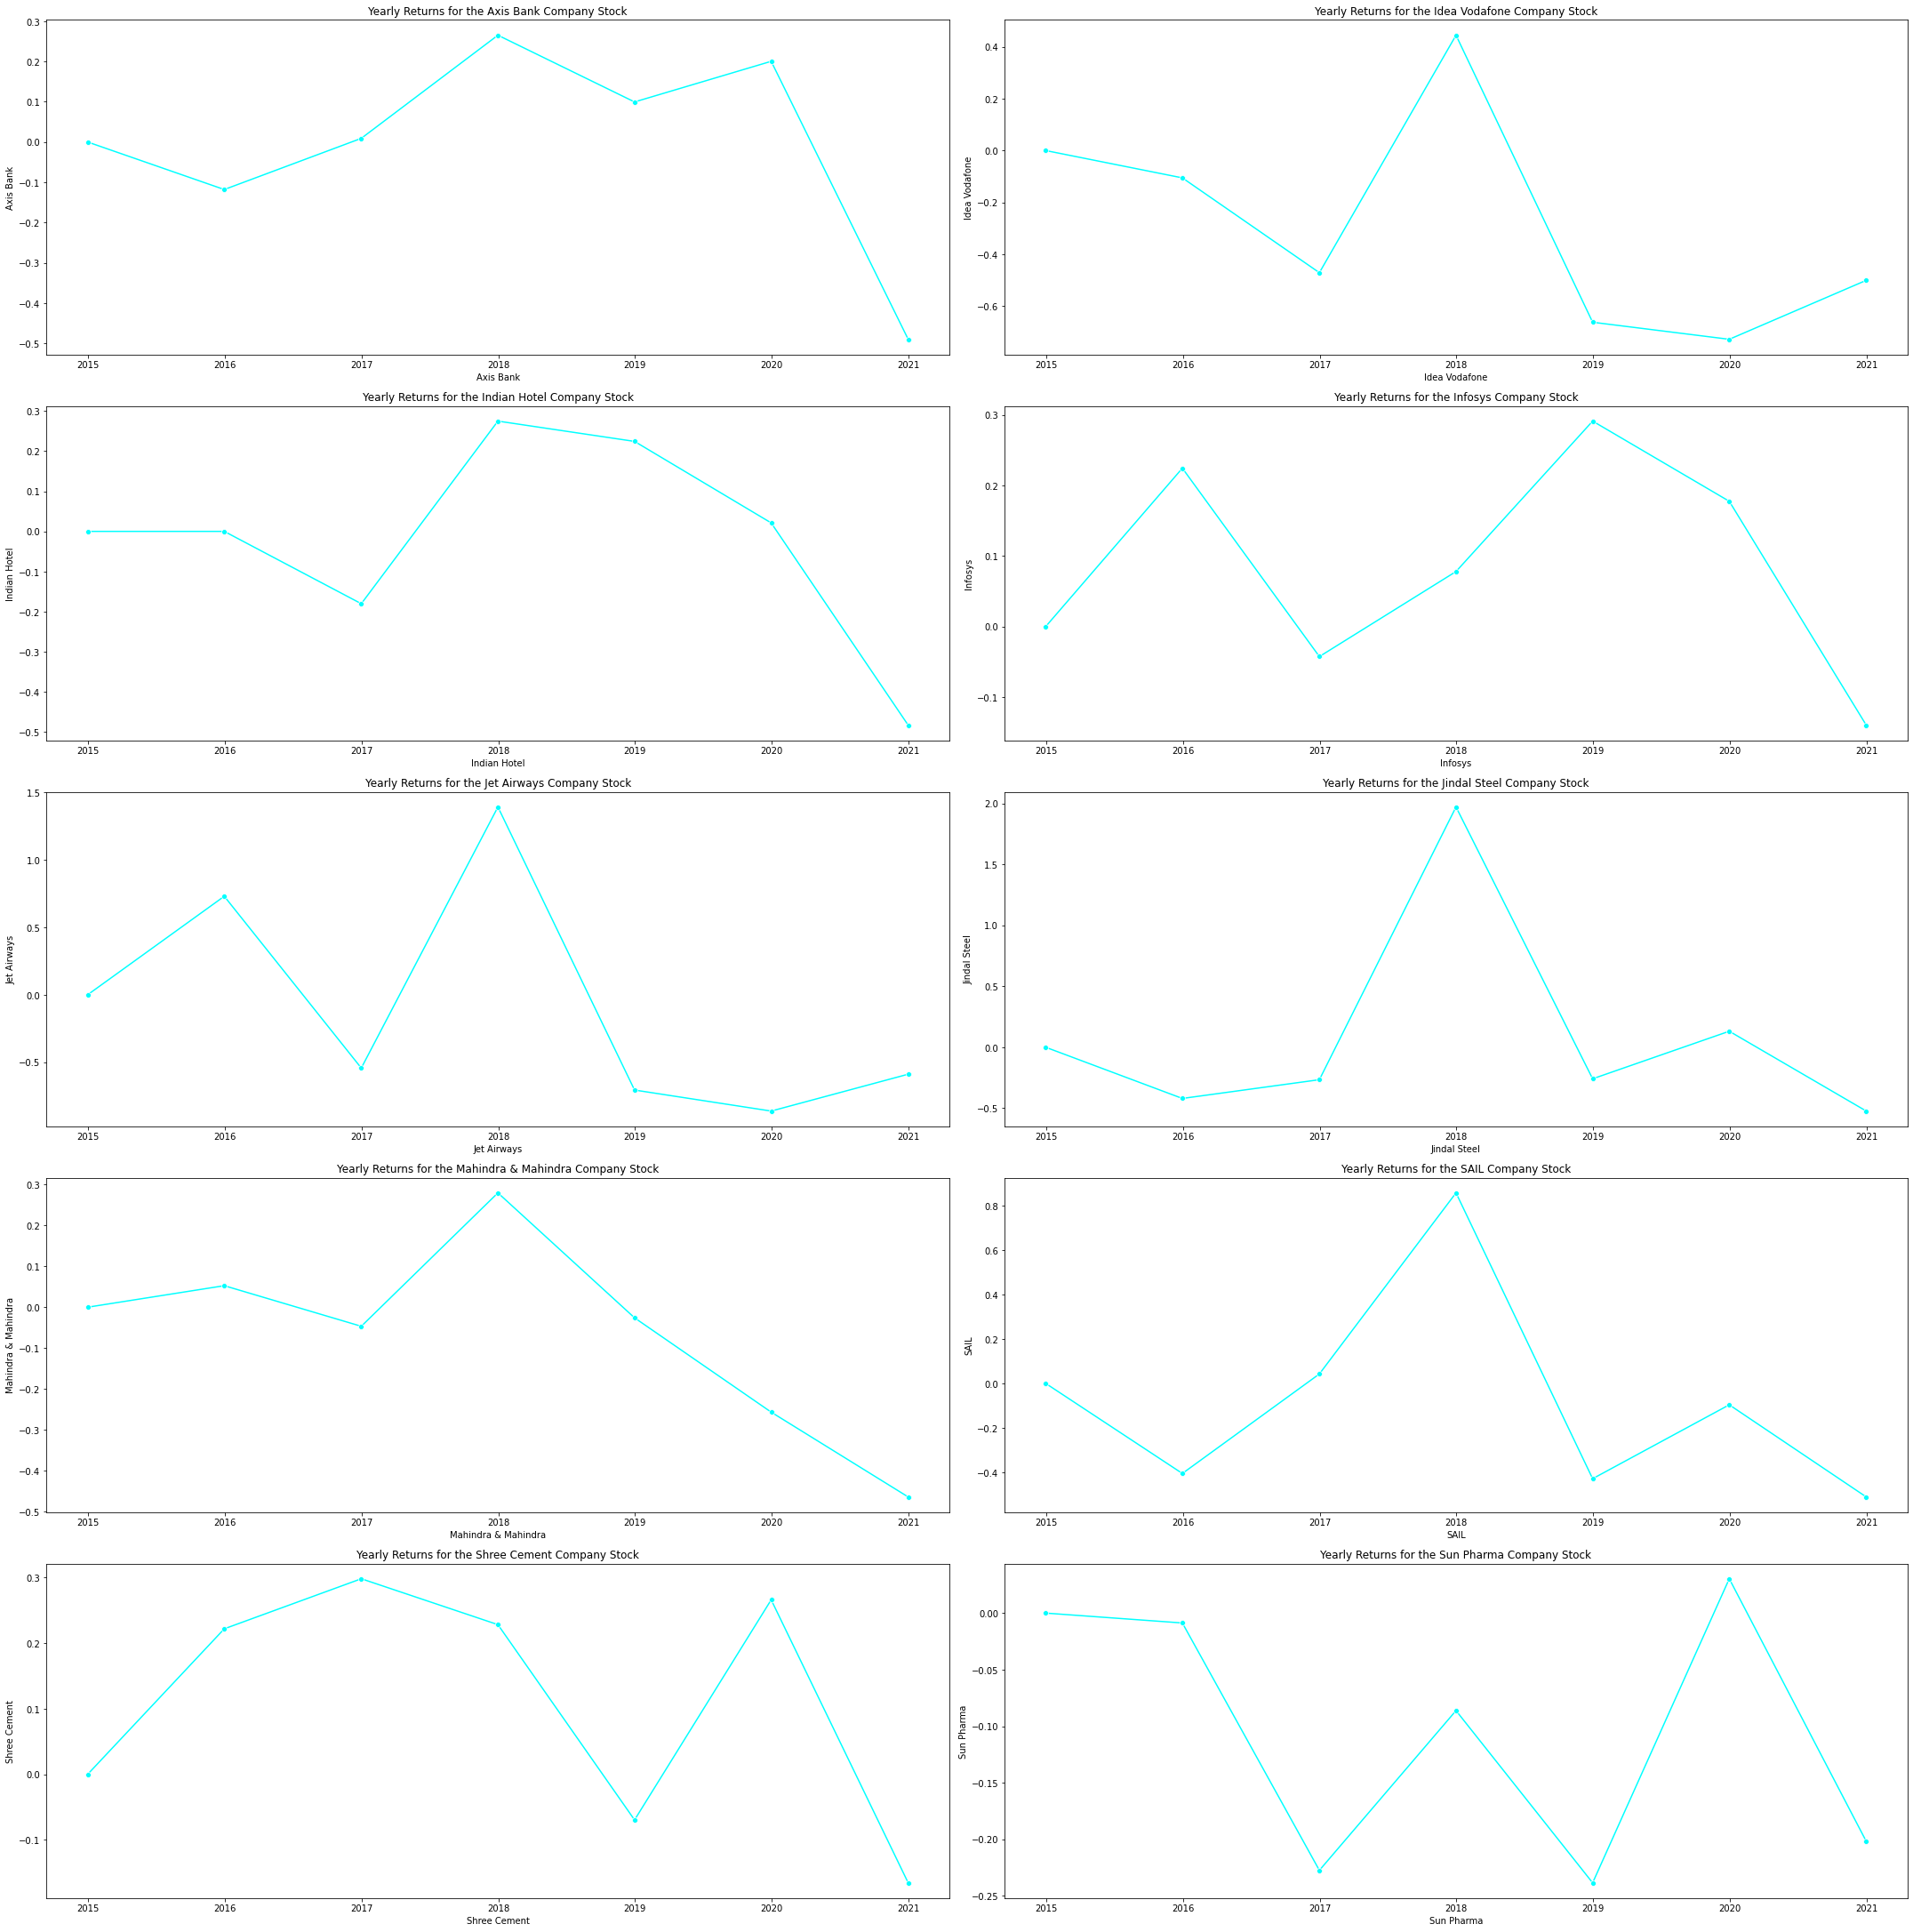

In [ ]:
# Distribution and boxplots of the variables

a = len(yearly_return.columns)  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig1 = plt.figure(figsize=(30,60))

for i in yearly_return.columns:
    plt.subplot(a, b, c)
    plt.title('Yearly Returns for the {} Company Stock'.format(i))
    plt.xlabel(i)
    sns.lineplot(data = yearly_return[i], marker= 'o',color='cyan')
    c = c + 1

plt.tight_layout()
plt.show()

In [ ]:
daily_cum_return = (daily_return+1).cumprod()
daily_cum_return.head()

Axis Bank  Idea Vodafone  Indian Hotel   Infosys  Jet Airways  \
Date                                                                        
2014-03-31   1.000000       1.000000      1.000000  1.000000     1.000000   
2014-04-07   1.049430       1.012048      0.985507  0.973485     1.089928   
2014-04-14   1.026616       1.000000      0.985507  0.962121     1.007194   
2014-04-21   1.076046       1.000000      0.985507  0.958333     1.014388   
2014-04-28   1.072243       0.951807      0.942029  0.969697     0.874101   

            Jindal Steel  Mahindra & Mahindra      SAIL  Shree Cement  \
Date                                                                    
2014-03-31      1.000000             1.000000  1.000000      1.000000   
2014-04-07      0.936242             1.006593  1.029412      1.033375   
2014-04-14      0.936242             0.997802  1.000000      1.019123   
2014-04-21      0.919463             1.072527  1.000000      1.026881   
2014-04-28      0.798658             1.059341  0.926471      1.007036   

            Sun Pharma  
Date                    
2014-03-31    1.000000  
2014-04-07    1.099099  
2014-04-14    1.093694  
2014-04-21    1.088288  
2014-04-28    1.100901

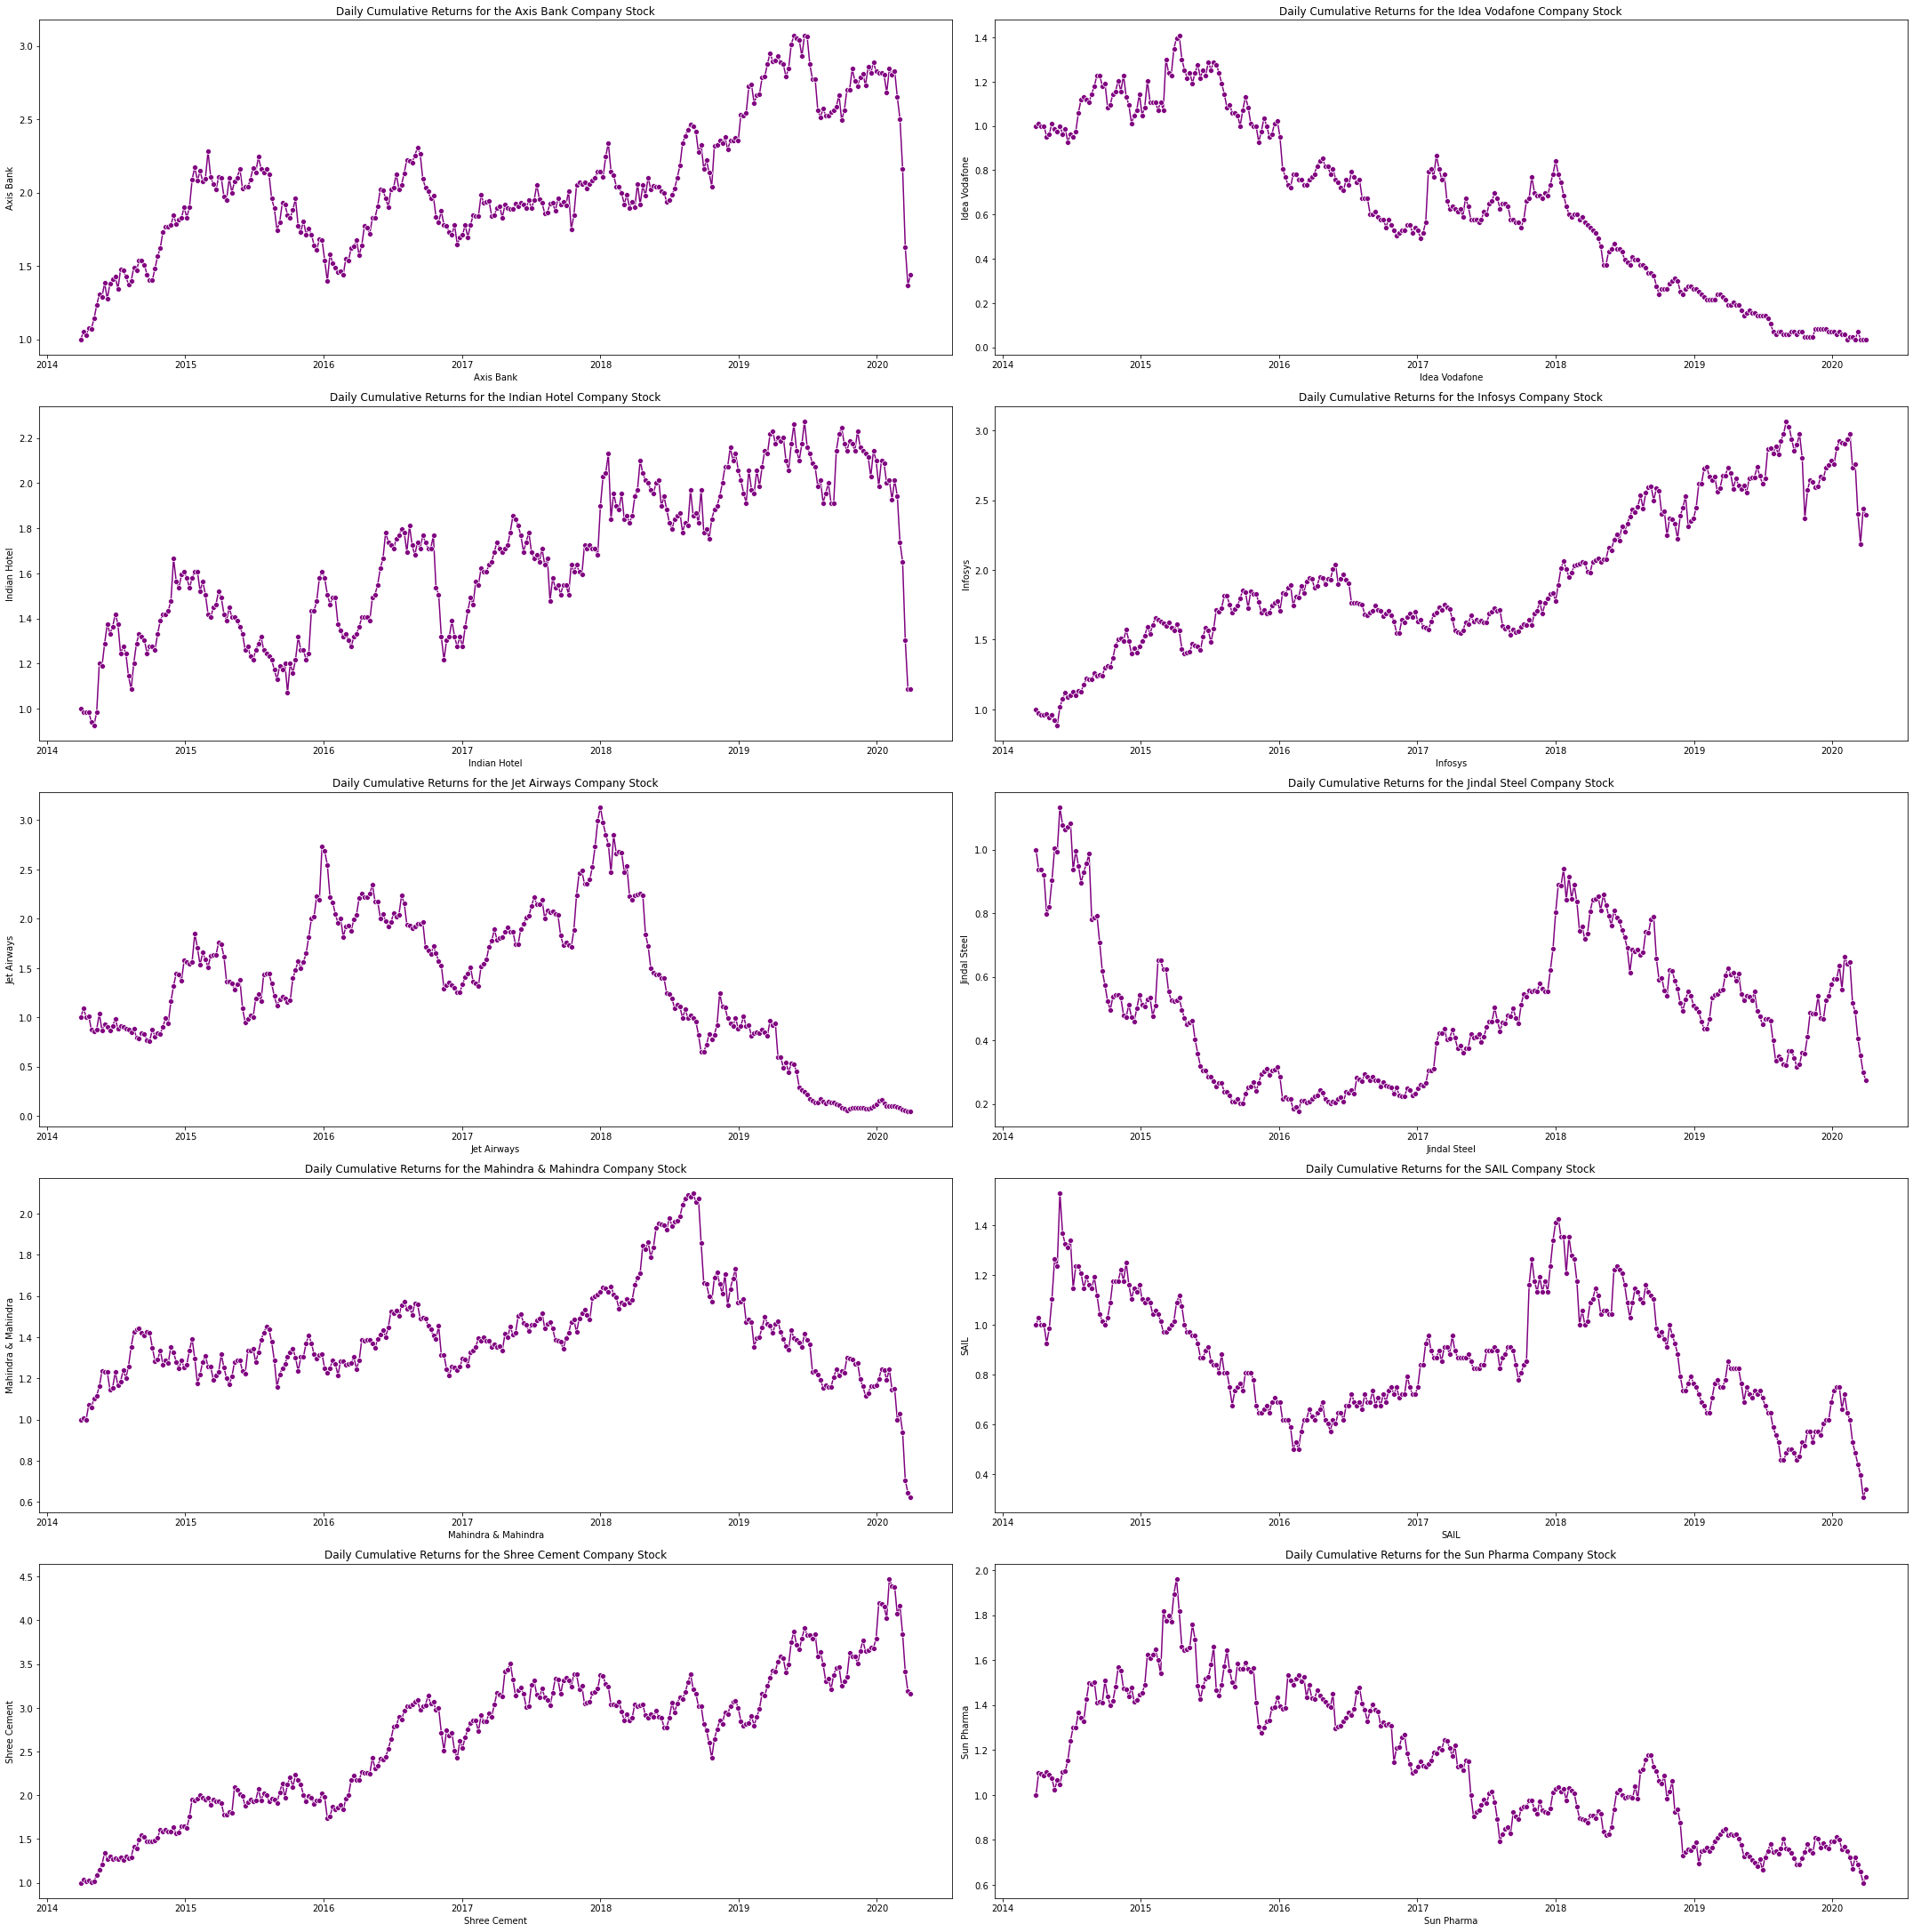

In [ ]:
# Distribution and boxplots of the variables

a = len(daily_cum_return.columns)  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig1 = plt.figure(figsize=(30,60))

for i in daily_cum_return.columns:
    plt.subplot(a, b, c)
    plt.title('Daily Cumulative Returns for the {} Company Stock'.format(i))
    plt.xlabel(i)
    sns.lineplot(data = daily_cum_return[i], marker='o', color='purple')
    c = c + 1

plt.tight_layout()
plt.show()

In [ ]:
monthly_cum_return = (monthly_return+1).cumprod()
monthly_cum_return.head()

Axis Bank  Idea Vodafone  Indian Hotel   Infosys  Jet Airways  \
Date                                                                        
2014-03-31   1.000000       1.000000      1.000000  1.000000     1.000000   
2014-04-30   1.072243       0.951807      0.942029  0.969697     0.874101   
2014-05-31   1.288973       0.975904      1.188406  0.886364     0.866906   
2014-06-30   1.429658       0.963855      1.420290  1.098485     0.985612   
2014-07-31   1.429658       1.120482      1.246377  1.128788     0.888489   

            Jindal Steel  Mahindra & Mahindra      SAIL  Shree Cement  \
Date                                                                    
2014-03-31      1.000000             1.000000  1.000000      1.000000   
2014-04-30      0.798658             1.059341  0.926471      1.007036   
2014-05-31      0.993289             1.237363  1.235294      1.210355   
2014-06-30      1.083893             1.230769  1.338235      1.285225   
2014-07-31      0.895973             1.202198  1.205882      1.300198   

            Sun Pharma  
Date                    
2014-03-31    1.000000  
2014-04-30    1.100901  
2014-05-31    1.068468  
2014-06-30    1.241441  
2014-07-31    1.344144

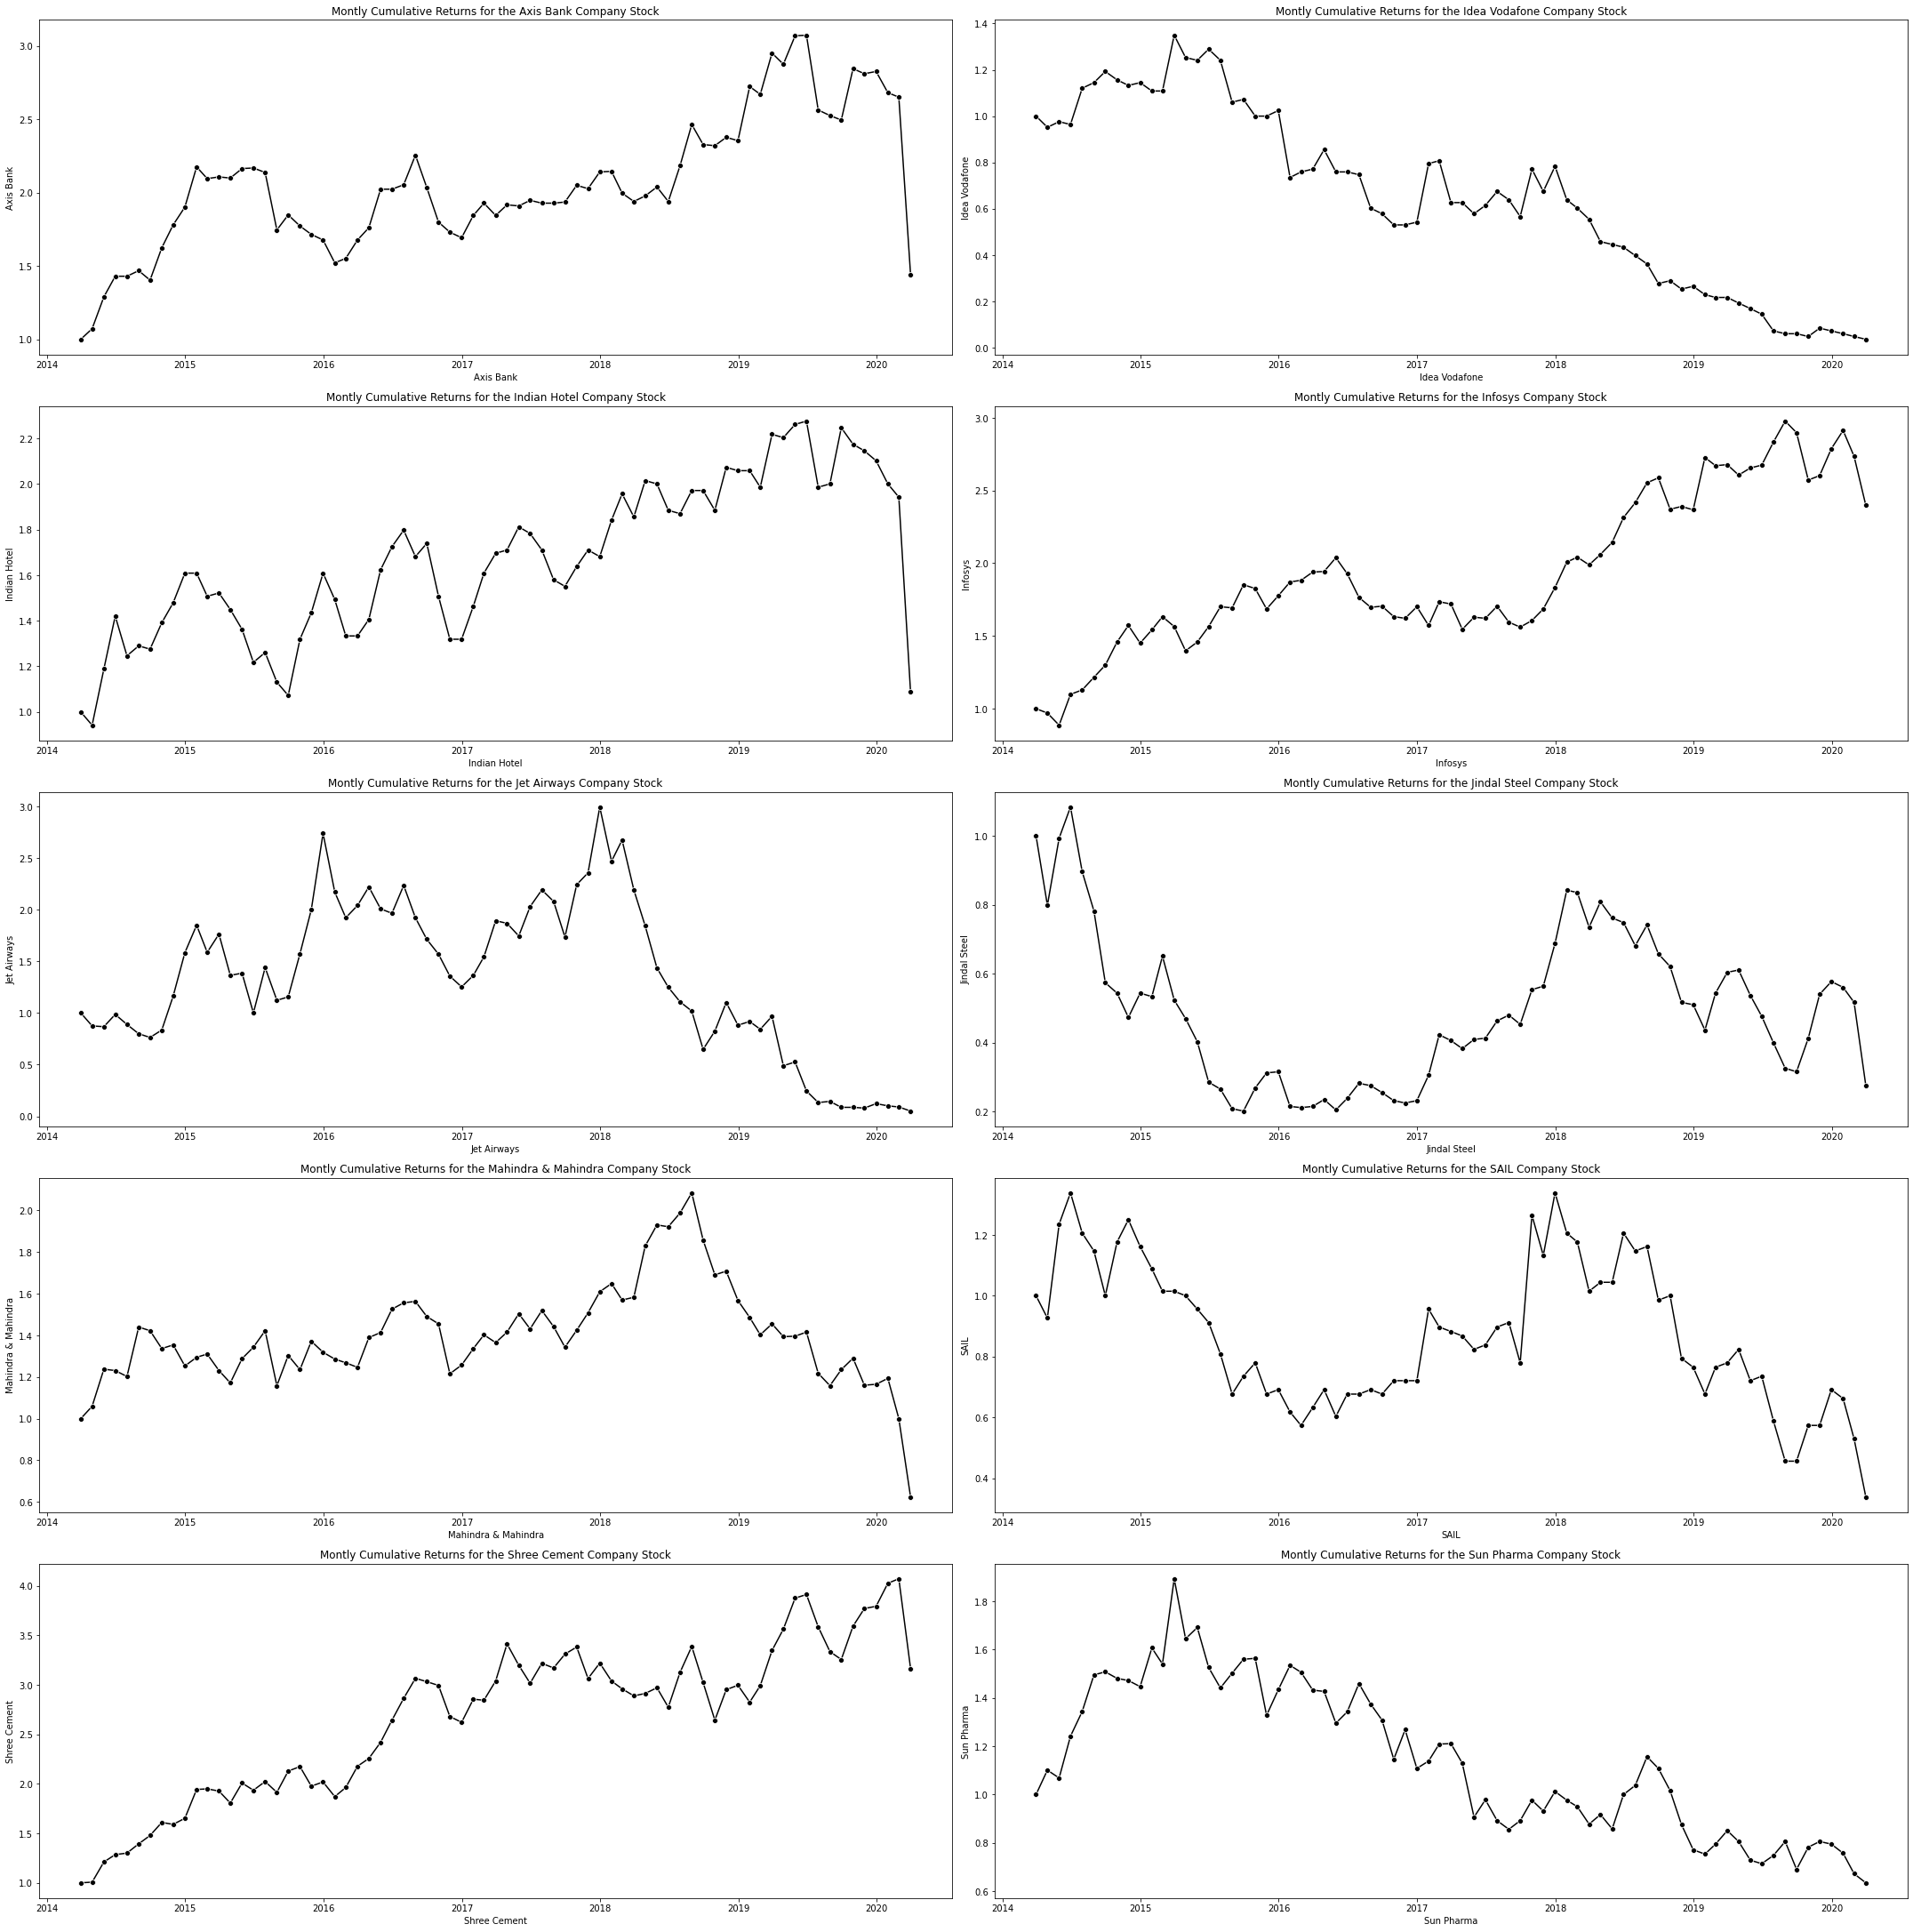

In [ ]:
# Distribution and boxplots of the variables

a = len(monthly_cum_return.columns)  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig1 = plt.figure(figsize=(30,60))

for i in monthly_cum_return.columns:
    plt.subplot(a, b, c)
    plt.title('Montly Cumulative Returns for the {} Company Stock'.format(i))
    plt.xlabel(i)
    sns.lineplot(data =monthly_cum_return[i], marker='o', color='black')
    c = c + 1

plt.tight_layout()
plt.show()

In [ ]:
yearly_cum_return = (yearly_return+1).cumprod()
yearly_cum_return.head()

Axis Bank  Idea Vodafone  Indian Hotel   Infosys  Jet Airways  \
Date                                                                        
2014-12-31      1.000       1.000000      1.000000  1.000000     1.000000   
2015-12-31      0.882       0.894737      1.000000  1.224543     1.729545   
2016-12-31      0.890       0.473684      0.819820  1.172324     0.790909   
2017-12-31      1.126       0.684211      1.045045  1.263708     1.890909   
2018-12-31      1.238       0.231579      1.279279  1.631854     0.556818   

            Jindal Steel  Mahindra & Mahindra      SAIL  Shree Cement  \
Date                                                                    
2014-12-31      1.000000             1.000000  1.000000      1.000000   
2015-12-31      0.580247             1.052632  0.594937      1.221992   
2016-12-31      0.425926             1.003509  0.620253      1.586591   
2017-12-31      1.265432             1.284211  1.151899      1.948897   
2018-12-31      0.938272             1.250877  0.658228      1.813278   

            Sun Pharma  
Date                    
2014-12-31    1.000000  
2015-12-31    0.991283  
2016-12-31    0.765878  
2017-12-31    0.699875  
2018-12-31    0.533001

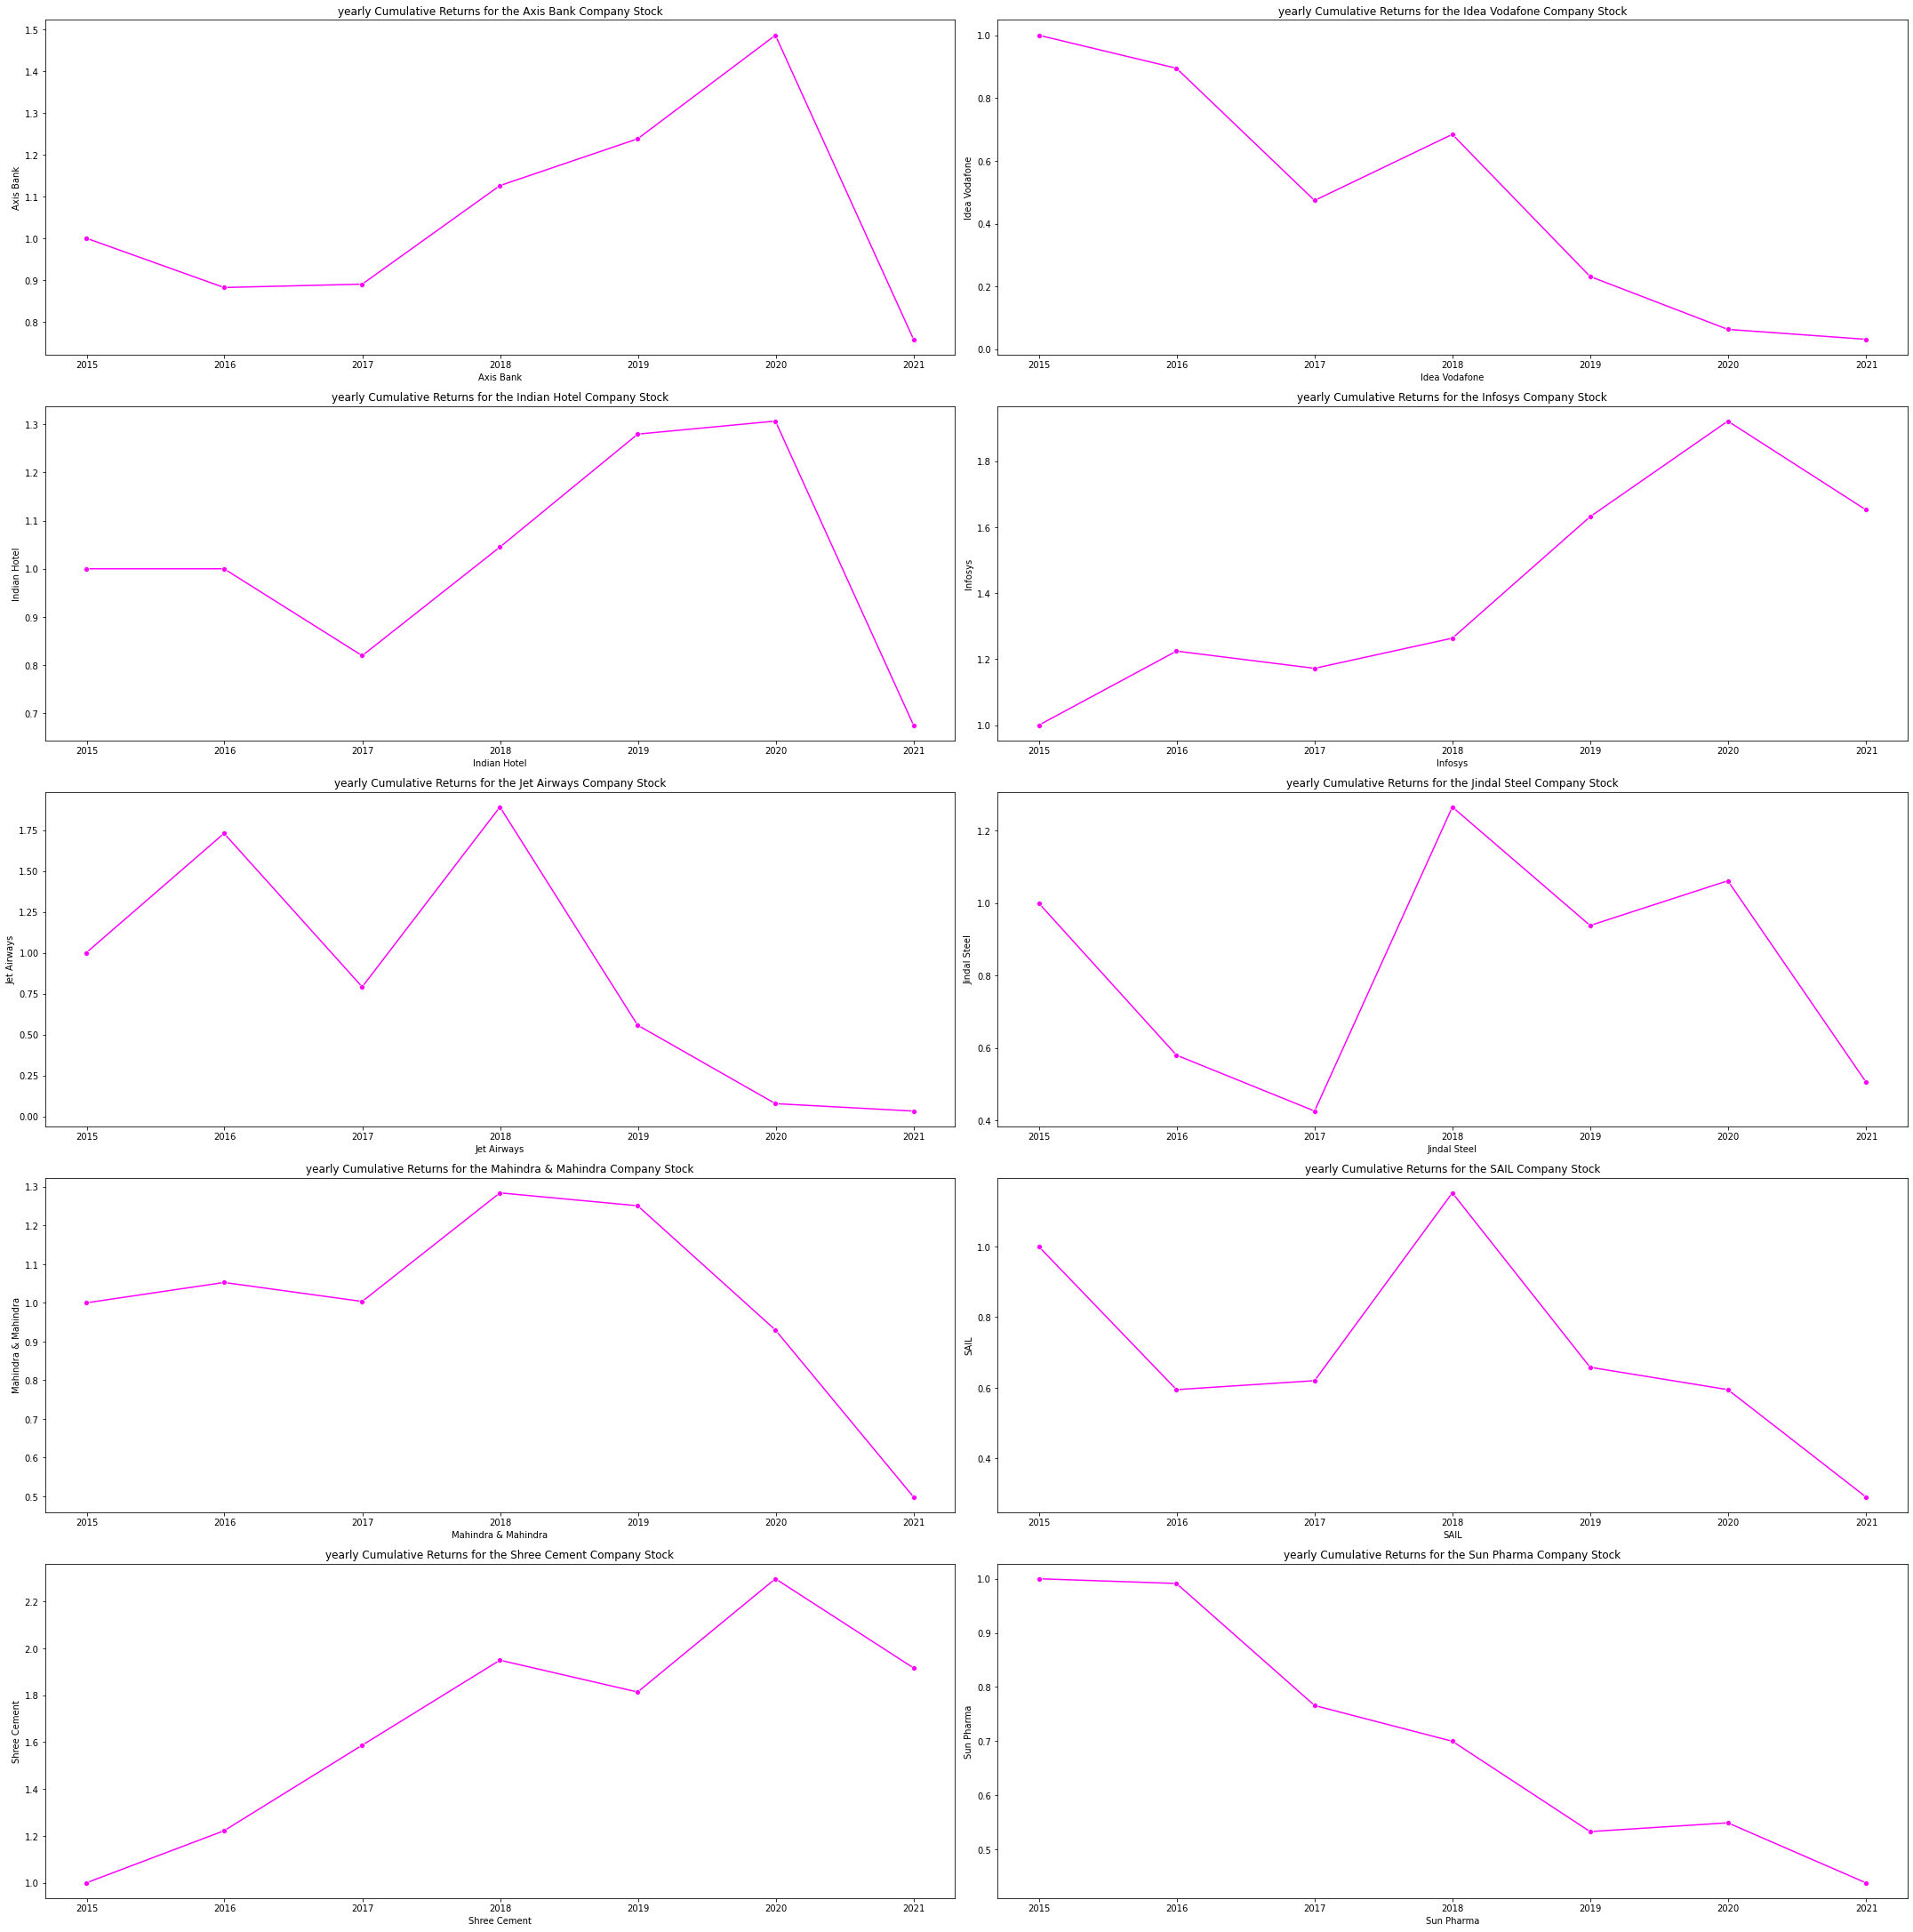

In [ ]:
# Distribution and boxplots of the variables

a = len(yearly_cum_return.columns)  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig1 = plt.figure(figsize=(30,60))

for i in yearly_cum_return.columns:
    plt.subplot(a, b, c)
    plt.title('yearly Cumulative Returns for the {} Company Stock'.format(i))
    plt.xlabel(i)
    sns.lineplot(data =yearly_cum_return[i], marker='o', color='magenta')
    c = c + 1

plt.tight_layout()
plt.show()

## 2.3 Calculate Stock Means and Standard Deviation for all stocks with inference

In [ ]:
risk_stat_df = pd.DataFrame(index=return_df.columns)
risk_stat_df ['Daily Mean']= daily_return.mean()
risk_stat_df ['Daily Std.Dev']= daily_return.std()
risk_stat_df ['Monthly Mean']= monthly_return.mean()
risk_stat_df ['Monthly Std.Dev']= monthly_return.std()
risk_stat_df ['Yearly Mean']= yearly_return.mean()
risk_stat_df ['Yearly Std.Dev']= yearly_return.std()
risk_stat_df

Daily Mean  Daily Std.Dev  Monthly Mean  Monthly Std.Dev  \
Axis Bank              0.002194       0.044946      0.009740         0.091066   
Idea Vodafone         -0.005064       0.109899     -0.031917         0.163944   
Indian Hotel           0.001364       0.046839      0.006202         0.096561   
Infosys                0.003398       0.034855      0.014167         0.066083   
Jet Airways           -0.004789       0.096319     -0.013672         0.223432   
Jindal Steel          -0.001309       0.074959     -0.003608         0.165946   
Mahindra & Mahindra   -0.000715       0.038966     -0.002429         0.086220   
SAIL                  -0.001517       0.062798     -0.005396         0.142418   
Shree Cement           0.004472       0.040129      0.018740         0.075550   
Sun Pharma            -0.000449       0.044544     -0.002588         0.085755   

                     Yearly Mean  Yearly Std.Dev  
Axis Bank              -0.004840        0.249729  
Idea Vodafone          -0.288603        0.421027  
Indian Hotel           -0.020421        0.254545  
Infosys                 0.084118        0.155338  
Jet Airways            -0.082478        0.846462  
Jindal Steel            0.090727        0.859472  
Mahindra & Mahindra    -0.065869        0.236222  
SAIL                   -0.077247        0.467704  
Shree Cement            0.111401        0.185609  
Sun Pharma             -0.104594        0.116283

## 2.4 Draw a plot of Stock Means vs Standard Deviation and state your inference

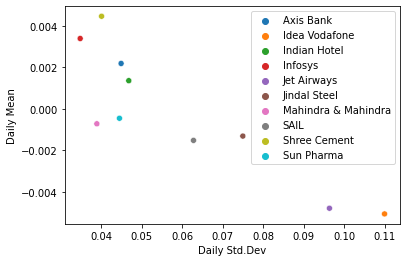

In [ ]:
sns.scatterplot(data=risk_stat_df, y='Daily Mean', x='Daily Std.Dev', hue=risk_stat_df.index);

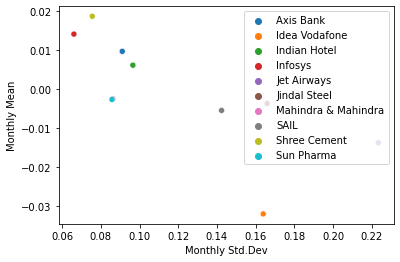

In [ ]:
sns.scatterplot(data=risk_stat_df, y='Monthly Mean', x='Monthly Std.Dev',hue=risk_stat_df.index);

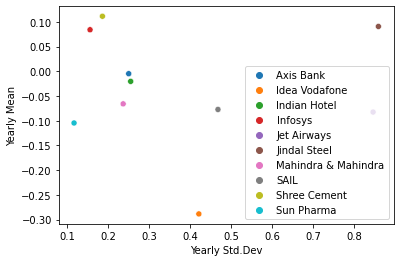

In [ ]:
sns.scatterplot(data=risk_stat_df, y='Yearly Mean', x='Yearly Std.Dev', hue=risk_stat_df.index);